In [1]:

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from src import utility as utils

In [ ]:
%pip install jupyter_black

In [3]:
%pip install pyxlsb
%load_ext pyxlsb

Note: you may need to restart the kernel to use updated packages.
The pyxlsb module is not an IPython extension.


In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
file_names = [x for x in os.listdir() if ".xlsb" in x]
data_dict = {
    "2016": "CMI TA DB 2016 Datasheet v02 2024-06-17.xlsb",
    "2017": "CMI TA DB 2017 Datasheet v02 2024-06-17.xlsb",
    "2018": "CMI TA DB 2018 Datasheet v01 2022-05-20.xlsb",
    "2019": "CMI TA DB 2019 Datasheet v01 2022-05-20.xlsb",
    "2020": "CMI TA DB 2020 Datasheet v01 2022-05-20.xlsb",
}

In [6]:
df = utils.compile_data(
    data_dict,
    r'C:\Users\dputhanveedu\Documents\Python\CMI WP162 TA DB 2016-2020 datasheets',
)

2535449


In [7]:
df.columns

Index(['ProductCategory', 'Gender', 'SmokerStatus', 'DistributionChannel',
       'CommencementYear', 'JointLifeStatus', 'SumAssuredBand', 'Age',
       'Duration', 'LivesExposure', 'AmountsExposure', 'IncurredClaims',
       'AmountIncurred', 'ExpectedClaims', 'ExpectedAmountClaims',
       'ComparatorTable', 'CalendarYear', 'unique_id', 'holdout',
       'random_fold'],
      dtype='object')

In [8]:
combined_df = df.drop(["ComparatorTable", "unique_id"], axis=1)  # "CalendarYear",

In [9]:
combined_df["LivesExposure"] = combined_df["LivesExposure"].replace(0, 0.5)

In [10]:
combined_df["Actual_deaths"] = (
    combined_df["AmountIncurred"] / combined_df["AmountsExposure"]
)
combined_df["Actual_deaths_lives"] = (
    combined_df["IncurredClaims"] / combined_df["LivesExposure"]
)
combined_df["Expected_deaths"] = (
    combined_df["ExpectedAmountClaims"] / combined_df["AmountsExposure"]
)
combined_df["Expected_deaths_lives"] = (
    combined_df["ExpectedClaims"] / combined_df["LivesExposure"]
)

In [11]:
combined_df = combined_df[
    combined_df["LivesExposure"] != 0
]  # may be has claims can set 1/365
# combined_df.drop("ComparatorTable", axis=1, inplace=True)

In [12]:
combined_df["CommencementYear"].unique()

array(['2001', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '1999 or earlier', '2000', '2002', '2017', '2018', '2019', '2020'],
      dtype=object)

In [13]:
def CommencementYear_change(CommencementYear):
    if CommencementYear == "1999 or earlier":
        new_cy = 1
    else:
        new_cy = max(int(CommencementYear) - 1999 + 1, 0)
    return new_cy

In [14]:
def CalYear_change(CalendarYear):
    if CalendarYear == "1999 or earlier":
        new_cy = 1
    else:
        new_cy = max(int(CalendarYear) - 2016 + 1, 0)
    return new_cy

In [15]:
combined_df["CommencementYear"] = combined_df["CommencementYear"].apply(
    CommencementYear_change
)

In [16]:
combined_df["CalendarYear"] = combined_df["CalendarYear"].apply(CalYear_change)

In [17]:
def Duration_change(Duration):
    if Duration == "10+":
        dur = 10
    else:
        dur = max(int(Duration), 0)
    return dur

In [18]:
combined_df["Duration"] = combined_df["Duration"].apply(Duration_change)

In [19]:
grouped_df = combined_df.groupby(
    [
        "ProductCategory",
        "Gender",
        "SmokerStatus",
        "DistributionChannel",
        "CommencementYear",
        "JointLifeStatus",
        "SumAssuredBand",
        "Age",
        "Duration",
    ]
).mean()
grouped_df = grouped_df.reset_index()

In [20]:
# combined_df=grouped_df
combined_df.drop(
    [
        "AmountsExposure",  #'IncurredClaims',
        "AmountIncurred",
       # "ExpectedClaims",
        "ExpectedAmountClaims",  # 'ComparatorTable'
    ],
    axis=1,
    inplace=True,
)

In [21]:
combined_df[combined_df["Actual_deaths_lives"]>=1]

ProductCategory Gender SmokerStatus DistributionChannel  \
636              Other      F            N                   B   
1000             Other      F            N                   B   
8716             Other      F            N                   I   
9305             Other      F            N                   I   
10474            Other      F            N                   I   
...                ...    ...          ...                 ...   
529635           Level      M            S                   U   
531380           Level      M            S                   U   
532117           Level      M            S                   U   
532592           Level      M            S                   U   
533033           Level      M            S                   U   

        CommencementYear JointLifeStatus   SumAssuredBand  Age  Duration  \
636                   10               S        £0-£25000   54         8   
1000                  11               S        £0-£25000   58         7   
8716                  11               S  £125001-£250000   68         7   
9305                  12               J    £25001-£75000   62         6   
10474                 13               S  £125001-£250000   62         5   
...                  ...             ...              ...  ...       ...   
529635                11               J    £25001-£75000   66        10   
531380                14               J    £25001-£75000   68         7   
532117                15               J    £25001-£75000   67         6   
532592                15               S   £75001-£125000   63         7   
533033                16               S        £0-£25000   76         5   

        LivesExposure  IncurredClaims  ExpectedClaims  CalendarYear  holdout  \
636          0.549180          1.0000        0.000718             1        1   
1000         0.710383          1.0000        0.001306             1        0   
8716         0.341530          1.0000        0.001609             1        1   
9305         0.762295          1.0000        0.001995             1        0   
10474        0.852459          1.0000        0.002231             1        0   
...               ...             ...             ...           ...      ...   
529635       0.423497          1.0000        0.006411             5        0   
531380       0.751366          1.0526        0.014492             5        1   
532117       0.267760          1.0000        0.004575             5        0   
532592       0.863934          1.0000        0.009105             5        0   
533033       0.374317          1.0526        0.019092             5        1   

        random_fold  Actual_deaths  Actual_deaths_lives  Expected_deaths  \
636               6       2.618075             1.820896         0.001308   
1000              1       1.903765             1.407692         0.001839   
8716              6       2.988767             2.928000         0.004712   
9305              2       0.941368             1.311828         0.002617   
10474             5       1.685964             1.173077         0.002617   
...             ...            ...                  ...              ...   
529635            2       2.361290             2.361290         0.015138   
531380            6       1.400915             1.400915         0.019287   
532117            4       3.734694             3.734694         0.017086   
532592            2       1.165474             1.157495         0.010539   
533033            6       2.812055             2.812055         0.051004   

        Expected_deaths_lives  
636                  0.001308  
1000                 0.001839  
8716                 0.004712  
9305                 0.002617  
10474                0.002617  
...                       ...  
529635               0.015138  
531380               0.019287  
532117               0.017086  
532592               0.010539  
533033               0.051004  

[2102 rows x 19 columns]

In [22]:
combined_df = combined_df[combined_df["Actual_deaths_lives"] <= 1]

In [23]:
data = (
    combined_df.copy()
    .drop(
        [
           # "Expected_deaths",
            "Actual_deaths",
            "Expected_deaths_lives",
        ],  # "LivesExposure"],
        axis=1,
    )
    .copy()
)

In [24]:
import math

combined_df[combined_df["Actual_deaths"] == math.inf]

Empty DataFrame
Columns: [ProductCategory, Gender, SmokerStatus, DistributionChannel, CommencementYear, JointLifeStatus, SumAssuredBand, Age, Duration, LivesExposure, IncurredClaims, ExpectedClaims, CalendarYear, holdout, random_fold, Actual_deaths, Actual_deaths_lives, Expected_deaths, Expected_deaths_lives]
Index: []

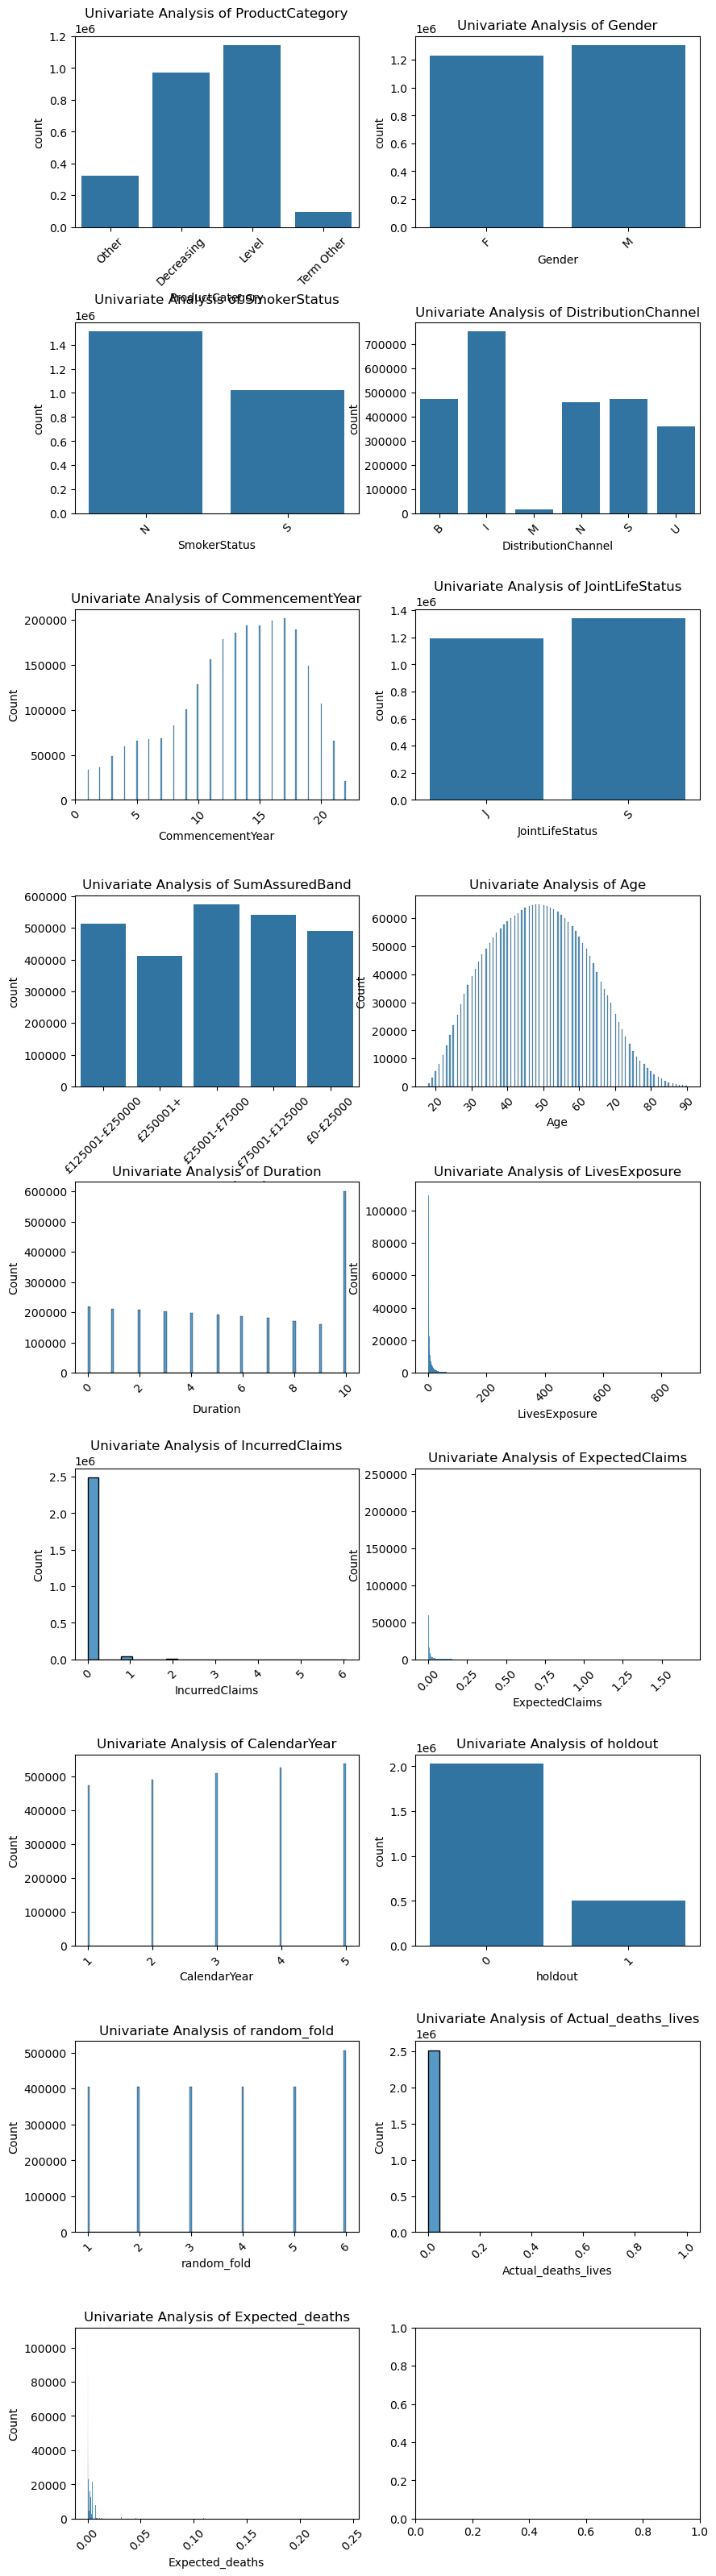

In [25]:
# Univariate plots

no_col = len(data.columns)
fig, axes = plt.subplots(nrows=(no_col // 2 + 1), ncols=2, figsize=(10, 40))
for i, column in enumerate(data.columns):
    if len(data[column].unique()) > 3 and pd.api.types.is_numeric_dtype(data[column]):
        ax = sns.histplot(data[column], ax=axes[i // 2, i % 2])
    else:
        ax = sns.countplot(x=column, data=data, ax=axes[i // 2, i % 2])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    axes[i // 2, i % 2].set_title(f"Univariate Analysis of {column}")
    plt.subplots_adjust(hspace=0.5)

plt.show()

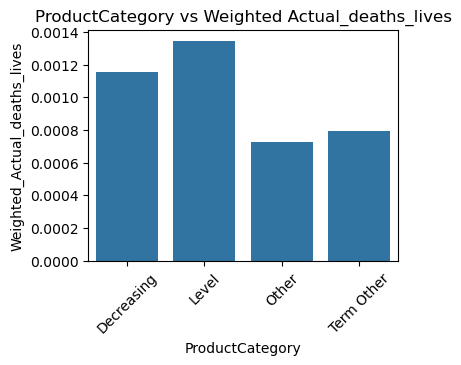

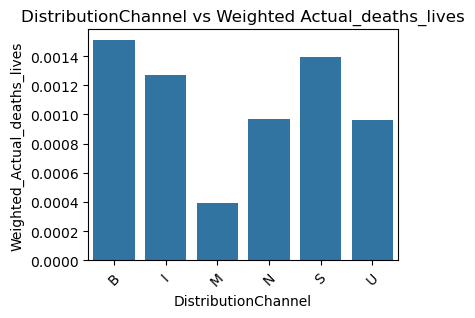

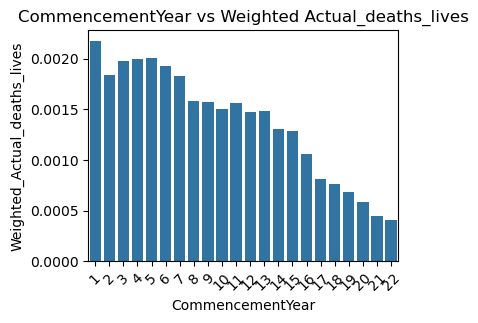

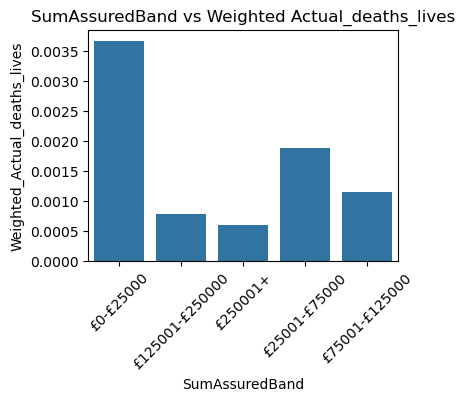

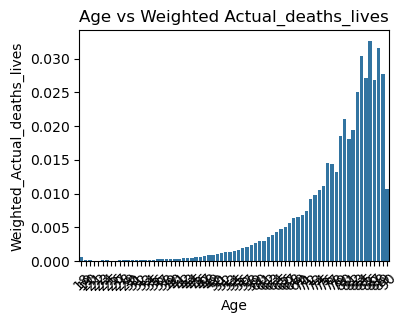

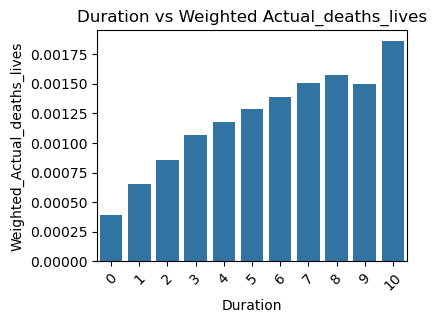

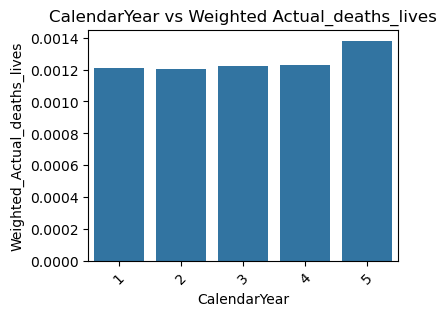

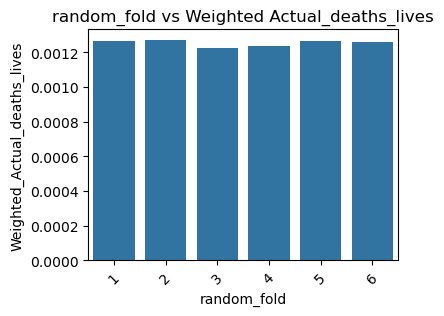

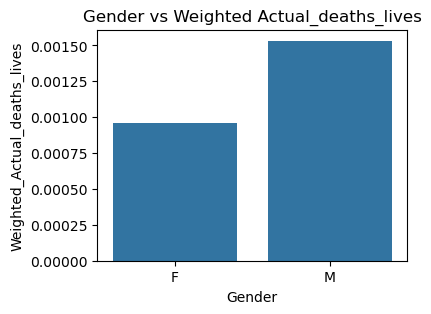

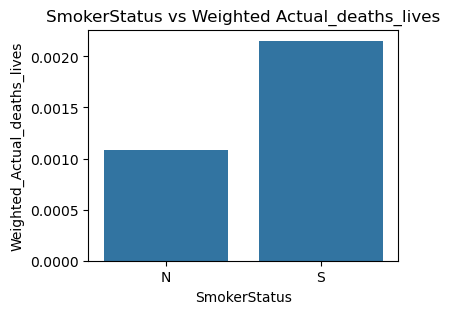

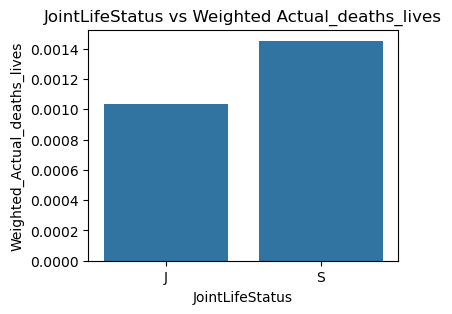

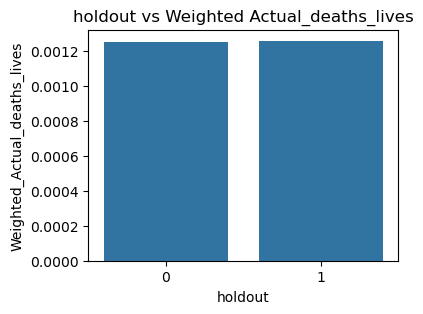

In [26]:
no_col = len(data.columns)
continuous_vars = []
categorical_vars = []
Target = "Actual_deaths_lives"
# data = data[data["Actual_deaths_lives"] <= 1]

for i, column in enumerate(data.drop([Target, "IncurredClaims","Expected_deaths","ExpectedClaims"], axis=1).columns):
    if column == "LivesExposure":
        pass
    else:

        if len(data[column].unique()) > 3:
            continuous_vars.append(column)
        else:
            categorical_vars.append(column)


# Function to calculate weighted mean
def weighted_mean(df, value, weight):
    return (df[value] * df[weight]).sum() / df[weight].sum()


# Scatter plots for continuous variables vs target
for var in continuous_vars:
    plt.figure(figsize=(4, 3))
    weighted_data = (
        data[[var, Target, "LivesExposure"]]
        .groupby(var)
        .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
        .reset_index(name=f"Weighted_{Target}")
    )
    ax = sns.barplot(x=var, y=f"Weighted_{Target}", data=weighted_data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs Weighted {Target}")
    plt.show()

# Bar plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(4, 3))
    weighted_data = (
        data[[var, Target, "LivesExposure"]]
        .groupby(var)
        .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
        .reset_index(name=f"Weighted_{Target}")
    )
    ax = sns.barplot(x=var, y=f"Weighted_{Target}", data=weighted_data)
    plt.title(f"{var} vs Weighted {Target}")
    plt.show()

plt.show()

In [27]:
import warnings

warnings.filterwarnings('ignore')

In [28]:
df_filtered = combined_df.drop(columns=["random_fold", "holdout"])

combined_df_encoded = pd.get_dummies(df_filtered, drop_first=True)

# Add the dropped columns back
combined_df_encoded["random_fold"] = combined_df["random_fold"]
combined_df_encoded["holdout"] = combined_df["holdout"]

In [29]:
combined_df_encoded = combined_df_encoded.apply(
    lambda x: x.astype(int) if x.dtypes == "bool" else x
)
combined_df_encoded.drop(
    ["Actual_deaths", #"Expected_deaths", "Expected_deaths_lives"
    ], axis=1, inplace=True
)

In [30]:
combined_df_encoded.dtypes

CommencementYear                    int64
Age                                 int64
Duration                            int64
LivesExposure                     float64
IncurredClaims                    float64
ExpectedClaims                    float64
CalendarYear                        int64
Actual_deaths_lives               float64
Expected_deaths                   float64
Expected_deaths_lives             float64
ProductCategory_Level               int32
ProductCategory_Other               int32
ProductCategory_Term Other          int32
Gender_M                            int32
SmokerStatus_S                      int32
DistributionChannel_I               int32
DistributionChannel_M               int32
DistributionChannel_N               int32
DistributionChannel_S               int32
DistributionChannel_U               int32
JointLifeStatus_S                   int32
SumAssuredBand_£125001-£250000      int32
SumAssuredBand_£250001+             int32
SumAssuredBand_£25001-£75000      

In [ ]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


df = combined_df_encoded.drop("Actual_deaths_lives", axis=1).copy()
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values

# Split data based on holdout column
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]


X_train = train_df.drop(
    ["IncurredClaims", "LivesExposure", "holdout", "random_fold"], axis=1
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    ["IncurredClaims", "LivesExposure", "holdout", "random_fold"], axis=1
)
y_test = test_df["IncurredClaims"]

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the Poisson regression model with LivesExposure as an offset
poisson_model = sm.GLM(
    y_train,
    X_train,
    family=sm.families.Poisson(),
    offset=np.log(train_df["LivesExposure"]),
).fit()

# Print the summary of the model
print(poisson_model.summary())

# Predict on the test set
y_pred = poisson_model.predict(X_test, offset=np.log(test_df["LivesExposure"]))

# Show the predicted values along with the target values
predicted_vs_actual = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predicted_vs_actual.head())

<Axes: >

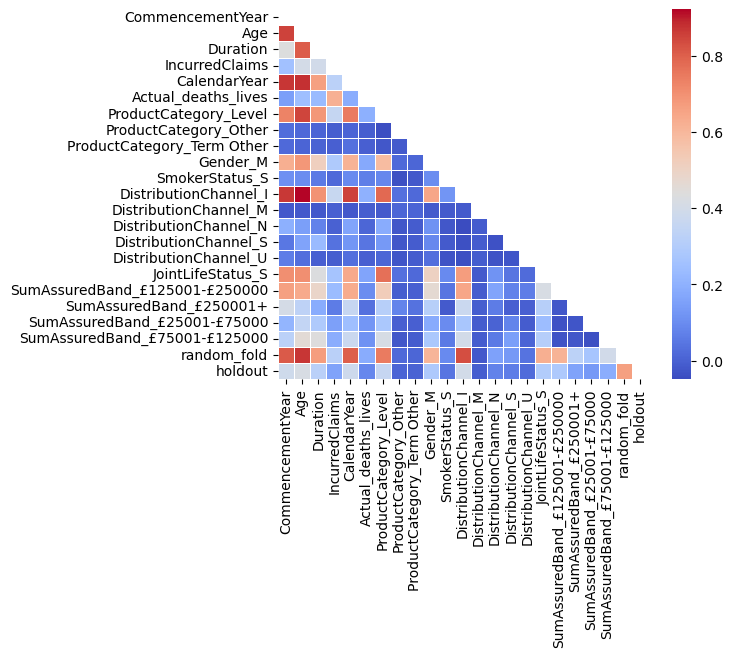

In [30]:
def weighted_corr(df, weights):
    df_weighted = df.multiply(weights, axis=0)
    corr_matrix = df_weighted.corr()
    return corr_matrix


weights = combined_df_encoded["LivesExposure"]
df_for_corr = combined_df_encoded.drop(columns=["LivesExposure"])
weighted_corr_matrix = weighted_corr(df_for_corr, weights)

mask = np.triu(np.ones_like(weighted_corr_matrix, dtype=bool))

sns.heatmap(
    weighted_corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=False,
    square=True,
    linewidths=0.5,
)

#####  There is collinearity between distribution channels , commencement year and probaly product category

In [31]:
combined_df_encoded.columns

Index(['CommencementYear', 'Age', 'Duration', 'LivesExposure',
       'IncurredClaims', 'ExpectedClaims', 'CalendarYear',
       'Actual_deaths_lives', 'Expected_deaths', 'Expected_deaths_lives',
       'ProductCategory_Level', 'ProductCategory_Other',
       'ProductCategory_Term Other', 'Gender_M', 'SmokerStatus_S',
       'DistributionChannel_I', 'DistributionChannel_M',
       'DistributionChannel_N', 'DistributionChannel_S',
       'DistributionChannel_U', 'JointLifeStatus_S',
       'SumAssuredBand_£125001-£250000', 'SumAssuredBand_£250001+',
       'SumAssuredBand_£25001-£75000', 'SumAssuredBand_£75001-£125000',
       'random_fold', 'holdout'],
      dtype='object')

### Poisson distribution modelling

Input Layer
    |
    v
+---------------------+
| Original Features   |
+---------------------+
    |
    v
+---------------------+
| Interaction Terms   |
| (age, duration*,    |
|  calendar_year*)|
+---------------------+
    |
    v
+---------------------+
| Concatenation Layer |
+---------------------+
    |
    v
+---------------------+
| Fully Connected     |
| Layer               |
+---------------------+
    |
    v
+---------------------+
| Exp transform       |
+---------------------+
    |
    v
Output Layer


In [32]:
%pip install torch 
#-i https://pypi.org/simple

Note: you may need to restart the kernel to use updated packages.


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np


# combined_df_encoded = combined_df_encoded.drop("CommencementYear", axis=1)
df = combined_df_encoded.copy()
df['Duration']=df['Duration']+1
override = 1
if override == 1:
    Best_trial_params = {'lr': 0.18673380833639397, 'weight_decay': 2.4526185176068275e-05, 'num_epochs': 1087, 'lambda_l1': 4.432372037338933e-05, 'age_cut': 62, 'age_power': 3.6003821546773658, 'age_multiplier': 1, 'duration_power': -0.4408474979805285, 'duration_multiplier': 1}
    lr = Best_trial_params["lr"]
    weight_decay = Best_trial_params["weight_decay"]
    num_epochs = Best_trial_params["num_epochs"]
    lambda_l1 = Best_trial_params["lambda_l1"]
    age_cut = Best_trial_params["age_cut"]
    age_power = Best_trial_params["age_power"]
    age_multiplier = Best_trial_params["age_multiplier"]
    duration_power = Best_trial_params["duration_power"]
    duration_multiplier = Best_trial_params["duration_multiplier"]
else:
    try:
        age_cut = study.best_params["age_cut"]  # 50
        age_power = study.best_params["age_power"]  # - 2  # 4.133448889716881  #
        weight_decay = study.best_params["weight_decay"]  # 1.0441166112064366e-05
        num_epochs = study.best_params["num_epochs"]  # 680
        lambda_l1 = study.best_params["lambda_l1"]
        lr = study.best_params["lr"]
        age_multiplier = study.best_params["age_multiplier"]
        print(f"read best params{study.best_params}")
    except:
        age_cut = 35  # study.best_params["age_cut"]  # 50
        age_power = 1.3  # study.best_params["age_power"]  # 4.133448889716881  #
        weight_decay = (
            0.0002  # study.best_params["weight_decay"]  # 1.0441166112064366e-05
        )
        num_epochs = 650  # study.best_params["num_epochs"]  # 680
        lambda_l1 = 0.00005  # study.best_params["lambda_l1"]
        lr = 0.1  # study.best_params["lr"]
        print("read other params")


df["Age2"] = (
    age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
)  # np.exp(df['Age'])
df["Dur2"] = (
    duration_multiplier * np.maximum(df["Duration"] , 0) ** duration_power
)
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]
train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]
X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",    
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]
age_test_tensor = torch.tensor(X_test["Age"].values, dtype=torch.float32)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)


# NN with custom interaction layer and offset
class Mort_Net(nn.Module):
    def __init__(self):
        super(Mort_Net, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CalendarYear")
        ]
        # Define the fully connected layer
        interaction_input_size = len(self.duration_indices) + len(
            self.commencement_year_indices
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

    def forward(self, x, exposure):
        # Create interaction terms
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []  # torch.tensor(data=[], dtype=torch.float32)
        for idx in (
            self.duration_indices + self.commencement_year_indices  # + [self.age_idx]
        ):
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
            # print(interaction_term)

            # interaction_terms= torch.tensor(data=[], dtype=torch.float32)
            interaction_terms1 = torch.cat(interaction_terms, dim=1)
        # Concatenate the original features with interaction terms

        x_combined = torch.cat((x, interaction_terms1), dim=1)
        # print(f"x shape: {x.shape}")
        # print(f"interaction_terms1 shape: {interaction_terms1.shape}")
        # print(f"x_combined shape: {x_combined.shape}")

        # Final fully connected layer
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the poisson
        output = torch.exp(offset_output)

        return output


model = Mort_Net()
criterion = nn.PoissonNLLLoss(log_input=False)  # nn.MSELoss()#
optimizer = optim.Adam(
    model.parameters(), lr=lr, weight_decay=weight_decay
)  # Lower learning rate; weight decay acts to mimimise large weights like L2 regularisation


def l1_loss(model, lambda_l1):
    l1 = 0
    for param in model.parameters():
        l1 += torch.sum(torch.abs(param))
    return lambda_l1 * l1


for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor, lives_exposure_train_tensor)
    loss = criterion(outputs, y_train_tensor)  # + l1_loss(model, lambda_l1=0.00008)
    if torch.isnan(loss):
        print(f"Epoch {epoch+1}, Loss: NaN detected")
        break
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor, lives_exposure_test_tensor)
    loss = criterion(outputs, y_test_tensor)
    print(f"Test Loss: {loss.item()}")

Epoch 20, Loss: 0.6644440293312073
Epoch 40, Loss: 0.24418316781520844
Epoch 60, Loss: 0.17492474615573883
Epoch 80, Loss: 0.1464843600988388
Epoch 100, Loss: 0.1291138082742691
Epoch 120, Loss: 0.11672964692115784
Epoch 140, Loss: 0.10741031169891357
Epoch 160, Loss: 0.10022296756505966
Epoch 180, Loss: 0.09457837045192719
Epoch 200, Loss: 0.09007395803928375
Epoch 220, Loss: 0.08642718940973282
Epoch 240, Loss: 0.08343635499477386
Epoch 260, Loss: 0.08095502853393555
Epoch 280, Loss: 0.0788751170039177
Epoch 300, Loss: 0.07711577415466309
Epoch 320, Loss: 0.0756155326962471
Epoch 340, Loss: 0.0743269994854927
Epoch 360, Loss: 0.07321318984031677
Epoch 380, Loss: 0.07224491983652115
Epoch 400, Loss: 0.07139883935451508
Epoch 420, Loss: 0.07065615803003311
Epoch 440, Loss: 0.07000154256820679
Epoch 460, Loss: 0.06942245364189148
Epoch 480, Loss: 0.06890841573476791
Epoch 500, Loss: 0.06845090538263321
Epoch 520, Loss: 0.06804249435663223
Epoch 540, Loss: 0.06767698377370834
Epoch 560, 

<Axes: >

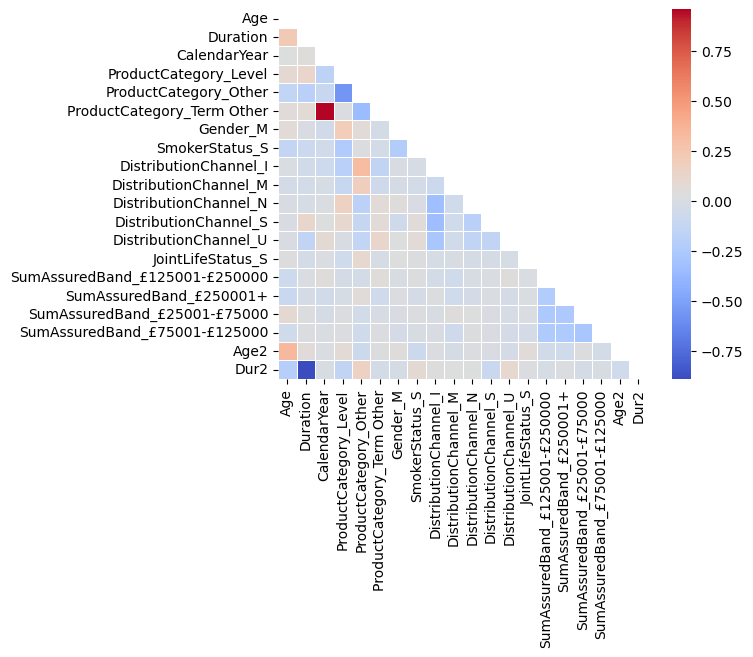

In [34]:
def weighted_corr(df, weights):
    df_weighted = df.multiply(weights, axis=0)
    corr_matrix = df_weighted.corr()
    return corr_matrix


weights = train_lives_exposure
df_for_corr = X_train_scaled
weighted_corr_matrix = weighted_corr(df_for_corr, weights)

mask = np.triu(np.ones_like(weighted_corr_matrix, dtype=bool))

sns.heatmap(
    weighted_corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=False,
    square=True,
    linewidths=0.5,
)

[I 2025-03-08 08:46:58,552] A new study created in memory with name: no-name-9c6c8767-75a5-4bb2-991f-de563f1ef856
[I 2025-03-08 08:54:22,165] Trial 0 finished with value: 0.2754794478416443 and parameters: {}. Best is trial 0 with value: 0.2754794478416443.


Mean Pseudo_R2: 0.2755


[I 2025-03-08 08:54:22,365] A new study created in memory with name: no-name-60031a6c-9280-4e2e-bbb9-a615656d4a2b


Mean Pseudo_R2: 0.2050


[I 2025-03-08 09:03:06,381] Trial 0 finished with value: 0.20499993562698365 and parameters: {}. Best is trial 0 with value: 0.20499993562698365.
[I 2025-03-08 09:03:06,897] A new study created in memory with name: no-name-e7297098-a666-4991-82e9-c9e1845402eb
[I 2025-03-08 09:12:05,329] Trial 0 finished with value: 0.26404417753219606 and parameters: {}. Best is trial 0 with value: 0.26404417753219606.


Mean Pseudo_R2: 0.2640


[I 2025-03-08 09:12:05,528] A new study created in memory with name: no-name-c68b0116-b950-486a-b93d-f7f273da740f
[I 2025-03-08 09:20:24,474] Trial 0 finished with value: 0.2747410774230957 and parameters: {}. Best is trial 0 with value: 0.2747410774230957.


Mean Pseudo_R2: 0.2747


[I 2025-03-08 09:20:24,706] A new study created in memory with name: no-name-e87c7c9c-62bd-40d8-83f6-c242d5229bb0
[I 2025-03-08 09:28:09,190] Trial 0 finished with value: 0.27371137142181395 and parameters: {}. Best is trial 0 with value: 0.27371137142181395.


Mean Pseudo_R2: 0.2737


[I 2025-03-08 09:28:09,380] A new study created in memory with name: no-name-a49057d5-09e6-45a6-ad8b-8fb8958dc15a
[I 2025-03-08 09:35:15,808] Trial 0 finished with value: 0.27483383417129514 and parameters: {}. Best is trial 0 with value: 0.27483383417129514.


Mean Pseudo_R2: 0.2748


[I 2025-03-08 09:35:15,990] A new study created in memory with name: no-name-5af73416-1055-40e9-9cf5-28906b0a90a0
[I 2025-03-08 09:42:09,145] Trial 0 finished with value: 0.2738796830177307 and parameters: {}. Best is trial 0 with value: 0.2738796830177307.


Mean Pseudo_R2: 0.2739


[I 2025-03-08 09:42:09,301] A new study created in memory with name: no-name-35e2e1c6-d21a-4044-85fa-b639330da702
[I 2025-03-08 09:48:54,916] Trial 0 finished with value: 0.27217952013015745 and parameters: {}. Best is trial 0 with value: 0.27217952013015745.


Mean Pseudo_R2: 0.2722


[I 2025-03-08 09:48:55,066] A new study created in memory with name: no-name-97806041-92fe-4acf-a74d-7a6f43cd8ecd
[I 2025-03-08 09:55:42,876] Trial 0 finished with value: 0.2608834743499756 and parameters: {}. Best is trial 0 with value: 0.2608834743499756.


Mean Pseudo_R2: 0.2609


[I 2025-03-08 09:55:43,033] A new study created in memory with name: no-name-69d44585-1445-4e14-a1cb-ea143f4d3291
[I 2025-03-08 10:03:26,446] Trial 0 finished with value: 0.27397719621658323 and parameters: {}. Best is trial 0 with value: 0.27397719621658323.


Mean Pseudo_R2: 0.2740


[I 2025-03-08 10:03:26,646] A new study created in memory with name: no-name-369c5672-7dfb-4b83-b358-119129b597a4
[I 2025-03-08 10:12:24,886] Trial 0 finished with value: 0.2735704779624939 and parameters: {}. Best is trial 0 with value: 0.2735704779624939.


Mean Pseudo_R2: 0.2736


[I 2025-03-08 10:12:25,331] A new study created in memory with name: no-name-b3d2ab1f-f3a4-4f83-a6a8-11a9fce174a8
[I 2025-03-08 10:21:24,792] Trial 0 finished with value: 0.2756060004234314 and parameters: {}. Best is trial 0 with value: 0.2756060004234314.


Mean Pseudo_R2: 0.2756


[I 2025-03-08 10:21:25,142] A new study created in memory with name: no-name-f75e0ca4-439a-446d-90e2-f91b80018f34
[I 2025-03-08 10:31:29,116] Trial 0 finished with value: 0.2756669640541077 and parameters: {}. Best is trial 0 with value: 0.2756669640541077.


Mean Pseudo_R2: 0.2757


[I 2025-03-08 10:31:29,447] A new study created in memory with name: no-name-1bf6d51f-bd90-4091-bfce-02d6ea850c26


Mean Pseudo_R2: 0.2731


[I 2025-03-08 11:57:00,383] Trial 0 finished with value: 0.273077130317688 and parameters: {}. Best is trial 0 with value: 0.273077130317688.
[I 2025-03-08 11:57:00,751] A new study created in memory with name: no-name-9b8edf6c-f181-487e-b470-154d246fbc85
[I 2025-03-08 12:05:33,761] Trial 0 finished with value: 0.2753997564315796 and parameters: {}. Best is trial 0 with value: 0.2753997564315796.


Mean Pseudo_R2: 0.2754


[I 2025-03-08 12:05:34,048] A new study created in memory with name: no-name-e0cc298a-d570-4059-9305-2ba4b9bc4299
[I 2025-03-08 12:13:13,999] Trial 0 finished with value: 0.2741517424583435 and parameters: {}. Best is trial 0 with value: 0.2741517424583435.


Mean Pseudo_R2: 0.2742


[I 2025-03-08 12:13:14,249] A new study created in memory with name: no-name-2efdc8ff-39f4-4dbd-b67d-adb265398ec1
[I 2025-03-08 12:26:33,029] Trial 0 finished with value: 0.2736093282699585 and parameters: {}. Best is trial 0 with value: 0.2736093282699585.


Mean Pseudo_R2: 0.2736


[I 2025-03-08 12:26:33,362] A new study created in memory with name: no-name-cf069f1a-45f9-4d5d-a897-abc2ca190382


Mean Pseudo_R2: 0.2733


[I 2025-03-08 13:04:48,656] Trial 0 finished with value: 0.27328755855560305 and parameters: {}. Best is trial 0 with value: 0.27328755855560305.
[I 2025-03-08 13:04:49,421] A new study created in memory with name: no-name-b0ed1693-4b5f-43d8-8132-eddf167aaa11


Mean Pseudo_R2: 0.2731


[I 2025-03-08 13:19:38,739] Trial 0 finished with value: 0.27306376695632933 and parameters: {}. Best is trial 0 with value: 0.27306376695632933.


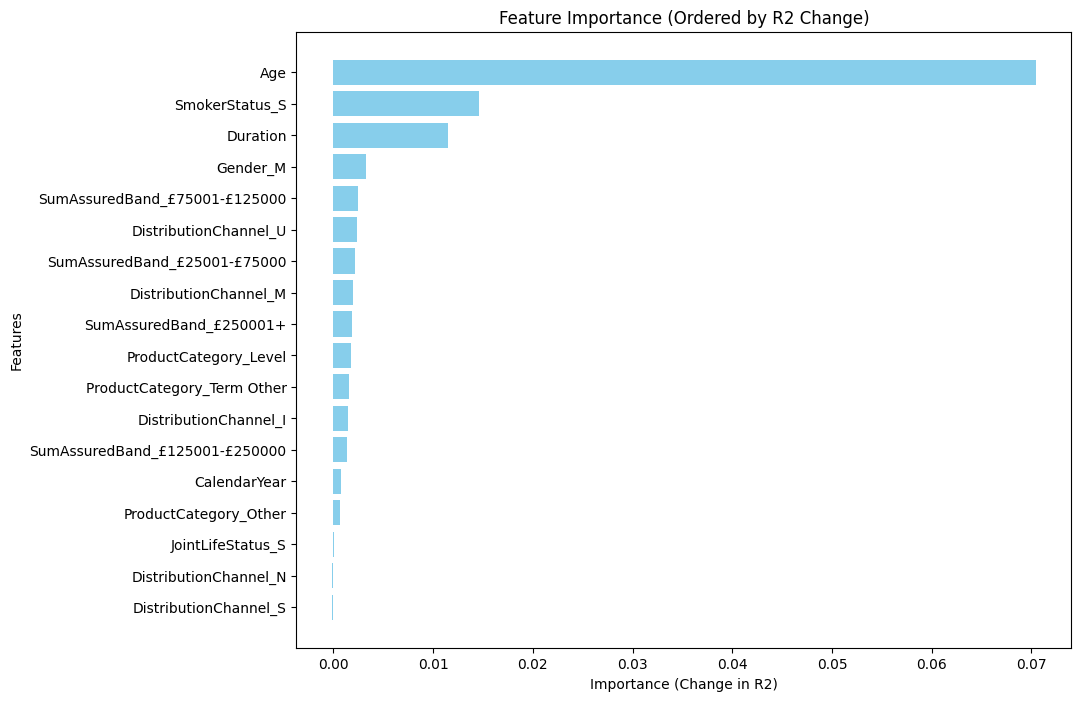

In [ ]:
import optuna


#[I 2025-03-07 21:21:59,760] Trial 21 finished with value: 0.2756629705429077 and parameters: {'lr': 0.18673380833639397, 'weight_decay': 2.4526185176068275e-05, 'num_epochs': 1087, 'lambda_l1': 4.432372037338933e-05, 'age_cut': 62, 'age_power': 3.6003821546773658, 'age_multiplier': 1, 'duration_power': -0.4408474979805285, 'duration_multiplier': 1}. Best is trial 21 with value: 0.2756629705429077.

Best_trial_params = {'lr': 0.18673380833639397, 'weight_decay': 2.4526185176068275e-05, 'num_epochs': 1087, 'lambda_l1': 4.432372037338933e-05, 'age_cut': 62, 'age_power': 3.6003821546773658, 'age_multiplier': 1, 'duration_power': -0.4408474979805285, 'duration_multiplier': 1}

def objective(trial, features, df, best_trial_params=None):
    global y_test_tensor
    global age_cut
    global age_power

    if best_trial_params is None:
        lr = trial.suggest_float("lr", 9e-2, 2e-1, log=True)
        weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-4, log=True)
        num_epochs = trial.suggest_int("num_epochs", 900, 1200)
        lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-3, log=True)
        age_cut = trial.suggest_int("age_cut", 20, 90)
        age_power = trial.suggest_float("age_power", 1.3, 5)
        age_multiplier = trial.suggest_int("age_multiplier", 0, 1)
        duration_power = trial.suggest_float("duration_power", -1, 3)
        duration_multiplier = trial.suggest_int("duration_multiplier", 0, 1)
    else:
        lr = best_trial_params["lr"]
        weight_decay = best_trial_params["weight_decay"]
        num_epochs = best_trial_params["num_epochs"]
        lambda_l1 = best_trial_params["lambda_l1"]
        age_cut = best_trial_params["age_cut"]
        age_power = best_trial_params["age_power"]
        age_multiplier = best_trial_params["age_multiplier"]
        duration_power = best_trial_params["duration_power"]
        duration_multiplier = best_trial_params["duration_multiplier"]

    pseudo_r2_scores = []
    
    # df = combined_df_encoded.copy()
    df = df[df["holdout"] == 0].copy()

    for fold in range(1, 6):  # only do 1 fold to speed up

        df.loc[:, "Age2"] = age_multiplier * (
            np.maximum(df["Age"] - age_cut, 0) ** age_power
        )
        df.loc[:, "Dur2"] = (
            duration_multiplier * np.maximum(df["Duration"]+ 1 , 0) ** duration_power
        )
        df["LivesExposure"] = df["LivesExposure"].clip(
            lower=1e-6
        )  # Ensure no zero or negative values
        train_df = df[df["random_fold"] != fold]
        test_df = df[df["random_fold"] == fold]
        # print(df.columns)
        # Extract LivesExposure
        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]
        # Define features and target
        if "Age2" not in features:
            features.append("Age2")
        if "Dur2" not in features:
            features.append("Dur2")
        # print(f"features inside:{features}")
        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]
        # print(f"coliumns in objective:{X_train.columns}")
        # Scale the data
        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        # Convert data to tensors
        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(
            y_train.values.reshape(-1, 1), dtype=torch.float32
        )
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

        # Convert LivesExposure to tensors
        lives_exposure_train_tensor = torch.tensor(
            train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )
        lives_exposure_test_tensor = torch.tensor(
            test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )

        model = Mort_Net()
        criterion = nn.PoissonNLLLoss(log_input=False)
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        # Training loop
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor, lives_exposure_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            l1_reg = l1_loss(model, lambda_l1=lambda_l1)
            total_loss = loss + l1_reg
            total_loss.backward()
            optimizer.step()

        # Evaluation
        model.eval()
        with torch.no_grad():
            outputs = model(X_test_tensor, lives_exposure_test_tensor) + 1e-8
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(
                y_test_tensor * lives_exposure_test_tensor
            ) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
                    - (y_test_tensor - weighted_mean_target)
                )
            )

            # Weighted model deviance
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / outputs)
                    - (y_test_tensor - outputs)
                )
            )
            pseudo_r2 = 1- model_deviance/null_deviance
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2


def evaluate_feature_importance(df, features):
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, features, df,Best_trial_params),n_trials=1) #   Used n_trials=55 for original fine-tuning
    best_trial = study.best_trial
    saturated_r2 = best_trial.value

    feature_importances = {}

    # Define one-hot encoded groups
    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2" or feature == "Dur2":
            continue

        df_copy = df.copy()

        # Check if the feature is part of a one-hot encoded group
        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = 1  # Set the current feature to 1
                    else:
                        df_copy[gf] = 0  # Set the other features in the group to 0
                break

        if not group_found:
            if feature not in (
                "Age",
                "Duration",
                "CalendarYear",
            ):  # Check if the feature is categorical
                df_copy[feature] = df_copy[feature].mode()[0]  # Replace with mode
            else:
                df_copy[feature] = df_copy[
                    feature
                ].mean()  # Replace with mean for numerical features

        study = optuna.create_study(direction="maximize")
        study.optimize(lambda trial: objective(trial, features, df_copy,Best_trial_params), n_trials=1)

        best_trial = study.best_trial
        current_r2 = best_trial.value

        feature_importances[feature] = saturated_r2 - current_r2

    return feature_importances


# Initial set of features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
data = combined_df_encoded  # .drop("CommencementYear", axis=1)
# Evaluate feature importance
features = [feature for feature in features if feature is not None]
feature_importances = evaluate_feature_importance(combined_df_encoded, features)

# Plotting the feature importances
sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

#might be better to aggregate

In [33]:
y_test_tensor = y_test_tensor + 1e-25
mean_target = torch.mean(y_test_tensor)
null_deviance = 2 * torch.sum(
    y_test_tensor * torch.log(y_test_tensor / mean_target)
    - (y_test_tensor - mean_target)
)
model_deviance = 2 * torch.sum(
    y_test_tensor * torch.log(y_test_tensor / outputs) - (y_test_tensor - outputs)
)
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)
y_pred = outputs.numpy().flatten()

poisson deviance: 26015.671875  psuedo R2 =0.3445655107498169


In [34]:
test_df["Predicted_Claims"] = y_pred
filtered_combined_df = test_df  # combined_df.loc[combined_df.index.isin(test_df.index)]
# filtered_combined_df = filtered_combined_df.assign(
#    Predicted_Claims=test_df["Predicted_Claims"].values
# )
filtered_combined_df["Predicted_Claims_rate"] = (
    filtered_combined_df["Predicted_Claims"] / filtered_combined_df["LivesExposure"]
)

In [35]:
filtered_combined_df["Predicted_Claims_rate"] = (
    filtered_combined_df["Predicted_Claims"] / filtered_combined_df["LivesExposure"]
)

##### plot of high level trends for predicted  followed by partial dependence plots( to be developed)

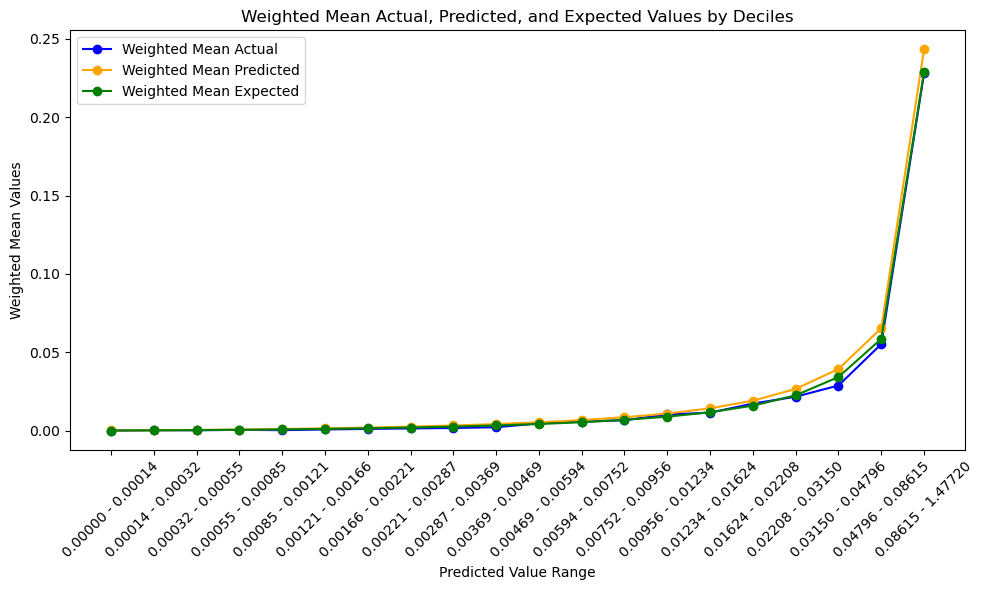

In [39]:
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 10)
weights2 = lives_exposure_test_tensor.numpy().flatten()

# Add ExpectedClaims from test_df
expected_claims = test_df["ExpectedClaims"].values.flatten()

df_lift = pd.DataFrame({
    "actual": actual,
    "predicted": predicted,
    "expected": expected_claims,
    "weights": weights2
})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = test_df["Age"]
# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)

def weighted_mean(group):
    return pd.Series({
        "weighted_actual": np.average(group["actual"], weights=group["weights"]),
        "weighted_predicted": np.average(group["predicted"], weights=group["weights"]),
        "weighted_expected": np.average(group["expected"], weights=group["weights"]),
        "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
    })

decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual, predicted, and expected values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.plot(
    decile_summary["weighted_expected"],
    label="Weighted Mean Expected",
    color="green",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual, Predicted, and Expected Values by Deciles")
plt.xticks(ticks=range(20), labels=decile_summary["range"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

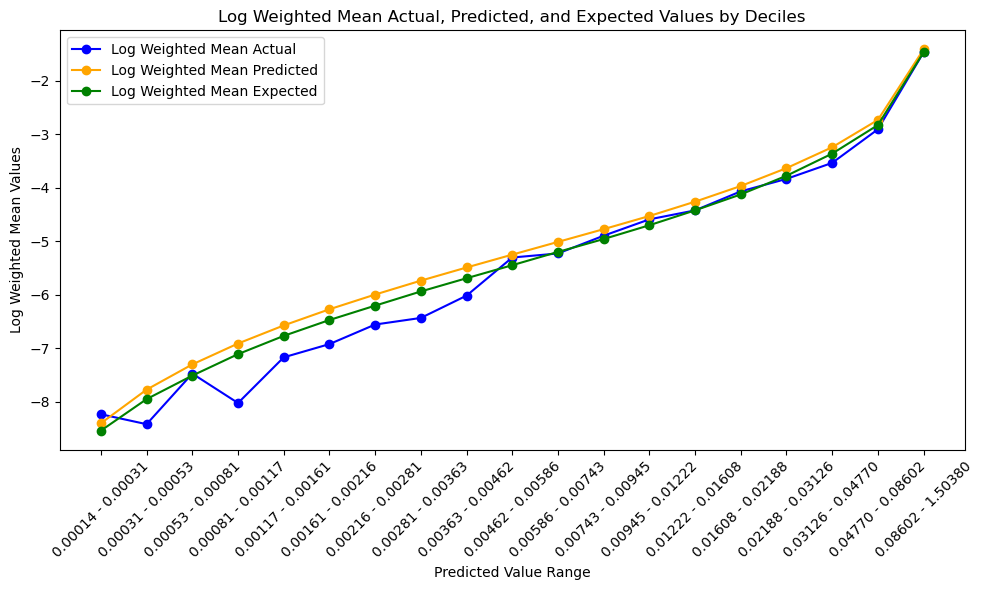

In [36]:
#y_test_tensor = torch.maximum(y_test_tensor, torch.tensor(1e-10))
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 10)
weights2 = lives_exposure_test_tensor.numpy().flatten()

# Add ExpectedClaims from test_df
expected_claims = test_df["ExpectedClaims"].values.flatten()

# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({
    "actual": actual,
    "predicted": predicted,
    "expected": expected_claims,
    "weights": weights2
})
df_lift = df_lift.sort_values(by="predicted", ascending=False)

# Create deciles (20 groups)
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)

def weighted_mean(group):
    return pd.Series({
        "weighted_actual": np.average(group["actual"], weights=group["weights"]),
        "weighted_predicted": np.average(group["predicted"], weights=group["weights"]),
        "weighted_expected": np.average(group["expected"], weights=group["weights"]),
        "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
    })

# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)
decile_summary = decile_summary.iloc[1:].reset_index(drop=True)
# Take log of actual, predicted, and expected values
decile_summary["log_weighted_actual"] = np.log(decile_summary["weighted_actual"])
decile_summary["log_weighted_predicted"] = np.log(decile_summary["weighted_predicted"])
decile_summary["log_weighted_expected"] = np.log(decile_summary["weighted_expected"])

# Plot the weighted mean actual, predicted, and expected values for each decile
plt.figure(figsize=(10, 6))
plt.plot(decile_summary["log_weighted_actual"], label="Log Weighted Mean Actual", color="blue", marker="o")
plt.plot(decile_summary["log_weighted_predicted"], label="Log Weighted Mean Predicted", color="orange", marker="o")
plt.plot(decile_summary["log_weighted_expected"], label="Log Weighted Mean Expected", color="green", marker="o")
plt.xlabel("Predicted Value Range")
plt.ylabel("Log Weighted Mean Values")
plt.title("Log Weighted Mean Actual, Predicted, and Expected Values by Deciles")
plt.xticks(ticks=range(19), labels=decile_summary["range"], rotation=45)
plt.legend()
plt.tight_layout()

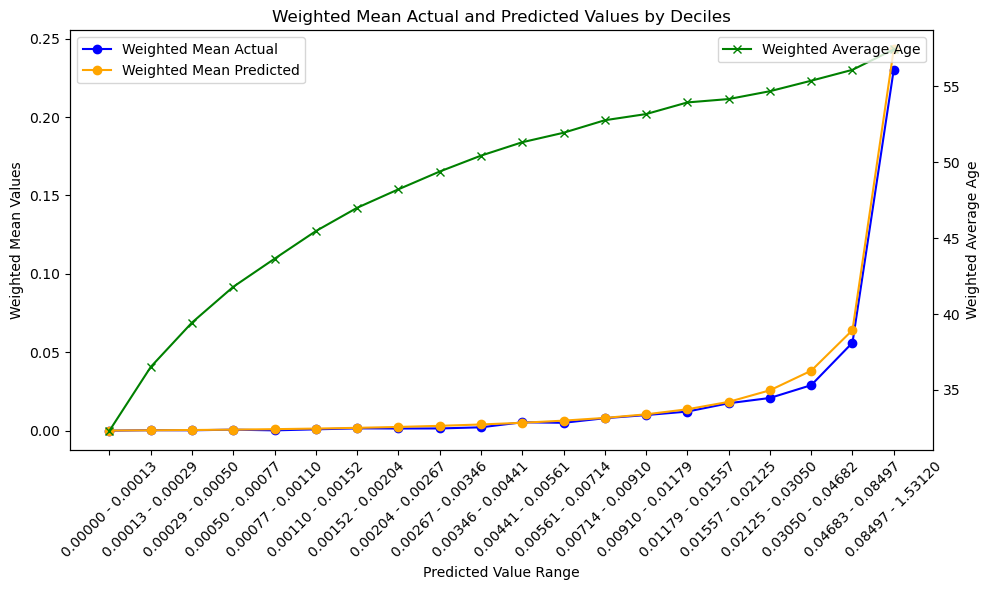

In [43]:
ages_original = age_test_tensor.numpy().flatten()
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 10)
weights2 = lives_exposure_test_tensor.numpy().flatten()

df_lift = pd.DataFrame(
    {
        "actual": actual,
        "predicted": predicted,
        "weights": weights2,
        "Age": ages_original,
    }
)
df_lift = df_lift.sort_values(by="predicted", ascending=False)


df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "weighted_age": np.average(group["Age"]),  # , weights=group["weights"]),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
ax1.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
ax1.set_xlabel("Predicted Value Range")
ax1.set_ylabel("Weighted Mean Values")
ax1.set_title("Weighted Mean Actual and Predicted Values by Deciles")
ax1.set_xticks(ticks=range(20))
ax1.set_xticklabels(decile_summary["range"], rotation=45)
ax1.legend(loc="upper left")

# Create a secondary y-axis to plot the weighted average age as well to analyse how strongly the age is driving mortality
ax2 = ax1.twinx()
ax2.plot(
    decile_summary["weighted_age"],
    label="Weighted Average Age",
    color="green",
    marker="x",
)
ax2.set_ylabel("Weighted Average Age")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [44]:
weights_coeff = model.state_dict()
for layer_name, weights_coeff in weights_coeff.items():
    print(f"{layer_name}: {weights_coeff}")

fc2.weight: tensor([[ 1.1039e+00, -1.0120e-04, -5.5122e-05, -3.9592e-03,  3.6795e-02,
          5.0293e-03,  1.3730e-01,  3.7861e-01, -4.3187e-02,  4.4589e-02,
         -2.6482e-02, -1.2402e-04,  1.9901e-02,  3.2488e-02, -1.5195e-01,
         -1.6569e-01, -7.4723e-02, -1.1970e-01,  1.7946e-02, -2.2301e-01,
          7.7000e-03,  1.2166e-02]])
fc2.bias: tensor([-6.6508])


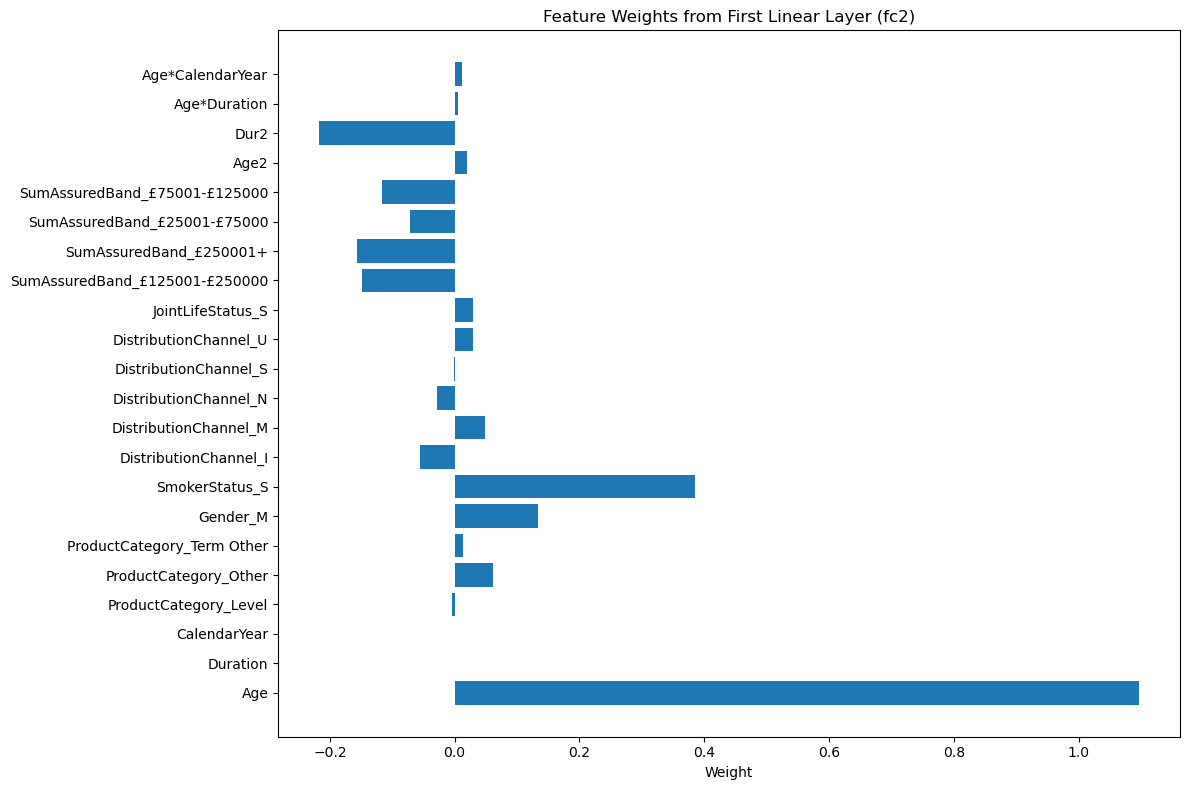

In [37]:
feature_names = list(X_train_scaled.columns)
# Add interaction term names: Age*Duration and Age*CalendarYear
interaction_names = []
for idx in model.duration_indices:
    interaction_names.append(f"Age*{X_train_scaled.columns[idx]}")
for idx in model.commencement_year_indices:
    interaction_names.append(f"Age*{X_train_scaled.columns[idx]}")

feature_names += interaction_names

weights_dict = model.state_dict()
fc2_weights = weights_dict["fc2.weight"].detach().cpu().numpy().flatten()

plt.figure(figsize=(12, 8))
plt.barh(feature_names, fc2_weights)
plt.xlabel("Weight")
plt.title("Feature Weights from First Linear Layer (fc2)")
plt.tight_layout()
plt.show()

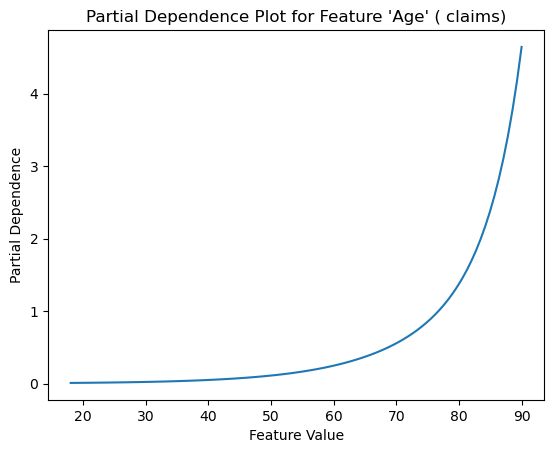

In [59]:
feature_index = X_train.columns.get_loc("Age")
feature_index2 = X_train.columns.get_loc("Age2")
grid_values = np.linspace(
    X_train.iloc[:, feature_index].min(), X_train.iloc[:, feature_index].max(), 100
)

partial_dependence = []
for val in grid_values:
    X_temp = X_train.copy()
    X_temp.iloc[:, feature_index] = val
    X_temp.iloc[:, feature_index2] = (
        age_multiplier * np.maximum(val - age_cut, 0) ** age_power
    )
    X_temp_scaled = scaler.transform(X_temp)

    model.eval()
    with torch.no_grad():
        preds = model(
            torch.tensor(X_temp_scaled, dtype=torch.float32),
            lives_exposure_train_tensor,
        )
        # pred_rate = preds / lives_exposure_train_tensor
        weighted_avg = torch.sum(preds * lives_exposure_train_tensor) / torch.sum(
            lives_exposure_train_tensor
        )
        partial_dependence.append(weighted_avg.item())

# Plot the partial dependence
plt.plot(grid_values, partial_dependence)
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot for Feature 'Age' ( claims)")
plt.show()

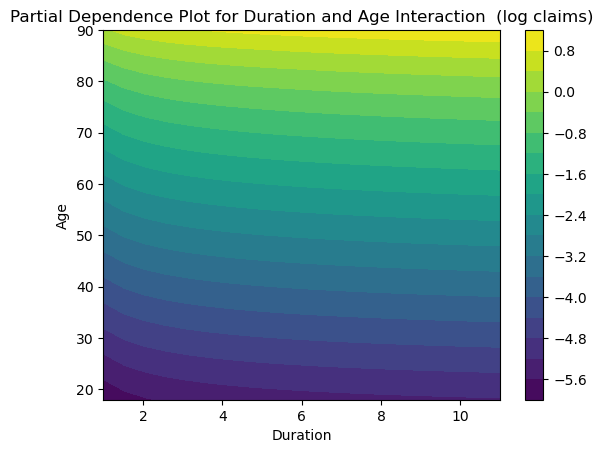

In [46]:
feature_index_duration = X_train.columns.get_loc("Duration")
feature_index_age = X_train.columns.get_loc("Age")
feature_index_age2 = X_train.columns.get_loc("Age2")
feature_index_dur2 = X_train.columns.get_loc("Dur2")
# Create a grid of values for Duration and Age
grid_values_duration = np.linspace(
    X_train.iloc[:, feature_index_duration].min(),
    X_train.iloc[:, feature_index_duration].max(),
    20,
)
grid_values_age = np.linspace(
    X_train.iloc[:, feature_index_age].min(),
    X_train.iloc[:, feature_index_age].max(),
    20,
)

# Initialize an array to store partial dependence values
partial_dependence = np.zeros((len(grid_values_duration), len(grid_values_age)))

# Compute partial dependence values
for i, val_duration in enumerate(grid_values_duration):
    for j, val_age in enumerate(grid_values_age):
        X_temp = X_train.copy()
        X_temp.iloc[:, feature_index_duration] = val_duration
        X_temp.iloc[:, feature_index_age] = val_age
        X_temp.iloc[:, feature_index_age2] = age_multiplier * (
            np.maximum(val_age - age_cut, 0) ** age_power
        )
        X_temp.iloc[:, feature_index_dur2] = duration_multiplier * (
            np.maximum(val_duration, 0) ** duration_power
        )
        X_temp_scaled = scaler.transform(X_temp)

        model.eval()
        with torch.no_grad():
            y_pred = model(
                torch.tensor(X_temp_scaled, dtype=torch.float32),
                lives_exposure_train_tensor,
            )
            y_pred_log = np.log(y_pred)
            weights = lives_exposure_train_tensor.numpy().flatten()
            weighted_avg = np.sum(y_pred_log.numpy().flatten() * weights) / np.sum(
                weights
            )
            partial_dependence[i, j] = weighted_avg

# Plot the partial dependence
X, Y = np.meshgrid(grid_values_duration, grid_values_age)
plt.contourf(X, Y, partial_dependence.T, levels=20, cmap="viridis")
plt.colorbar()
plt.xlabel("Duration")
plt.ylabel("Age")
plt.title("Partial Dependence Plot for Duration and Age Interaction  (log claims)")
plt.show()

Other high level trends

In [ ]:
data = filtered_combined_df.drop(
    [
        # "LivesExposure",
        "IncurredClaims",
        "Actual_deaths_lives",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
).copy()


no_col = len(data.columns)
continuous_vars = []
categorical_vars = []
Target = "Predicted_Claims_rate"
for i, column in enumerate(data.drop([Target, "LivesExposure"], axis=1).columns):
    if len(data[column].unique()) > 6:
        continuous_vars.append(column)
    else:
        categorical_vars.append(column)


def weighted_mean(df, value, weight):
    return (df[value] * df[weight]).sum() / df[weight].sum()


for var in continuous_vars:
    plt.figure(figsize=(5, 4))
    weighted_data = (
        data[[var, Target, "LivesExposure"]]
        .groupby(var)
        .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
        .reset_index(name=f"Weighted_{Target}")
    )
    ax = sns.barplot(x=var, y=f"Weighted_{Target}", data=weighted_data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs Weighted {Target}")
    plt.show()

# Bar plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(5, 4))
    weighted_data = (
        data[[var, Target, "LivesExposure"]]
        .groupby(var)
        .apply(lambda x: weighted_mean(x, Target, "LivesExposure"))
        .reset_index(name=f"Weighted_{Target}")
    )
    ax = sns.barplot(x=var, y=f"Weighted_{Target}", data=weighted_data)
    plt.title(f"{var} vs Weighted {Target}")
    plt.show()

#### Model 2 : Zero inflation Poisson

In [65]:
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedPoisson

df = combined_df_encoded.copy()
df["Age2"] = (
    age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
)  # np.exp(df['Age'])
df["Dur2"] = (
    duration_multiplier * np.maximum(df["Duration"] + 1 , 0) ** duration_power
)
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]
train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]
X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

X_test_const = sm.add_constant(X_test) 

# Fit Poisson model
# Fit Poisson model
poisson_model = sm.GLM(y_test, X_test_const, family=sm.families.Poisson()).fit()

# Fit Zero-Inflated Poisson model
zip_model = ZeroInflatedPoisson(y_test, X_test_const).fit(method='bfgs', maxiter=100, disp=0)

# Compare AIC and BIC
print(f"Poisson model AIC: {poisson_model.aic:.2f}, BIC: {poisson_model.bic:.2f}")
print(f"ZIP model AIC: {zip_model.aic:.2f}, BIC: {zip_model.bic:.2f}")

if zip_model.aic < poisson_model.aic:
    print("ZIP model preferred based on AIC.")
else:
    print("Poisson model adequate based on AIC.")

c:\Users\dputhanveedu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Poisson model AIC: 79459.38, BIC: -6593379.81
ZIP model AIC: 78648.10, BIC: 78881.95
ZIP model preferred based on AIC.


c:\Users\dputhanveedu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\dputhanveedu\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###### didnt use indipendence check

In [38]:
from scipy.stats import chi2_contingency

# Not used 
def check_independence(df):
    # Create a contingency table
    contingency_table = pd.crosstab(df["IncurredClaims"] == 0, df["IncurredClaims"] > 0)
    print(f"contingency_table : {contingency_table}")
    # Perform chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Chi-squared statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")

    if p < 0.05:
        print(
            "The zero-inflation and Poisson processes are not independent (p < 0.05)."
        )
    else:
        print("The zero-inflation and Poisson processes are independent (p >= 0.05).")

In [39]:
df = combined_df_encoded.copy()
check_independence(df)

other_best_params = {
    "lr": 0.18636853215485796,
    "weight_decay": 1.178832278553321e-05,
    "num_epochs": 938,
    "lambda_l1": 0.09532607373570341,
    "age_cut": 89,
    "age_power": 4.012759717541797,
    "age_multiplier": 0,
    "duration_multiplier": 1,
    "duration_power": -0.5,
}
best_trial_params= {'lr': 0.16499400906958195, 'weight_decay': 7.771609386937672e-06, 'num_epochs': 707, 'lambda_l1': 0.012188947951286626, 'age_cut': 76, 'age_power': 2.5300139707482083, 'age_multiplier': 1, 'duration_power': -0.7700043460802583, 'duration_multiplier': 1, 'saturated_r2': 0.2776065468788147}
other_best_params=best_trial_params
age_cut = other_best_params["age_cut"]  # 50
age_power = other_best_params["age_power"]  # 4.133448889716881  #
weight_decay = other_best_params["weight_decay"]  # 1.0441166112064366e-05
num_epochs = other_best_params["num_epochs"]  # 680
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]
duration_multiplier = other_best_params["duration_multiplier"]
duration_power = other_best_params["duration_power"]
print("using other params")

exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    "DistributionChannel_N",
    "DistributionChannel_S",
    # "DistributionChannel_U",
    "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    # "ProductCategory_Other",
    "ProductCategory_Term Other",
]
exclude_features1 = []
df = df.drop(columns=exclude_features)
df["Age2"] = (
    age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
)  # np.exp(df['Age'])
df["Dur2"] = (
    duration_multiplier * np.maximum(df["Duration"] + 1 , 0) ** duration_power
)
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]
train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]
X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
age_test_tensor = torch.tensor(X_test["Age"].values, dtype=torch.float32)
# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)


class Mort_Net_ZIP(nn.Module):
    def __init__(self):
        super(Mort_Net_ZIP, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CalendarYear")
        ]

        # Define the fully connected layers
        interaction_input_size = len(self.duration_indices) + len(
            self.commencement_year_indices
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

        # Additional layer for zero inflation
        self.fc_zero_inflation = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )

    def forward(self, x, exposure):
        # Create interaction terms
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []
        for idx in self.duration_indices + self.commencement_year_indices:
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
        interaction_terms1 = torch.cat(interaction_terms, dim=1)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms1), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the Poisson part
        poisson_output = torch.exp(offset_output)

        # Zero inflation part
        zero_inflation_output = torch.sigmoid(self.fc_zero_inflation(x_combined))

        return poisson_output, zero_inflation_output


model = Mort_Net_ZIP()


def joint_loss(poisson_output, zero_inflation_output, y_true, exposure):
    # Poisson log-likelihood
    poisson_log_likelihood = (
        y_true * torch.log(poisson_output + 1e-8)
        - poisson_output
        - torch.lgamma(y_true + 1)
    )

    # Bernoulli log-likelihood for zero-inflation
    bernoulli_log_likelihood = y_true * torch.log(1 - zero_inflation_output + 1e-8) + (
        1 - y_true
    ) * torch.log(zero_inflation_output + 1e-8)

    # Joint log-likelihood
    joint_log_likelihood = poisson_log_likelihood + bernoulli_log_likelihood

    # Apply weights (LivesExposure) to the log-likelihoods
    weighted_log_likelihood = joint_log_likelihood * exposure

    # Negative weighted log-likelihood
    neg_weighted_log_likelihood = -torch.sum(weighted_log_likelihood) / torch.sum(
        exposure
    )

    return neg_weighted_log_likelihood


optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


def l1_loss(model, lambda_l1):
    l1 = 0
    for param in model.parameters():
        l1 += torch.sum(torch.abs(param))
    return lambda_l1 * l1


def weighted_poisson_loss(poisson_output, y_true, exposure):
    poisson_log_likelihood = (
        y_true * torch.log(poisson_output + 1e-8)
        - poisson_output
        - torch.lgamma(y_true + 1)
    )
    weighted_poisson_log_likelihood = poisson_log_likelihood * exposure
    neg_weighted_poisson_log_likelihood = -torch.mean(weighted_poisson_log_likelihood)
    return neg_weighted_poisson_log_likelihood


def weighted_bernoulli_loss(zero_inflation_output, y_true, exposure):
    bernoulli_log_likelihood = y_true * torch.log(1 - zero_inflation_output + 1e-8) + (
        1 - y_true
    ) * torch.log(zero_inflation_output + 1e-8)
    weighted_bernoulli_log_likelihood = bernoulli_log_likelihood * exposure
    neg_weighted_bernoulli_log_likelihood = -torch.mean(
        weighted_bernoulli_log_likelihood
    )
    return neg_weighted_bernoulli_log_likelihood


# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )

    # Calculate losses
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_train_tensor,
        lives_exposure_train_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_outputs,
        (y_train_tensor == 0).float(),
        lives_exposure_train_tensor,
    )
    total_loss = poisson_loss + bernoulli_loss + l1_reg
    #    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(
            f"Epoch {epoch+1}, Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
        )

model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_test_tensor,
        lives_exposure_test_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_test_tensor, lives_exposure_test_tensor
    )
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_outputs,
        (y_test_tensor == 0).float(),
        lives_exposure_test_tensor,
    )
    total_loss = poisson_loss + bernoulli_loss + l1_reg

    # total_loss = loss + l1_reg
    print(
        f"Test Poisson Loss: Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
    )

contingency_table : IncurredClaims    False  True 
IncurredClaims                
False                 0  41735
True            2491613      0
Chi-squared statistic: 2533286.2828
P-value: 0.0000
The zero-inflation and Poisson processes are not independent (p < 0.05).
using other params
Epoch 20, Joint Loss: 8.925529479980469, Total Loss: 90.82829284667969
Epoch 40, Joint Loss: 5.109781265258789, Total Loss: 45.25288772583008
Epoch 60, Joint Loss: 4.325894355773926, Total Loss: 30.29401969909668
Epoch 80, Joint Loss: 3.906144142150879, Total Loss: 24.135623931884766
Epoch 100, Joint Loss: 3.65722393989563, Total Loss: 20.623714447021484
Epoch 120, Joint Loss: 3.4972574710845947, Total Loss: 18.227554321289062
Epoch 140, Joint Loss: 3.3739912509918213, Total Loss: 16.464168548583984
Epoch 160, Joint Loss: 3.280099391937256, Total Loss: 15.116092681884766
Epoch 180, Joint Loss: 3.2061140537261963, Total Loss: 14.059694290161133
Epoch 200, Joint Loss: 3.1471405029296875, Total Loss: 13.21

In [ ]:
%pip install copulas

from scipy.stats import norm
from copulas.bivariate import Clayton, Gumbel, Frank
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import scatter_2d
from scipy.stats import poisson, bernoulli
from scipy.stats import multivariate_normal

In [41]:
model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )
    predicted_claims = poisson_outputs * (1 - zero_inflation_outputs)
    predicted_claims = predicted_claims.numpy()

# Calculate residuals
residuals = y_train_tensor.numpy().flatten() - predicted_claims.flatten()

# Transform residuals to uniform marginals for copula fitting
uniform_residuals = norm.cdf(residuals)

# Transform Poisson outputs to uniform marginals using Poisson CDF
uniform_poisson = poisson.cdf(poisson_outputs, mu=poisson_outputs)

# Transform Bernoulli outputs to uniform marginals using Bernoulli CDF
uniform_bernoulli = bernoulli.cdf(zero_inflation_outputs, p=zero_inflation_outputs)

# Create a two-dimensional dataset
copula_data = np.column_stack((uniform_poisson, uniform_bernoulli))

# Fit different copulas using the residuals from Mort_Net_ZIP model
gaussian_copula = GaussianMultivariate()
gaussian_copula.fit(copula_data)

frank_copula = Frank()
frank_copula.fit(copula_data)
# Compute log-likelihood for Gaussian copula
# mean = gaussian_copula.distribution.mean
# covariance = gaussian_copula.distribution.covariance
# gaussian_log_likelihood = np.sum(multivariate_normal.logpdf(copula_data, mean=mean, cov=covariance))
# gaussian_aic = 2 * len(mean) - 2 * gaussian_log_likelihood

In [42]:
# Extract the theta parameter
theta_frank = frank_copula.theta
print(f"Frank copula theta: {theta_frank}")

# Interpretation
if theta_frank == 0:
    print("The variables are independent.")
elif theta_frank > 0:
    print("There is positive dependence between the variables.")
else:
    print("There is negative dependence between the variables.")

Frank copula theta: -0.23713449224552316
There is negative dependence between the variables.


In [43]:
df = combined_df_encoded.copy()
best_trial_params= {'lr': 0.16499400906958195, 'weight_decay': 7.771609386937672e-06, 'num_epochs': 1007, 'lambda_l1': 0.012188947951286626, 'age_cut': 76, 'age_power': 2.5300139707482083, 'age_multiplier': 1, 'duration_power': -0.7700043460802583, 'duration_multiplier': 1, 'saturated_r2': 0.2776065468788147}
other_best_params=best_trial_params
age_cut = other_best_params["age_cut"]  # 50
age_power = other_best_params["age_power"]  # 4.133448889716881  #
weight_decay = other_best_params["weight_decay"]  # 1.0441166112064366e-05
num_epochs = other_best_params["num_epochs"]  # 680
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]
duration_multiplier = other_best_params["duration_multiplier"]
duration_power = other_best_params["duration_power"]
print("using other params")

exclude_features1 = []
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    "DistributionChannel_N",
    "DistributionChannel_S",
    # "DistributionChannel_U",
    "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    # "ProductCategory_Other",
    "ProductCategory_Term Other",
]
df = df.drop(columns=exclude_features1)
df["Age2"] = (
    age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
)  # np.exp(df['Age'])
df["Dur2"] = (
    duration_multiplier * np.maximum(df["Duration"] + 1 , 0) ** duration_power
)
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]
train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]
X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
age_test_tensor = torch.tensor(X_test["Age"].values, dtype=torch.float32)
# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)


class Poisson_Net(nn.Module):
    def __init__(self):
        super(Poisson_Net, self).__init__()
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CalendarYear")
        ]

        # Define the fully connected layers
        interaction_input_size = len(self.duration_indices) + len(
            self.commencement_year_indices
        )
        self.fc2 = nn.Linear(len(X_train_scaled.columns) + interaction_input_size, 1)

    def forward(self, x, exposure):
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []
        for idx in self.duration_indices + self.commencement_year_indices:
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
        interaction_terms1 = torch.cat(interaction_terms, dim=1)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms1), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)
        poisson_output = torch.exp(offset_output)
        return poisson_output


# Initialize and train the Poisson model
poisson_model = Poisson_Net()
optimizer_poisson = optim.Adam(
    poisson_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(int(num_epochs / 100.25)):  # Train for half the total epochs
    optimizer_poisson.zero_grad()
    poisson_outputs = poisson_model(X_train_tensor, lives_exposure_train_tensor)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    total_loss = poisson_loss + l1_loss(poisson_model, lambda_l1=lambda_l1)
    total_loss.backward()
    optimizer_poisson.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Poisson Loss: {total_loss.item()}")

# Initialize the full model
model = Mort_Net_ZIP()

# Copy weights from the trained Poisson model to the full model
model.fc2.weight.data = poisson_model.fc2.weight.data.clone()
model.fc2.bias.data = poisson_model.fc2.bias.data.clone()

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


def joint_loss(poisson_output, zero_inflation_output, y_true, exposure):

    poisson_loss = weighted_poisson_loss(poisson_output, y_true, exposure)
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_output, (y_true == 0).float(), exposure
    )

    # Transform Poisson outputs to uniform marginals using Poisson CDF
    uniform_poisson = poisson.cdf(
        poisson_output.detach().numpy(), mu=poisson_output.detach().numpy()
    )

    # Transform Bernoulli outputs to uniform marginals using Bernoulli CDF
    uniform_bernoulli = bernoulli.cdf(
        zero_inflation_output.detach().numpy(),
        p=zero_inflation_output.detach().numpy(),
    )
    uniform_poisson = np.clip(uniform_poisson, 1e-6, 1 - 1e-6)
    uniform_bernoulli = np.clip(uniform_bernoulli, 1e-6, 1 - 1e-6)
    # Create a two-dimensional dataset for copula fitting
    copula_data = np.column_stack(
        (uniform_poisson.flatten(), uniform_bernoulli.flatten())
    )

    # Fit the Frank copula to the data
    frank_copula = Frank()
    frank_copula.fit(copula_data)

    pdf_values = frank_copula.probability_density(copula_data)

    loss_ll = poisson_loss + bernoulli_loss
    n_log_likelihood_copula_weighted = -np.sum(
        np.log(pdf_values) * exposure.detach().numpy().flatten()
    ) / np.sum(exposure.detach().numpy().flatten())

    return loss_ll + n_log_likelihood_copula_weighted


for epoch in range(
    int(num_epochs / 100.25), num_epochs
):  # Continue training for the remaining epochs
    optimizer.zero_grad()
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_train_tensor,
        lives_exposure_train_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(
            f"Epoch {epoch+1}, Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
        )

using other params
Epoch 20, Joint Loss: 25.657194137573242, Total Loss: 25.919841766357422
Epoch 40, Joint Loss: 10.132468223571777, Total Loss: 10.358726501464844
Epoch 60, Joint Loss: 8.368093490600586, Total Loss: 8.573837280273438
Epoch 80, Joint Loss: 7.947414875030518, Total Loss: 8.156753540039062
Epoch 100, Joint Loss: 7.683600425720215, Total Loss: 7.892038822174072
Epoch 120, Joint Loss: 7.480838775634766, Total Loss: 7.68861198425293
Epoch 140, Joint Loss: 7.329769611358643, Total Loss: 7.537468910217285
Epoch 160, Joint Loss: 7.203206539154053, Total Loss: 7.410464763641357
Epoch 180, Joint Loss: 7.105171203613281, Total Loss: 7.311728000640869
Epoch 200, Joint Loss: 7.02122688293457, Total Loss: 7.227087497711182
Epoch 220, Joint Loss: 6.9511237144470215, Total Loss: 7.156502723693848
Epoch 240, Joint Loss: 6.8915510177612305, Total Loss: 7.096024513244629
Epoch 260, Joint Loss: 6.841222763061523, Total Loss: 7.045051097869873
Epoch 280, Joint Loss: 6.798602104187012, Tot

In [44]:
model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_test_tensor,
        lives_exposure_test_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_test_tensor, lives_exposure_test_tensor
    )
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_outputs, (y_test_tensor == 0).float(), lives_exposure_test_tensor
    )
    total_loss = loss + l1_reg

    # total_loss = loss + l1_reg
    print(
        f"Test Poisson Loss: Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
    )

Test Poisson Loss: Joint Loss: 6.355086326599121, Total Loss: 6.54817008972168


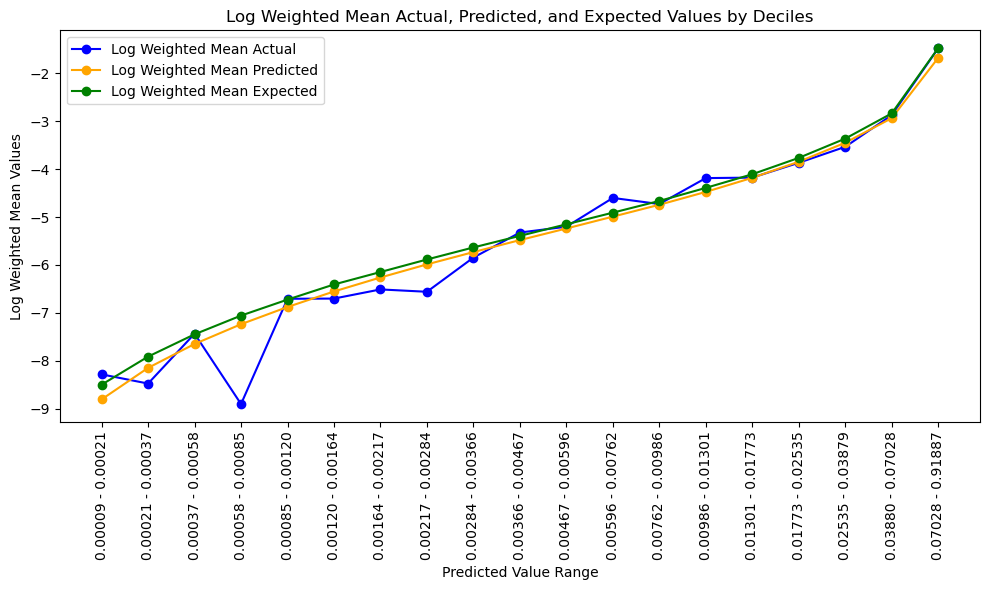

poisson deviance: 25693.163058502963  psuedo R2 =0.34029404424638376
fc2.weight: tensor([[ 1.2376e+00, -7.1850e-05, -2.4349e-04, -4.3399e-04,  1.6468e-04,
         -1.1785e-04,  1.0682e-01,  3.9217e-01, -1.2627e-02, -4.8847e-04,
         -8.3922e-04, -2.7928e-04,  5.3258e-04,  9.1277e-03, -4.2509e-02,
         -8.9505e-02, -4.7239e-04, -1.7814e-02, -1.8572e-04, -2.2140e-01,
         -2.2571e-04,  2.9896e-02]])
fc2.bias: tensor([-6.8186])
fc_zero_inflation.weight: tensor([[ 0.6994,  0.2353,  0.0111,  0.2950, -0.3260, -0.1324,  0.1440, -0.3007,
          0.6119, -0.0071, -0.0537,  0.0498, -0.1107,  0.0247,  0.0670, -0.1685,
         -0.0053,  0.0185, -0.0253,  0.0052, -0.0279,  0.0136]])
fc_zero_inflation.bias: tensor([-3.5258])


In [45]:
model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    y_pred_poisson = poisson_outputs.numpy().flatten()
    y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()

# Combine the Poisson and Bernoulli outputs to get the final predictions
y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

# Flatten the actual values and weights
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()
actual = actual + 1e-25  # Ensure no zero or negative values for actual claims

# Add ExpectedClaims from test_df for additional context in lift analysis
expected_claims = test_df["ExpectedClaims"].values.flatten() if "ExpectedClaims" in test_df.columns else np.zeros_like(actual)

# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({
    "actual": actual,
    "predicted": predicted,
    "expected": expected_claims,
    "weights": weights
})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = X_test_scaled["Age"]

# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)

def weighted_mean(group):
    return pd.Series({
        "weighted_actual": np.average(group["actual"], weights=group["weights"]),
        "weighted_predicted": np.average(group["predicted"], weights=group["weights"]),
        "weighted_expected": np.average(group["expected"], weights=group["weights"]),
        "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
    })

# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)
decile_summary = decile_summary.iloc[1:].reset_index(drop=True)

# Take log of actual, predicted, and expected values
decile_summary["log_weighted_actual"] = np.log(decile_summary["weighted_actual"])
decile_summary["log_weighted_predicted"] = np.log(decile_summary["weighted_predicted"])
decile_summary["log_weighted_expected"] = np.log(decile_summary["weighted_expected"])

# Plot the weighted mean actual, predicted, and expected values for each decile
plt.figure(figsize=(10, 6))
plt.plot(decile_summary["log_weighted_actual"], label="Log Weighted Mean Actual", color="blue", marker="o")
plt.plot(decile_summary["log_weighted_predicted"], label="Log Weighted Mean Predicted", color="orange", marker="o")
plt.plot(decile_summary["log_weighted_expected"], label="Log Weighted Mean Expected", color="green", marker="o")
plt.xlabel("Predicted Value Range")
plt.ylabel("Log Weighted Mean Values")
plt.title("Log Weighted Mean Actual, Predicted, and Expected Values by Deciles")
plt.xticks(ticks=range(19), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Deviance and pseudo R2
mean_target = np.mean(actual)
null_deviance = 2 * sum(actual * np.log(actual / mean_target) - (actual - mean_target))
model_deviance = 2 * sum(actual * np.log(actual / y_pred) - (actual - y_pred))
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)

weights = model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")

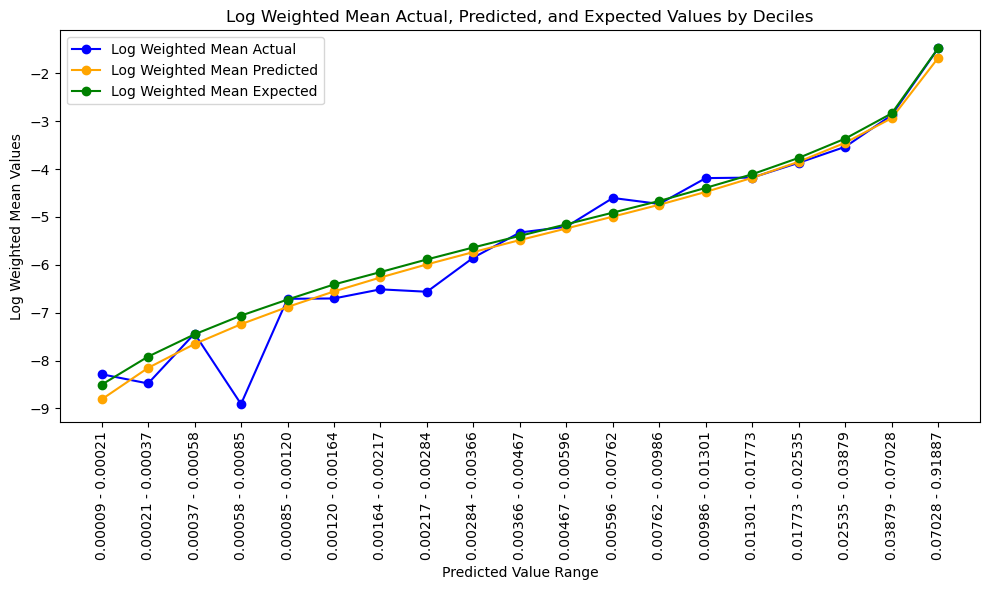

In [46]:
model.eval()

with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(X_test_tensor, lives_exposure_test_tensor)
    y_pred_poisson = poisson_outputs.numpy().flatten()
    y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()

# Combine the Poisson and Bernoulli outputs to get the final predictions
y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

# Flatten the actual values and weights
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 10)
weights = lives_exposure_test_tensor.numpy().flatten()

# Ensure all data is 1-dimensional
actual = actual.flatten()
predicted = predicted.flatten()
weights = weights.flatten()
actual = actual + 1e-25  # Avoid log(0) issues

# Add ExpectedClaims from test_df if available
expected_claims = test_df["ExpectedClaims"].values.flatten() if "ExpectedClaims" in test_df.columns else np.zeros_like(actual)

# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "expected": expected_claims, "weights": weights})
df_lift = df_lift.sort_values(by="predicted", ascending=False)

# Create deciles (20 groups)
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)

def weighted_mean(group):
    return pd.Series({
        "weighted_actual": np.average(group["actual"], weights=group["weights"]),
        "weighted_predicted": np.average(group["predicted"], weights=group["weights"]),
        "weighted_expected": np.average(group["expected"], weights=group["weights"]),
        "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
    })

# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)
decile_summary = decile_summary.iloc[1:].reset_index(drop=True)

# Take log of actual, predicted, and expected values
decile_summary["log_weighted_actual"] = np.log(decile_summary["weighted_actual"])
decile_summary["log_weighted_predicted"] = np.log(decile_summary["weighted_predicted"])
decile_summary["log_weighted_expected"] = np.log(decile_summary["weighted_expected"])

# Plot the weighted mean actual, predicted, and expected values for each decile
plt.figure(figsize=(10, 6))
plt.plot(decile_summary["log_weighted_actual"], label="Log Weighted Mean Actual", color="blue", marker="o")
plt.plot(decile_summary["log_weighted_predicted"], label="Log Weighted Mean Predicted", color="orange", marker="o")
plt.plot(decile_summary["log_weighted_expected"], label="Log Weighted Mean Expected", color="green", marker="o")
plt.xlabel("Predicted Value Range")
plt.ylabel("Log Weighted Mean Values")
plt.title("Log Weighted Mean Actual, Predicted, and Expected Values by Deciles")
plt.xticks(ticks=range(19), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

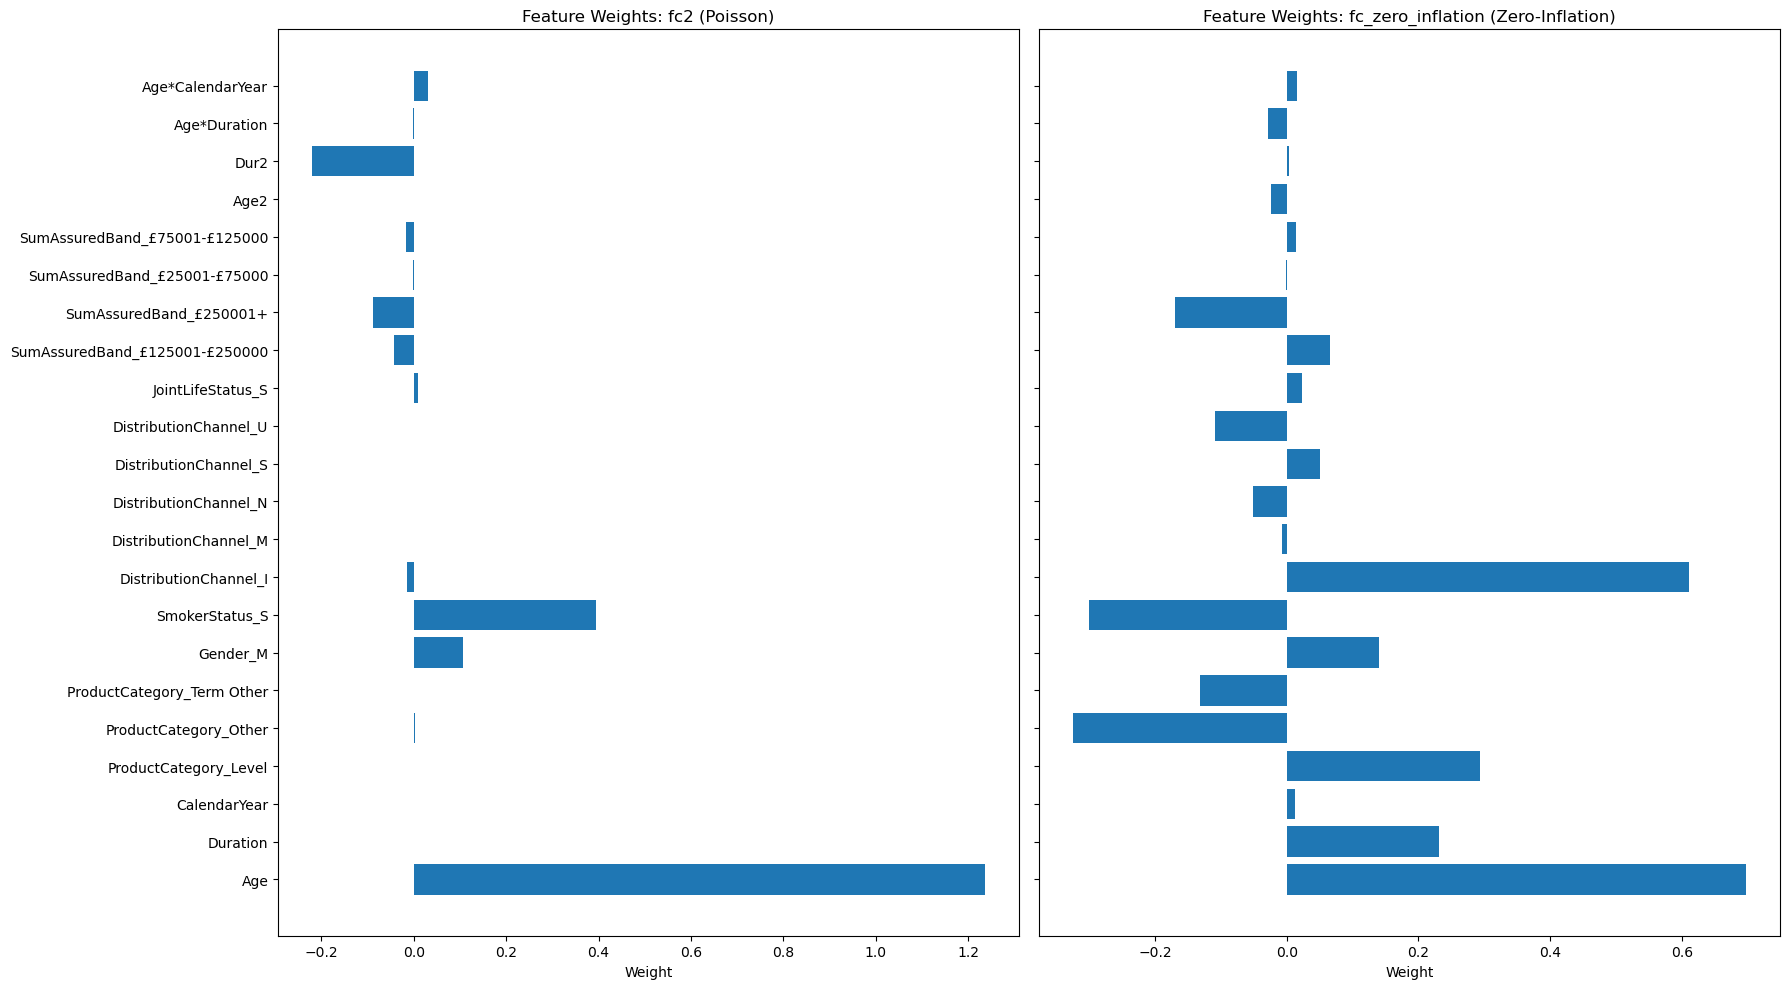

In [52]:
feature_names = list(X_train_scaled.columns)
interaction_names = []
for idx in model.duration_indices:
    interaction_names.append(f"Age*{X_train_scaled.columns[idx]}")
for idx in model.commencement_year_indices:
    interaction_names.append(f"Age*{X_train_scaled.columns[idx]}")
feature_names += interaction_names

weights_dict = model.state_dict()
fc2_weights = weights_dict["fc2.weight"].detach().cpu().numpy().flatten()
fc_zero_weights = weights_dict["fc_zero_inflation.weight"].detach().cpu().numpy().flatten()

fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

axes[0].barh(feature_names, fc2_weights)
axes[0].set_xlabel("Weight")
axes[0].set_title("Feature Weights: fc2 (Poisson)")

axes[1].barh(feature_names, fc_zero_weights)
axes[1].set_xlabel("Weight")
axes[1].set_title("Feature Weights: fc_zero_inflation (Zero-Inflation)")

plt.tight_layout()
plt.show()


In [69]:
#combined_df_encoded.to_csv("combined_df_encoded.csv", index=False)
best_trial_params= {'lr': 0.16499400906958195, 'weight_decay': 7.771609386937672e-06, 'num_epochs': 707, 'lambda_l1': 0.012188947951286626, 'age_cut': 76, 'age_power': 2.5300139707482083, 'age_multiplier': 1, 'duration_power': -0.7700043460802583, 'duration_multiplier': 1, 'saturated_r2': 0.2776065468788147}

In [82]:
def objective(trial, features, df, best_trial_params=None):
    if best_trial_params is None:
        lr = trial.suggest_float("lr", 9e-2, 2e-1, log=True)  # changed to 0.09 frrom 0.001 on 2025-03-26
        weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
        num_epochs = trial.suggest_int("num_epochs", 400, 1200) # changed to 400 from 5 on 2025-03-26
        lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-1, log=True)
        age_cut = trial.suggest_int("age_cut", 20, 90)
        age_power = trial.suggest_float("age_power", 1.1, 5)
        age_multiplier = trial.suggest_int("age_multiplier", 0, 1)
        duration_power = trial.suggest_float("duration_power", -1, 3)
        duration_multiplier = trial.suggest_int("duration_multiplier", 0, 1)
    else:
        lr = best_trial_params["lr"]
        weight_decay = best_trial_params["weight_decay"]
        num_epochs = best_trial_params["num_epochs"]
        lambda_l1 = best_trial_params["lambda_l1"]
        age_cut = best_trial_params["age_cut"]
        age_power = best_trial_params["age_power"]
        age_multiplier = best_trial_params["age_multiplier"]
        duration_power = best_trial_params["duration_power"]
        duration_multiplier = best_trial_params["duration_multiplier"]

    pseudo_r2_scores = []

    for fold in range(1, 2):
        df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
        df["Dur2"] = duration_multiplier * np.maximum(df["Duration"] + 1, 0) ** duration_power
        df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)
        train_df = df[df["holdout"] == 0]
        test_df = df[~(df["holdout"] == 0)]

        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]

        if "Age2" not in features:
            features.append("Age2")
        if "Dur2" not in features:
            features.append("Dur2")

        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
        lives_exposure_train_tensor = torch.tensor(train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32)
        lives_exposure_test_tensor = torch.tensor(test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32)

        # Train Poisson model first
        poisson_model = Poisson_Net()
        optimizer_poisson = optim.Adam(poisson_model.parameters(), lr=lr, weight_decay=weight_decay)

        for epoch in range(int(num_epochs / 100.25)):
            optimizer_poisson.zero_grad()
            poisson_outputs = poisson_model(X_train_tensor, lives_exposure_train_tensor)
            poisson_loss = weighted_poisson_loss(poisson_outputs, y_train_tensor, lives_exposure_train_tensor)
            l1_reg = l1_loss(poisson_model, lambda_l1=lambda_l1)
            total_loss = poisson_loss + l1_reg
            total_loss.backward()
            optimizer_poisson.step()

        # Initialize and fine-tune the full ZIP model
        model = Mort_Net_ZIP()
        model.fc2.weight.data = poisson_model.fc2.weight.data.clone()
        model.fc2.bias.data = poisson_model.fc2.bias.data.clone()
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        for epoch in range(int(num_epochs / 100.25), num_epochs):
            optimizer.zero_grad()
            poisson_outputs, zero_inflation_outputs = model(X_train_tensor, lives_exposure_train_tensor)
            loss = joint_loss(poisson_outputs, zero_inflation_outputs, y_train_tensor, lives_exposure_train_tensor)
            l1_reg = l1_loss(model, lambda_l1=lambda_l1)
            total_loss = loss + l1_reg
            total_loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            poisson_outputs, zero_inflation_outputs = model(X_test_tensor, lives_exposure_test_tensor)
            y_pred_poisson = poisson_outputs.numpy().flatten()
            y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()

            # Combine the Poisson and Bernoulli outputs to get the final predictions
            y_pred = poisson_outputs * (1 - zero_inflation_outputs) +1e-8
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(y_test_tensor * lives_exposure_test_tensor) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target) - (y_test_tensor - weighted_mean_target)
                )
            )
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor * (
                    y_test_tensor * torch.log(y_test_tensor / y_pred) - (y_test_tensor - y_pred)
                )
            )
            pseudo_r2 = 1 - (model_deviance / null_deviance)
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2

In [ ]:
# Initial set of features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    "DistributionChannel_N",
    "DistributionChannel_S",
    # "DistributionChannel_U",
    "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    # "ProductCategory_Other",
    "ProductCategory_Term Other",
]
features = [feature for feature in features if feature not in exclude_features]
df = combined_df_encoded.drop(columns=exclude_features, axis=1)

# Determine the best parameters using Optuna to maximize R2 score of deciles
study_deciles_r2_optuna = optuna.create_study(direction="maximize")
study_deciles_r2_optuna.optimize(lambda trial: objective(trial, features, df.sample(frac=0.6, random_state=1)), n_trials=50)

best_trial = study_deciles_r2_optuna.best_trial
best_trial_params = best_trial.params
best_trial_params["saturated_r2"] = best_trial.value
print(f"best_trial_params {best_trial_params}")


[I 2025-03-08 22:21:16,805] A new study created in memory with name: no-name-a4135e82-9f89-44ea-b941-a056c9e01c5c
[I 2025-03-08 23:06:12,220] Trial 0 finished with value: -6.40615701675415 and parameters: {'lr': 0.010117439733894482, 'weight_decay': 0.0001612843613387966, 'num_epochs': 835, 'lambda_l1': 0.00015159124968519764, 'age_cut': 46, 'age_power': 1.6246998096228382, 'age_multiplier': 0, 'duration_power': 2.6673334539713416, 'duration_multiplier': 0}. Best is trial 0 with value: -6.40615701675415.


Mean Pseudo_R2: -6.4062


[I 2025-03-08 23:29:02,345] Trial 1 finished with value: 0.0640486478805542 and parameters: {'lr': 0.08272370066565102, 'weight_decay': 2.6516004156976397e-06, 'num_epochs': 507, 'lambda_l1': 0.001437275785632162, 'age_cut': 30, 'age_power': 2.7678345207152892, 'age_multiplier': 0, 'duration_power': 0.5377808360846084, 'duration_multiplier': 1}. Best is trial 1 with value: 0.0640486478805542.


Mean Pseudo_R2: 0.0640


[I 2025-03-08 23:32:07,912] Trial 2 finished with value: -3.778850555419922 and parameters: {'lr': 0.130969042117167, 'weight_decay': 0.0007087924428069477, 'num_epochs': 84, 'lambda_l1': 0.019518912115963502, 'age_cut': 62, 'age_power': 2.6207602860504067, 'age_multiplier': 0, 'duration_power': 2.1907626701618854, 'duration_multiplier': 0}. Best is trial 1 with value: 0.0640486478805542.


Mean Pseudo_R2: -3.7789


[I 2025-03-08 23:55:24,100] Trial 3 finished with value: 0.2709106206893921 and parameters: {'lr': 0.18463591778118896, 'weight_decay': 1.634324123136778e-06, 'num_epochs': 654, 'lambda_l1': 0.02947010253611286, 'age_cut': 67, 'age_power': 2.648937010560539, 'age_multiplier': 0, 'duration_power': 2.7700358768309057, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: 0.2709


[I 2025-03-09 00:20:38,724] Trial 4 finished with value: -31.588542938232422 and parameters: {'lr': 0.004431633404171134, 'weight_decay': 0.00025740940210170355, 'num_epochs': 703, 'lambda_l1': 0.019481064076150852, 'age_cut': 48, 'age_power': 4.9674239984619275, 'age_multiplier': 0, 'duration_power': 1.2659486068499572, 'duration_multiplier': 0}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: -31.5885


[I 2025-03-09 00:27:22,601] Trial 5 finished with value: -87.11253356933594 and parameters: {'lr': 0.005965086124076987, 'weight_decay': 0.0023713636322251317, 'num_epochs': 190, 'lambda_l1': 0.009856237521996316, 'age_cut': 37, 'age_power': 3.211742374139588, 'age_multiplier': 0, 'duration_power': 0.5649601835504154, 'duration_multiplier': 0}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: -87.1125


[I 2025-03-09 00:56:13,797] Trial 6 finished with value: -inf and parameters: {'lr': 0.0017648542974812115, 'weight_decay': 1.885997455331181e-06, 'num_epochs': 790, 'lambda_l1': 0.008496272621780319, 'age_cut': 72, 'age_power': 4.746614608315239, 'age_multiplier': 1, 'duration_power': 2.9376041570290443, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: -inf


[I 2025-03-09 01:13:02,098] Trial 7 finished with value: 0.12043488025665283 and parameters: {'lr': 0.1067939568927114, 'weight_decay': 5.655819840551369e-06, 'num_epochs': 453, 'lambda_l1': 0.00012282207469120352, 'age_cut': 47, 'age_power': 1.8521464347484975, 'age_multiplier': 0, 'duration_power': 2.4254896761484654, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: 0.1204


[I 2025-03-09 01:32:31,411] Trial 8 finished with value: -4.469038486480713 and parameters: {'lr': 0.015952886143215907, 'weight_decay': 2.8918052397411357e-06, 'num_epochs': 545, 'lambda_l1': 0.007313221998195235, 'age_cut': 24, 'age_power': 4.877155236530111, 'age_multiplier': 1, 'duration_power': -0.32978103671191406, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: -4.4690


[I 2025-03-09 01:33:38,368] Trial 9 finished with value: -48.464786529541016 and parameters: {'lr': 0.04367626839903108, 'weight_decay': 3.542039347510157e-06, 'num_epochs': 32, 'lambda_l1': 0.005347219810925807, 'age_cut': 74, 'age_power': 3.9565449958166528, 'age_multiplier': 0, 'duration_power': 2.0601212451727164, 'duration_multiplier': 0}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: -48.4648


[I 2025-03-09 03:15:24,889] Trial 10 finished with value: 0.12885308265686035 and parameters: {'lr': 0.03745455360987374, 'weight_decay': 3.7505500964037886e-05, 'num_epochs': 1160, 'lambda_l1': 1.0348517015456682e-05, 'age_cut': 90, 'age_power': 1.170573080460608, 'age_multiplier': 1, 'duration_power': 1.4794533806011592, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: 0.1289


[I 2025-03-09 03:56:53,150] Trial 11 finished with value: -inf and parameters: {'lr': 0.02750341578817707, 'weight_decay': 2.0978649920410795e-05, 'num_epochs': 1156, 'lambda_l1': 1.0464463251495615e-05, 'age_cut': 89, 'age_power': 1.4129478398166324, 'age_multiplier': 1, 'duration_power': 1.578138805762947, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: -inf


[I 2025-03-09 04:39:04,804] Trial 12 finished with value: 0.22391152381896973 and parameters: {'lr': 0.1950782587391066, 'weight_decay': 2.4816670110774583e-05, 'num_epochs': 1181, 'lambda_l1': 0.05448122591339095, 'age_cut': 87, 'age_power': 1.1206964227671792, 'age_multiplier': 1, 'duration_power': -0.7765964858488883, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2709106206893921.


Mean Pseudo_R2: 0.2239


[I 2025-03-09 05:14:11,046] Trial 13 finished with value: 0.2726261019706726 and parameters: {'lr': 0.19861062551371142, 'weight_decay': 1.9268567043723638e-05, 'num_epochs': 974, 'lambda_l1': 0.08403220771977156, 'age_cut': 77, 'age_power': 2.2670130003696336, 'age_multiplier': 1, 'duration_power': -0.8011318282802086, 'duration_multiplier': 1}. Best is trial 13 with value: 0.2726261019706726.


Mean Pseudo_R2: 0.2726


[I 2025-03-09 05:47:02,302] Trial 14 finished with value: 0.24970990419387817 and parameters: {'lr': 0.08057274218905197, 'weight_decay': 1.006891920277115e-06, 'num_epochs': 921, 'lambda_l1': 0.08907214845193995, 'age_cut': 66, 'age_power': 2.3129771330204827, 'age_multiplier': 1, 'duration_power': -0.07206348961767994, 'duration_multiplier': 1}. Best is trial 13 with value: 0.2726261019706726.


Mean Pseudo_R2: 0.2497


[I 2025-03-09 06:22:03,178] Trial 15 finished with value: 0.2757914066314697 and parameters: {'lr': 0.18639965096890965, 'weight_decay': 1.0215538509804568e-05, 'num_epochs': 953, 'lambda_l1': 0.0014786972698141076, 'age_cut': 78, 'age_power': 3.3791947301240945, 'age_multiplier': 1, 'duration_power': 0.6890963918936687, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2758


[I 2025-03-09 06:58:08,514] Trial 16 finished with value: 0.242340087890625 and parameters: {'lr': 0.0601562363632265, 'weight_decay': 1.0328526400049542e-05, 'num_epochs': 1021, 'lambda_l1': 0.0012099077605500828, 'age_cut': 79, 'age_power': 3.454172552229958, 'age_multiplier': 1, 'duration_power': -0.9431087957275528, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2423


[I 2025-03-09 07:34:17,926] Trial 17 finished with value: -0.7794404029846191 and parameters: {'lr': 0.02429111518347472, 'weight_decay': 7.222636856659955e-05, 'num_epochs': 998, 'lambda_l1': 0.0001659420750763947, 'age_cut': 58, 'age_power': 3.817087008191221, 'age_multiplier': 1, 'duration_power': 0.575024183920659, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: -0.7794


[I 2025-03-09 08:10:03,339] Trial 18 finished with value: -inf and parameters: {'lr': 0.001186486277589963, 'weight_decay': 0.008707180092937866, 'num_epochs': 999, 'lambda_l1': 0.0004611573582086764, 'age_cut': 81, 'age_power': 2.166890721815032, 'age_multiplier': 1, 'duration_power': -0.1930798565826829, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: -inf


[I 2025-03-09 08:22:52,325] Trial 19 finished with value: 0.03484302759170532 and parameters: {'lr': 0.122061494442563, 'weight_decay': 1.0458654461944501e-05, 'num_epochs': 361, 'lambda_l1': 0.002699140221280325, 'age_cut': 79, 'age_power': 4.245802834375867, 'age_multiplier': 1, 'duration_power': 0.2591697915864868, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.0348


[I 2025-03-09 08:51:26,535] Trial 20 finished with value: 0.14328551292419434 and parameters: {'lr': 0.06057957398620494, 'weight_decay': 6.958673096218151e-05, 'num_epochs': 799, 'lambda_l1': 2.9323798319497253e-05, 'age_cut': 54, 'age_power': 3.126286132923608, 'age_multiplier': 1, 'duration_power': 0.9897119809736616, 'duration_multiplier': 0}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.1433


[I 2025-03-09 09:15:41,100] Trial 21 finished with value: 0.2696530818939209 and parameters: {'lr': 0.18376221560512618, 'weight_decay': 9.758466291176422e-06, 'num_epochs': 675, 'lambda_l1': 0.035203659296082296, 'age_cut': 68, 'age_power': 2.720814671064413, 'age_multiplier': 0, 'duration_power': 1.8575201686426828, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2697


[I 2025-03-09 09:46:33,146] Trial 22 finished with value: 0.2672709822654724 and parameters: {'lr': 0.19166616735977812, 'weight_decay': 1.1947787489587216e-06, 'num_epochs': 637, 'lambda_l1': 0.0803551546574458, 'age_cut': 73, 'age_power': 2.2506100813032512, 'age_multiplier': 1, 'duration_power': 0.9990231096261749, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2673


[I 2025-03-09 10:40:40,603] Trial 23 finished with value: 0.2735850214958191 and parameters: {'lr': 0.1283013798447319, 'weight_decay': 5.645835212048828e-06, 'num_epochs': 890, 'lambda_l1': 0.025872423328751584, 'age_cut': 81, 'age_power': 3.595745463081239, 'age_multiplier': 1, 'duration_power': -0.5710701026011107, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2736


[I 2025-03-09 12:03:09,200] Trial 24 finished with value: 0.2689271569252014 and parameters: {'lr': 0.1063557737913052, 'weight_decay': 6.067048326982475e-06, 'num_epochs': 906, 'lambda_l1': 0.0006634683456509609, 'age_cut': 79, 'age_power': 3.4847264932543043, 'age_multiplier': 1, 'duration_power': -0.5890877861106679, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2689


[I 2025-03-09 13:48:20,440] Trial 25 finished with value: 0.23508143424987793 and parameters: {'lr': 0.058938471687597103, 'weight_decay': 2.6346031901815267e-05, 'num_epochs': 1074, 'lambda_l1': 0.0028485892507133406, 'age_cut': 84, 'age_power': 4.29491777862048, 'age_multiplier': 1, 'duration_power': 0.10412443207252009, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2351


[I 2025-03-09 14:24:16,474] Trial 26 finished with value: 0.27396154403686523 and parameters: {'lr': 0.11883910997426174, 'weight_decay': 1.5484878581404355e-05, 'num_epochs': 899, 'lambda_l1': 0.01604235303285165, 'age_cut': 75, 'age_power': 3.5845450727439165, 'age_multiplier': 1, 'duration_power': -0.5525774161405582, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2740


[I 2025-03-09 14:55:44,305] Trial 27 finished with value: -0.25138378143310547 and parameters: {'lr': 0.03471786828855183, 'weight_decay': 5.61211319706833e-06, 'num_epochs': 851, 'lambda_l1': 0.003144246075288593, 'age_cut': 85, 'age_power': 3.725597999484726, 'age_multiplier': 1, 'duration_power': -0.4741725202711779, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: -0.2514


[I 2025-03-09 15:23:58,731] Trial 28 finished with value: -3.0966029167175293 and parameters: {'lr': 0.016189178930905015, 'weight_decay': 5.0361590118325314e-05, 'num_epochs': 760, 'lambda_l1': 0.018019738191546383, 'age_cut': 61, 'age_power': 4.124419644920978, 'age_multiplier': 1, 'duration_power': 0.23651571583816633, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: -3.0966


[I 2025-03-09 15:56:43,407] Trial 29 finished with value: -7.118773460388184 and parameters: {'lr': 0.00986051408778798, 'weight_decay': 0.00020051731769423351, 'num_epochs': 871, 'lambda_l1': 0.00023631227925203276, 'age_cut': 53, 'age_power': 3.5221940904657183, 'age_multiplier': 1, 'duration_power': -0.6358800405618518, 'duration_multiplier': 0}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: -7.1188


[I 2025-03-09 16:42:49,505] Trial 30 finished with value: 0.2691630721092224 and parameters: {'lr': 0.07651063188885224, 'weight_decay': 0.0004234374682333663, 'num_epochs': 1119, 'lambda_l1': 0.012338597464089152, 'age_cut': 72, 'age_power': 4.4683252419815656, 'age_multiplier': 1, 'duration_power': -0.0736389486629076, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2692


[I 2025-03-09 17:21:49,278] Trial 31 finished with value: 0.2756997346878052 and parameters: {'lr': 0.1406095838947407, 'weight_decay': 1.2885531046117709e-05, 'num_epochs': 943, 'lambda_l1': 0.0409649887365748, 'age_cut': 75, 'age_power': 3.003588563034076, 'age_multiplier': 1, 'duration_power': -0.9682381973083212, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2757


[I 2025-03-09 18:12:39,642] Trial 32 finished with value: 0.2753297686576843 and parameters: {'lr': 0.12321121115337319, 'weight_decay': 1.3481609986453359e-05, 'num_epochs': 923, 'lambda_l1': 0.040036064835836764, 'age_cut': 82, 'age_power': 2.984355725039925, 'age_multiplier': 1, 'duration_power': -0.9142603204001197, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2753


[I 2025-03-09 19:29:03,662] Trial 33 finished with value: 0.272885262966156 and parameters: {'lr': 0.09638079444731515, 'weight_decay': 1.3335252150396153e-05, 'num_epochs': 1075, 'lambda_l1': 0.046895084597370865, 'age_cut': 69, 'age_power': 3.0612946309948366, 'age_multiplier': 1, 'duration_power': -0.9704805495898077, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2729


[I 2025-03-09 20:21:25,873] Trial 34 finished with value: 0.27389776706695557 and parameters: {'lr': 0.13623277831679417, 'weight_decay': 0.00010733542375606255, 'num_epochs': 946, 'lambda_l1': 0.04793314063140653, 'age_cut': 84, 'age_power': 3.306371669436542, 'age_multiplier': 1, 'duration_power': -0.36568450810647524, 'duration_multiplier': 1}. Best is trial 15 with value: 0.2757914066314697.


Mean Pseudo_R2: 0.2739


[I 2025-03-09 21:12:48,535] Trial 35 finished with value: 0.27609461545944214 and parameters: {'lr': 0.1462208656567774, 'weight_decay': 4.112076827554437e-05, 'num_epochs': 759, 'lambda_l1': 0.004714199858468975, 'age_cut': 62, 'age_power': 2.8896587823437443, 'age_multiplier': 1, 'duration_power': -0.9406441836908314, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27609461545944214.


Mean Pseudo_R2: 0.2761


[I 2025-03-09 21:54:19,187] Trial 36 finished with value: 0.26758211851119995 and parameters: {'lr': 0.14502256017742596, 'weight_decay': 0.00014304380414612315, 'num_epochs': 734, 'lambda_l1': 0.004569646003773238, 'age_cut': 63, 'age_power': 2.4971079843648814, 'age_multiplier': 1, 'duration_power': 0.7472744049543242, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27609461545944214.


Mean Pseudo_R2: 0.2676


[I 2025-03-09 22:16:14,952] Trial 37 finished with value: 0.04405808448791504 and parameters: {'lr': 0.07316422741668646, 'weight_decay': 5.585901991075073e-05, 'num_epochs': 561, 'lambda_l1': 0.0006249316632156566, 'age_cut': 40, 'age_power': 2.8766389461015374, 'age_multiplier': 1, 'duration_power': -0.954061103619815, 'duration_multiplier': 0}. Best is trial 35 with value: 0.27609461545944214.


Mean Pseudo_R2: 0.0441


[I 2025-03-09 22:46:03,048] Trial 38 finished with value: -0.0009859800338745117 and parameters: {'lr': 0.05194086751087858, 'weight_decay': 4.1030595680204136e-05, 'num_epochs': 810, 'lambda_l1': 0.0019243817373060701, 'age_cut': 64, 'age_power': 2.9624666056196576, 'age_multiplier': 0, 'duration_power': -0.3197017935644797, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27609461545944214.


Mean Pseudo_R2: -0.0010


[I 2025-03-09 23:25:12,417] Trial 39 finished with value: -29.0983829498291 and parameters: {'lr': 0.00242345916775308, 'weight_decay': 3.206187467766208e-05, 'num_epochs': 1061, 'lambda_l1': 0.0017355148902517858, 'age_cut': 58, 'age_power': 1.957580090708941, 'age_multiplier': 1, 'duration_power': -0.8226619814483737, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27609461545944214.


Mean Pseudo_R2: -29.0984


[I 2025-03-09 23:41:30,500] Trial 40 finished with value: -0.030612707138061523 and parameters: {'lr': 0.08619644893185473, 'weight_decay': 0.0011277636001184451, 'num_epochs': 452, 'lambda_l1': 0.005344695466839161, 'age_cut': 71, 'age_power': 3.2730097158680924, 'age_multiplier': 1, 'duration_power': 2.5422768742994384, 'duration_multiplier': 0}. Best is trial 35 with value: 0.27609461545944214.


Mean Pseudo_R2: -0.0306


[I 2025-03-10 00:12:18,130] Trial 41 finished with value: 0.2772999405860901 and parameters: {'lr': 0.14992223463298882, 'weight_decay': 1.6980125125255985e-05, 'num_epochs': 840, 'lambda_l1': 0.014946825549526357, 'age_cut': 77, 'age_power': 2.5376178408038523, 'age_multiplier': 1, 'duration_power': -0.6933688959441149, 'duration_multiplier': 1}. Best is trial 41 with value: 0.2772999405860901.


Mean Pseudo_R2: 0.2773


[I 2025-03-10 00:38:05,385] Trial 42 finished with value: 0.2776065468788147 and parameters: {'lr': 0.16499400906958195, 'weight_decay': 7.771609386937672e-06, 'num_epochs': 707, 'lambda_l1': 0.012188947951286626, 'age_cut': 76, 'age_power': 2.5300139707482083, 'age_multiplier': 1, 'duration_power': -0.7700043460802583, 'duration_multiplier': 1}. Best is trial 42 with value: 0.2776065468788147.


Mean Pseudo_R2: 0.2776


[I 2025-03-10 01:05:00,354] Trial 43 finished with value: 0.272893488407135 and parameters: {'lr': 0.15333620762479008, 'weight_decay': 2.3158931543176468e-06, 'num_epochs': 739, 'lambda_l1': 0.01021531761491647, 'age_cut': 76, 'age_power': 2.5666878142420364, 'age_multiplier': 1, 'duration_power': -0.7126848214339983, 'duration_multiplier': 1}. Best is trial 42 with value: 0.2776065468788147.


Mean Pseudo_R2: 0.2729


[I 2025-03-10 01:27:29,869] Trial 44 finished with value: 0.2743351459503174 and parameters: {'lr': 0.16285935556602563, 'weight_decay': 4.225248439979165e-06, 'num_epochs': 613, 'lambda_l1': 0.006926808604552751, 'age_cut': 69, 'age_power': 2.7924554852657377, 'age_multiplier': 1, 'duration_power': -0.39228884309254797, 'duration_multiplier': 1}. Best is trial 42 with value: 0.2776065468788147.


Mean Pseudo_R2: 0.2743


[I 2025-03-10 01:52:51,470] Trial 45 finished with value: 0.22376644611358643 and parameters: {'lr': 0.09420252959880386, 'weight_decay': 7.839239279684376e-06, 'num_epochs': 689, 'lambda_l1': 0.02352694448564517, 'age_cut': 50, 'age_power': 2.4737241872052, 'age_multiplier': 1, 'duration_power': 1.3002808906112735, 'duration_multiplier': 1}. Best is trial 42 with value: 0.2776065468788147.


Mean Pseudo_R2: 0.2238


[I 2025-03-10 02:22:17,410] Trial 46 finished with value: -17.813844680786133 and parameters: {'lr': 0.0053352090261056745, 'weight_decay': 3.0095910163540627e-06, 'num_epochs': 795, 'lambda_l1': 0.013699707027177207, 'age_cut': 60, 'age_power': 1.822763505453461, 'age_multiplier': 0, 'duration_power': -0.15581508620672357, 'duration_multiplier': 1}. Best is trial 42 with value: 0.2776065468788147.


Mean Pseudo_R2: -17.8138


[I 2025-03-10 02:52:58,801] Trial 47 finished with value: 0.2758445143699646 and parameters: {'lr': 0.154893911554433, 'weight_decay': 1.9081828402054215e-05, 'num_epochs': 841, 'lambda_l1': 0.003952977955609378, 'age_cut': 22, 'age_power': 2.055694171587935, 'age_multiplier': 1, 'duration_power': -0.7731225493784436, 'duration_multiplier': 1}. Best is trial 42 with value: 0.2776065468788147.


Mean Pseudo_R2: 0.2758


[I 2025-03-10 03:23:34,702] Trial 48 finished with value: 0.2744840383529663 and parameters: {'lr': 0.1607452921918788, 'weight_decay': 1.9055106959385928e-05, 'num_epochs': 839, 'lambda_l1': 0.003720924293325372, 'age_cut': 24, 'age_power': 2.012270322307831, 'age_multiplier': 1, 'duration_power': -0.7096156920573393, 'duration_multiplier': 1}. Best is trial 42 with value: 0.2776065468788147.


Mean Pseudo_R2: 0.2745


[I 2025-03-10 03:44:25,027] Trial 49 finished with value: -0.16000497341156006 and parameters: {'lr': 0.04527611527639031, 'weight_decay': 3.133887475811535e-05, 'num_epochs': 571, 'lambda_l1': 0.0009386391164677073, 'age_cut': 33, 'age_power': 1.6562023374907526, 'age_multiplier': 1, 'duration_power': 0.10950184789413886, 'duration_multiplier': 1}. Best is trial 42 with value: 0.2776065468788147.


Mean Pseudo_R2: -0.1600
best_trial_params {'lr': 0.16499400906958195, 'weight_decay': 7.771609386937672e-06, 'num_epochs': 707, 'lambda_l1': 0.012188947951286626, 'age_cut': 76, 'age_power': 2.5300139707482083, 'age_multiplier': 1, 'duration_power': -0.7700043460802583, 'duration_multiplier': 1, 'saturated_r2': 0.2776065468788147}


In [83]:
# Do not ewxclue any features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    "DistributionChannel_N",
    "DistributionChannel_S",
    # "DistributionChannel_U",
    "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    # "ProductCategory_Other",
    "ProductCategory_Term Other",
]
#features = [feature for feature in features if feature not in exclude_features]
df = combined_df_encoded.drop(columns=exclude_features1, axis=1)

# Determine the best parameters using Optuna to maximize R2 score of deciles
study_deciles_r2_optuna = optuna.create_study(direction="maximize")
study_deciles_r2_optuna.optimize(lambda trial: objective(trial, features, df.sample(frac=0.6, random_state=1)), n_trials=50)

best_trial = study_deciles_r2_optuna.best_trial
best_trial_params = best_trial.params
best_trial_params["saturated_r2"] = best_trial.value
print(f"best_trial_params {best_trial_params}")


[I 2025-03-26 19:58:15,165] A new study created in memory with name: no-name-30f6c677-f2e0-42a1-a0ff-61c3d76ae992
[I 2025-03-26 20:27:21,719] Trial 0 finished with value: 0.26876384019851685 and parameters: {'lr': 0.15012959814612284, 'weight_decay': 5.7275250380867755e-05, 'num_epochs': 771, 'lambda_l1': 0.013166320068196555, 'age_cut': 49, 'age_power': 2.6942694186165834, 'age_multiplier': 0, 'duration_power': 1.661836772791558, 'duration_multiplier': 1}. Best is trial 0 with value: 0.26876384019851685.


Mean Pseudo_R2: 0.2688


[I 2025-03-26 21:03:16,830] Trial 1 finished with value: 0.2667763829231262 and parameters: {'lr': 0.09400982294775513, 'weight_decay': 0.0005618833316297289, 'num_epochs': 1068, 'lambda_l1': 0.0002499088749837384, 'age_cut': 89, 'age_power': 2.4365180112439218, 'age_multiplier': 1, 'duration_power': 1.7652154082940053, 'duration_multiplier': 0}. Best is trial 0 with value: 0.26876384019851685.


Mean Pseudo_R2: 0.2668


[I 2025-03-26 21:34:12,393] Trial 2 finished with value: 0.2704769968986511 and parameters: {'lr': 0.13654598277624214, 'weight_decay': 4.00090396434378e-05, 'num_epochs': 763, 'lambda_l1': 0.0014938376173252122, 'age_cut': 89, 'age_power': 2.3638416956101613, 'age_multiplier': 1, 'duration_power': 2.7669001852727977, 'duration_multiplier': 1}. Best is trial 2 with value: 0.2704769968986511.


Mean Pseudo_R2: 0.2705


[I 2025-03-26 21:53:06,313] Trial 3 finished with value: 0.2029557228088379 and parameters: {'lr': 0.10005951070662417, 'weight_decay': 3.692174096739436e-05, 'num_epochs': 477, 'lambda_l1': 0.012183377609414105, 'age_cut': 43, 'age_power': 4.395347684583202, 'age_multiplier': 0, 'duration_power': -0.6504127857106421, 'duration_multiplier': 1}. Best is trial 2 with value: 0.2704769968986511.


Mean Pseudo_R2: 0.2030


[I 2025-03-26 22:13:54,632] Trial 4 finished with value: 0.25178027153015137 and parameters: {'lr': 0.10750161242685699, 'weight_decay': 8.56344694328662e-06, 'num_epochs': 671, 'lambda_l1': 0.0006673388643685396, 'age_cut': 58, 'age_power': 4.110234815200439, 'age_multiplier': 0, 'duration_power': 2.065574772835622, 'duration_multiplier': 0}. Best is trial 2 with value: 0.2704769968986511.


Mean Pseudo_R2: 0.2518


[I 2025-03-26 22:28:13,063] Trial 5 finished with value: 0.2608891725540161 and parameters: {'lr': 0.1903371703582228, 'weight_decay': 0.0003446950931427573, 'num_epochs': 473, 'lambda_l1': 0.00021539715993441287, 'age_cut': 47, 'age_power': 2.9057234887599566, 'age_multiplier': 1, 'duration_power': 2.0170730981993303, 'duration_multiplier': 1}. Best is trial 2 with value: 0.2704769968986511.


Mean Pseudo_R2: 0.2609


[I 2025-03-26 22:45:33,111] Trial 6 finished with value: 0.2654913663864136 and parameters: {'lr': 0.1648705171880993, 'weight_decay': 1.099456030795984e-05, 'num_epochs': 564, 'lambda_l1': 1.6490605246366246e-05, 'age_cut': 52, 'age_power': 2.3284535238271165, 'age_multiplier': 0, 'duration_power': 1.9886036577198394, 'duration_multiplier': 1}. Best is trial 2 with value: 0.2704769968986511.


Mean Pseudo_R2: 0.2655


[I 2025-03-26 23:22:44,163] Trial 7 finished with value: 0.2729490399360657 and parameters: {'lr': 0.17031070335252757, 'weight_decay': 0.00013203631073081053, 'num_epochs': 1120, 'lambda_l1': 0.004755684975352078, 'age_cut': 65, 'age_power': 3.9738296162728366, 'age_multiplier': 0, 'duration_power': 1.6187837947885182, 'duration_multiplier': 1}. Best is trial 7 with value: 0.2729490399360657.


Mean Pseudo_R2: 0.2729


[I 2025-03-26 23:58:55,345] Trial 8 finished with value: 0.26853036880493164 and parameters: {'lr': 0.1028576707581291, 'weight_decay': 0.008626453297175351, 'num_epochs': 1083, 'lambda_l1': 0.005953161040424906, 'age_cut': 66, 'age_power': 1.6799149576893642, 'age_multiplier': 0, 'duration_power': 2.4099593741569714, 'duration_multiplier': 1}. Best is trial 7 with value: 0.2729490399360657.


Mean Pseudo_R2: 0.2685


[I 2025-03-27 00:24:06,253] Trial 9 finished with value: 0.2701162099838257 and parameters: {'lr': 0.12344491834776872, 'weight_decay': 4.412932096491761e-05, 'num_epochs': 757, 'lambda_l1': 2.29142582117649e-05, 'age_cut': 83, 'age_power': 1.5987121976448795, 'age_multiplier': 0, 'duration_power': 2.0865030910348574, 'duration_multiplier': 1}. Best is trial 7 with value: 0.2729490399360657.


Mean Pseudo_R2: 0.2701


[I 2025-03-27 01:03:21,224] Trial 10 finished with value: 0.26919323205947876 and parameters: {'lr': 0.19719491504523623, 'weight_decay': 1.2409455402446274e-06, 'num_epochs': 1186, 'lambda_l1': 0.05593055063084568, 'age_cut': 21, 'age_power': 3.706148145618744, 'age_multiplier': 1, 'duration_power': 0.3027344251420807, 'duration_multiplier': 0}. Best is trial 7 with value: 0.2729490399360657.


Mean Pseudo_R2: 0.2692


[I 2025-03-27 01:34:13,260] Trial 11 finished with value: 0.27238601446151733 and parameters: {'lr': 0.13766171298483618, 'weight_decay': 0.0004017650630198133, 'num_epochs': 928, 'lambda_l1': 0.0023858423046914353, 'age_cut': 74, 'age_power': 4.858565271456696, 'age_multiplier': 1, 'duration_power': 2.9803584436106036, 'duration_multiplier': 1}. Best is trial 7 with value: 0.2729490399360657.


Mean Pseudo_R2: 0.2724


[I 2025-03-27 02:05:41,009] Trial 12 finished with value: 0.2717519998550415 and parameters: {'lr': 0.16482430118317568, 'weight_decay': 0.0012951980019633676, 'num_epochs': 937, 'lambda_l1': 0.001556322183887151, 'age_cut': 72, 'age_power': 4.929889856594231, 'age_multiplier': 1, 'duration_power': 0.6230758886470517, 'duration_multiplier': 1}. Best is trial 7 with value: 0.2729490399360657.


Mean Pseudo_R2: 0.2718


[I 2025-03-27 02:36:56,604] Trial 13 finished with value: 0.2618231773376465 and parameters: {'lr': 0.12184526038097318, 'weight_decay': 0.002620093274243044, 'num_epochs': 941, 'lambda_l1': 0.09936372707835701, 'age_cut': 74, 'age_power': 3.59117434498612, 'age_multiplier': 1, 'duration_power': 1.14934344815952, 'duration_multiplier': 1}. Best is trial 7 with value: 0.2729490399360657.


Mean Pseudo_R2: 0.2618


[I 2025-03-27 03:07:56,619] Trial 14 finished with value: 0.2693614363670349 and parameters: {'lr': 0.17001197606193771, 'weight_decay': 0.0003072440247139304, 'num_epochs': 932, 'lambda_l1': 0.0031721132272709103, 'age_cut': 63, 'age_power': 4.930386853697674, 'age_multiplier': 0, 'duration_power': 2.9807701715960655, 'duration_multiplier': 0}. Best is trial 7 with value: 0.2729490399360657.


Mean Pseudo_R2: 0.2694


[I 2025-03-27 03:48:29,323] Trial 15 finished with value: 0.27344781160354614 and parameters: {'lr': 0.1347580235461688, 'weight_decay': 0.00020350859919688208, 'num_epochs': 1199, 'lambda_l1': 0.027296780443905374, 'age_cut': 32, 'age_power': 4.3726684024139, 'age_multiplier': 1, 'duration_power': -0.08351886262148023, 'duration_multiplier': 1}. Best is trial 15 with value: 0.27344781160354614.


Mean Pseudo_R2: 0.2734


[I 2025-03-27 04:27:25,667] Trial 16 finished with value: 0.27492088079452515 and parameters: {'lr': 0.15158239821234276, 'weight_decay': 0.00011927947321777289, 'num_epochs': 1178, 'lambda_l1': 0.029482479674967685, 'age_cut': 34, 'age_power': 3.4595577464785703, 'age_multiplier': 1, 'duration_power': -0.44657674777485257, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2749


[I 2025-03-27 05:06:46,517] Trial 17 finished with value: 0.27010124921798706 and parameters: {'lr': 0.15054734326591535, 'weight_decay': 9.508798679551476e-06, 'num_epochs': 1179, 'lambda_l1': 0.025935492147237765, 'age_cut': 32, 'age_power': 3.323079666170143, 'age_multiplier': 1, 'duration_power': -0.7839474204931018, 'duration_multiplier': 0}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2701


[I 2025-03-27 05:41:07,373] Trial 18 finished with value: 0.2730768918991089 and parameters: {'lr': 0.11815427256720268, 'weight_decay': 0.0013726413052954428, 'num_epochs': 1021, 'lambda_l1': 0.03693337114763631, 'age_cut': 34, 'age_power': 4.367166164916672, 'age_multiplier': 1, 'duration_power': -0.1478879934759063, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2731


[I 2025-03-27 06:14:38,082] Trial 19 finished with value: 0.2745148539543152 and parameters: {'lr': 0.149210302452569, 'weight_decay': 0.00010416854274489029, 'num_epochs': 1003, 'lambda_l1': 0.014083949251038657, 'age_cut': 26, 'age_power': 3.1188506754150427, 'age_multiplier': 1, 'duration_power': -0.157209711556618, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2745


[I 2025-03-27 06:48:33,113] Trial 20 finished with value: 0.27029693126678467 and parameters: {'lr': 0.14962489821167632, 'weight_decay': 2.3153825601140222e-06, 'num_epochs': 1025, 'lambda_l1': 0.010620550071387281, 'age_cut': 22, 'age_power': 3.1837996166633244, 'age_multiplier': 1, 'duration_power': -0.35187828937133364, 'duration_multiplier': 0}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2703


[I 2025-03-27 07:28:19,940] Trial 21 finished with value: 0.2739376425743103 and parameters: {'lr': 0.14248236300487999, 'weight_decay': 0.0001366679454850834, 'num_epochs': 1193, 'lambda_l1': 0.03082440853619054, 'age_cut': 31, 'age_power': 3.5433856124266714, 'age_multiplier': 1, 'duration_power': 0.0010689447765615673, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2739


[I 2025-03-27 08:05:56,236] Trial 22 finished with value: 0.27136462926864624 and parameters: {'lr': 0.14734160893995918, 'weight_decay': 8.888868089023206e-05, 'num_epochs': 1128, 'lambda_l1': 0.08851713141998098, 'age_cut': 39, 'age_power': 3.4732310288371773, 'age_multiplier': 1, 'duration_power': -0.9971469713843151, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2714


[I 2025-03-27 08:32:55,713] Trial 23 finished with value: 0.27247458696365356 and parameters: {'lr': 0.18016050647505838, 'weight_decay': 1.4254190726703356e-05, 'num_epochs': 850, 'lambda_l1': 0.01459305650113085, 'age_cut': 27, 'age_power': 2.9263422215724764, 'age_multiplier': 1, 'duration_power': 0.4407925480288384, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2725
Mean Pseudo_R2: 0.2722


[I 2025-03-27 09:18:40,108] Trial 24 finished with value: 0.2722196578979492 and parameters: {'lr': 0.15784891703678364, 'weight_decay': 0.00012350168739547418, 'num_epochs': 1015, 'lambda_l1': 0.04010398693075203, 'age_cut': 38, 'age_power': 1.9778947502492175, 'age_multiplier': 1, 'duration_power': 0.15372525941402526, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.
[I 2025-03-27 10:14:13,263] Trial 25 finished with value: 0.2712850570678711 and parameters: {'lr': 0.14277035599909904, 'weight_decay': 2.002377206661805e-05, 'num_epochs': 1102, 'lambda_l1': 0.006592183626398056, 'age_cut': 27, 'age_power': 3.748627057686151, 'age_multiplier': 1, 'duration_power': 0.7841614127263924, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2713


[I 2025-03-27 10:54:35,175] Trial 26 finished with value: 0.27210837602615356 and parameters: {'lr': 0.1291932034356452, 'weight_decay': 0.0009285686801369555, 'num_epochs': 867, 'lambda_l1': 0.018743920954854342, 'age_cut': 29, 'age_power': 1.1191129257050407, 'age_multiplier': 1, 'duration_power': -0.35418649879644815, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2721


[I 2025-03-27 11:40:46,283] Trial 27 finished with value: 0.2730923295021057 and parameters: {'lr': 0.11142651317969253, 'weight_decay': 0.00018958206009737737, 'num_epochs': 1150, 'lambda_l1': 0.0541463942904064, 'age_cut': 40, 'age_power': 3.127535341550587, 'age_multiplier': 1, 'duration_power': -0.5726445265931466, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2731


[I 2025-03-27 12:26:13,968] Trial 28 finished with value: 0.27079927921295166 and parameters: {'lr': 0.12855959533770564, 'weight_decay': 4.4990076174192614e-06, 'num_epochs': 1046, 'lambda_l1': 0.0007642693284504084, 'age_cut': 24, 'age_power': 3.8985337677942797, 'age_multiplier': 1, 'duration_power': 1.121993253842815, 'duration_multiplier': 1}. Best is trial 16 with value: 0.27492088079452515.


Mean Pseudo_R2: 0.2708


[I 2025-03-27 13:09:22,793] Trial 29 finished with value: 0.2757362723350525 and parameters: {'lr': 0.15726450157550131, 'weight_decay': 2.351282891883772e-05, 'num_epochs': 970, 'lambda_l1': 0.0003140860191886692, 'age_cut': 46, 'age_power': 2.604036642707781, 'age_multiplier': 1, 'duration_power': -0.14063071304182068, 'duration_multiplier': 1}. Best is trial 29 with value: 0.2757362723350525.


Mean Pseudo_R2: 0.2757


[I 2025-03-27 13:54:51,281] Trial 30 finished with value: 0.2764444351196289 and parameters: {'lr': 0.153402277434052, 'weight_decay': 2.5074084828484814e-05, 'num_epochs': 984, 'lambda_l1': 0.0001849060032832308, 'age_cut': 45, 'age_power': 2.650745795833045, 'age_multiplier': 1, 'duration_power': -0.2889188935608288, 'duration_multiplier': 1}. Best is trial 30 with value: 0.2764444351196289.


Mean Pseudo_R2: 0.2764


[I 2025-03-27 15:08:08,170] Trial 31 finished with value: 0.2759917974472046 and parameters: {'lr': 0.15421740169132944, 'weight_decay': 5.9170654303196975e-05, 'num_epochs': 979, 'lambda_l1': 7.193001433274095e-05, 'age_cut': 46, 'age_power': 2.7665433392731953, 'age_multiplier': 1, 'duration_power': -0.43929588654971746, 'duration_multiplier': 1}. Best is trial 30 with value: 0.2764444351196289.


Mean Pseudo_R2: 0.2760


[I 2025-03-27 15:46:12,623] Trial 32 finished with value: 0.27584564685821533 and parameters: {'lr': 0.15967626693334072, 'weight_decay': 2.3324447073563333e-05, 'num_epochs': 843, 'lambda_l1': 7.522352755150187e-05, 'age_cut': 47, 'age_power': 2.6582659742823274, 'age_multiplier': 1, 'duration_power': -0.9817522314893716, 'duration_multiplier': 1}. Best is trial 30 with value: 0.2764444351196289.


Mean Pseudo_R2: 0.2758


[I 2025-03-27 16:29:25,149] Trial 33 finished with value: 0.27248603105545044 and parameters: {'lr': 0.18021539987249333, 'weight_decay': 2.313342347360812e-05, 'num_epochs': 847, 'lambda_l1': 5.834509590989795e-05, 'age_cut': 47, 'age_power': 2.6623950605983495, 'age_multiplier': 1, 'duration_power': -0.853945878812082, 'duration_multiplier': 1}. Best is trial 30 with value: 0.2764444351196289.


Mean Pseudo_R2: 0.2725


[I 2025-03-27 17:04:37,033] Trial 34 finished with value: 0.2743566036224365 and parameters: {'lr': 0.157990536255509, 'weight_decay': 5.096872356324829e-06, 'num_epochs': 717, 'lambda_l1': 0.00015018685898727577, 'age_cut': 55, 'age_power': 2.5284288296307973, 'age_multiplier': 1, 'duration_power': -0.9921394771803724, 'duration_multiplier': 1}. Best is trial 30 with value: 0.2764444351196289.


Mean Pseudo_R2: 0.2744


[I 2025-03-27 19:30:32,321] Trial 35 finished with value: 0.27672648429870605 and parameters: {'lr': 0.1773871134884662, 'weight_decay': 2.8928764324294754e-05, 'num_epochs': 976, 'lambda_l1': 8.356539308345389e-05, 'age_cut': 44, 'age_power': 2.2081259251944587, 'age_multiplier': 1, 'duration_power': -0.6876876183742542, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2767


[I 2025-03-27 20:01:04,699] Trial 36 finished with value: 0.27577680349349976 and parameters: {'lr': 0.1817918673226226, 'weight_decay': 6.497242217853813e-05, 'num_epochs': 875, 'lambda_l1': 4.698263029543138e-05, 'age_cut': 52, 'age_power': 2.211867882323316, 'age_multiplier': 1, 'duration_power': -0.7024078574765498, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2758


[I 2025-03-27 20:25:38,301] Trial 37 finished with value: 0.2691035270690918 and parameters: {'lr': 0.17202136983252464, 'weight_decay': 3.3704977546505096e-05, 'num_epochs': 799, 'lambda_l1': 0.00011125790174030982, 'age_cut': 58, 'age_power': 2.0719128539526763, 'age_multiplier': 1, 'duration_power': -0.5387110997391946, 'duration_multiplier': 0}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2691


[I 2025-03-27 20:46:32,998] Trial 38 finished with value: 0.2754138708114624 and parameters: {'lr': 0.1880980981257356, 'weight_decay': 6.011774645156526e-06, 'num_epochs': 667, 'lambda_l1': 0.00042613442846081386, 'age_cut': 43, 'age_power': 2.843604713447312, 'age_multiplier': 1, 'duration_power': -0.7344622648994887, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2754


[I 2025-03-27 21:14:20,940] Trial 39 finished with value: 0.269445538520813 and parameters: {'lr': 0.09219812761030288, 'weight_decay': 5.322826115692051e-05, 'num_epochs': 900, 'lambda_l1': 6.881725158982975e-05, 'age_cut': 52, 'age_power': 1.7674498860200076, 'age_multiplier': 0, 'duration_power': -0.40662457656096695, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2694


[I 2025-03-27 21:39:03,227] Trial 40 finished with value: 0.275417685508728 and parameters: {'lr': 0.1632872833147364, 'weight_decay': 1.4725648409929999e-05, 'num_epochs': 808, 'lambda_l1': 3.087415997400239e-05, 'age_cut': 43, 'age_power': 2.333651486477517, 'age_multiplier': 1, 'duration_power': 0.16070565846726015, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2754


[I 2025-03-27 22:11:59,259] Trial 41 finished with value: 0.2764284610748291 and parameters: {'lr': 0.1796687142041347, 'weight_decay': 6.727776038279091e-05, 'num_epochs': 965, 'lambda_l1': 1.0393003834464078e-05, 'age_cut': 50, 'age_power': 2.117709549743998, 'age_multiplier': 1, 'duration_power': -0.7025174828858809, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2764


[I 2025-03-27 22:45:44,482] Trial 42 finished with value: 0.27620774507522583 and parameters: {'lr': 0.17188124215810197, 'weight_decay': 3.811643574539291e-05, 'num_epochs': 963, 'lambda_l1': 1.6404361250577718e-05, 'age_cut': 49, 'age_power': 2.7876208855633497, 'age_multiplier': 1, 'duration_power': -0.6299801077214441, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2762


[I 2025-03-27 23:19:07,672] Trial 43 finished with value: 0.2764822244644165 and parameters: {'lr': 0.17542426836571184, 'weight_decay': 6.648421819199946e-05, 'num_epochs': 979, 'lambda_l1': 1.017234470661904e-05, 'age_cut': 58, 'age_power': 2.8469892540948347, 'age_multiplier': 1, 'duration_power': -0.27565902391338193, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2765


[I 2025-03-27 23:55:39,870] Trial 44 finished with value: 0.2766783833503723 and parameters: {'lr': 0.1943477563405042, 'weight_decay': 3.4499501896681025e-05, 'num_epochs': 1071, 'lambda_l1': 1.0478022342451391e-05, 'age_cut': 57, 'age_power': 1.91927450217774, 'age_multiplier': 1, 'duration_power': -0.26716762206465894, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2767


[I 2025-03-28 00:32:16,538] Trial 45 finished with value: 0.2766498327255249 and parameters: {'lr': 0.19966545175247574, 'weight_decay': 3.290544562947715e-05, 'num_epochs': 1062, 'lambda_l1': 1.1327078745700206e-05, 'age_cut': 58, 'age_power': 1.401968150917924, 'age_multiplier': 1, 'duration_power': -0.26135539622205833, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2766


[I 2025-03-28 01:08:29,544] Trial 46 finished with value: 0.27370500564575195 and parameters: {'lr': 0.1937588944710208, 'weight_decay': 3.252937475731578e-05, 'num_epochs': 1080, 'lambda_l1': 2.8802762610453383e-05, 'age_cut': 61, 'age_power': 1.332437910434697, 'age_multiplier': 1, 'duration_power': 1.4461152270511404, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2737


[I 2025-03-28 01:22:34,687] Trial 47 finished with value: 0.24909192323684692 and parameters: {'lr': 0.18893111947846858, 'weight_decay': 1.4224143549521668e-05, 'num_epochs': 408, 'lambda_l1': 1.0187745287491036e-05, 'age_cut': 67, 'age_power': 1.8511290509489533, 'age_multiplier': 0, 'duration_power': 0.4251251777491434, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2491


[I 2025-03-28 01:57:50,604] Trial 48 finished with value: 0.27672523260116577 and parameters: {'lr': 0.19971103550560307, 'weight_decay': 3.316438956659651e-06, 'num_epochs': 1051, 'lambda_l1': 1.7063121521810456e-05, 'age_cut': 56, 'age_power': 1.5239399232304014, 'age_multiplier': 1, 'duration_power': -0.25218702044779456, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2767


[I 2025-03-28 02:34:37,611] Trial 49 finished with value: 0.27557313442230225 and parameters: {'lr': 0.19981568418463402, 'weight_decay': 2.6669611865257822e-06, 'num_epochs': 1068, 'lambda_l1': 1.6300350332079864e-05, 'age_cut': 58, 'age_power': 1.5478202295870471, 'age_multiplier': 1, 'duration_power': 0.7261149104878145, 'duration_multiplier': 1}. Best is trial 35 with value: 0.27672648429870605.


Mean Pseudo_R2: 0.2756
best_trial_params {'lr': 0.1773871134884662, 'weight_decay': 2.8928764324294754e-05, 'num_epochs': 976, 'lambda_l1': 8.356539308345389e-05, 'age_cut': 44, 'age_power': 2.2081259251944587, 'age_multiplier': 1, 'duration_power': -0.6876876183742542, 'duration_multiplier': 1, 'saturated_r2': 0.27672648429870605}


[I 2025-03-10 09:15:53,081] A new study created in memory with name: no-name-641e91cd-a195-4b27-9655-a4977ded1800
[I 2025-03-10 09:42:52,206] Trial 0 finished with value: 0.1693652868270874 and parameters: {}. Best is trial 0 with value: 0.1693652868270874.
[I 2025-03-10 09:42:52,309] A new study created in memory with name: no-name-e8cf6b70-ca44-4392-9e19-030fa5d2c3b7


Mean Pseudo_R2: 0.1694
trial params{}


[I 2025-03-10 10:10:07,786] Trial 0 finished with value: 0.26627951860427856 and parameters: {}. Best is trial 0 with value: 0.26627951860427856.
[I 2025-03-10 10:10:07,892] A new study created in memory with name: no-name-e90b7e83-f2b2-4df8-8545-85fd5f529708


Mean Pseudo_R2: 0.2663
trial params{}


[I 2025-03-10 11:02:22,485] Trial 0 finished with value: 0.27485519647598267 and parameters: {}. Best is trial 0 with value: 0.27485519647598267.


Mean Pseudo_R2: 0.2749
trial params{}


[I 2025-03-10 11:02:22,925] A new study created in memory with name: no-name-83c08504-213a-4674-97e5-c274b650506d
[I 2025-03-10 11:50:59,498] Trial 0 finished with value: 0.27629518508911133 and parameters: {}. Best is trial 0 with value: 0.27629518508911133.


Mean Pseudo_R2: 0.2763
trial params{}


[I 2025-03-10 11:51:00,147] A new study created in memory with name: no-name-278206eb-f811-49bb-a7bf-d197e67b048a
[I 2025-03-10 12:23:05,081] Trial 0 finished with value: 0.27465808391571045 and parameters: {}. Best is trial 0 with value: 0.27465808391571045.
[I 2025-03-10 12:23:05,178] A new study created in memory with name: no-name-da118038-e1c8-4c6c-bf0a-4d31cb0c080b


Mean Pseudo_R2: 0.2747
trial params{}


[I 2025-03-10 12:50:15,506] Trial 0 finished with value: 0.2663590908050537 and parameters: {}. Best is trial 0 with value: 0.2663590908050537.


Mean Pseudo_R2: 0.2664
trial params{}


[I 2025-03-10 12:50:15,696] A new study created in memory with name: no-name-32076265-f826-493e-abbf-c75757d36609
[I 2025-03-10 13:16:24,446] Trial 0 finished with value: 0.2759283185005188 and parameters: {}. Best is trial 0 with value: 0.2759283185005188.
[I 2025-03-10 13:16:24,580] A new study created in memory with name: no-name-b96916fe-666e-49e8-8f74-636fb29c95db


Mean Pseudo_R2: 0.2759
trial params{}


[I 2025-03-10 13:47:07,387] Trial 0 finished with value: 0.27555692195892334 and parameters: {}. Best is trial 0 with value: 0.27555692195892334.
[I 2025-03-10 13:47:07,494] A new study created in memory with name: no-name-c7c7bd83-9b9d-4fbe-83a1-fba45e298dbe


Mean Pseudo_R2: 0.2756
trial params{}


[I 2025-03-10 14:15:37,572] Trial 0 finished with value: 0.27384793758392334 and parameters: {}. Best is trial 0 with value: 0.27384793758392334.
[I 2025-03-10 14:15:37,727] A new study created in memory with name: no-name-7247563b-ea3e-4b7a-b31c-25e2700dee37


Mean Pseudo_R2: 0.2738
trial params{}


[I 2025-03-10 14:45:12,914] Trial 0 finished with value: 0.2759547233581543 and parameters: {}. Best is trial 0 with value: 0.2759547233581543.


Mean Pseudo_R2: 0.2760
trial params{}


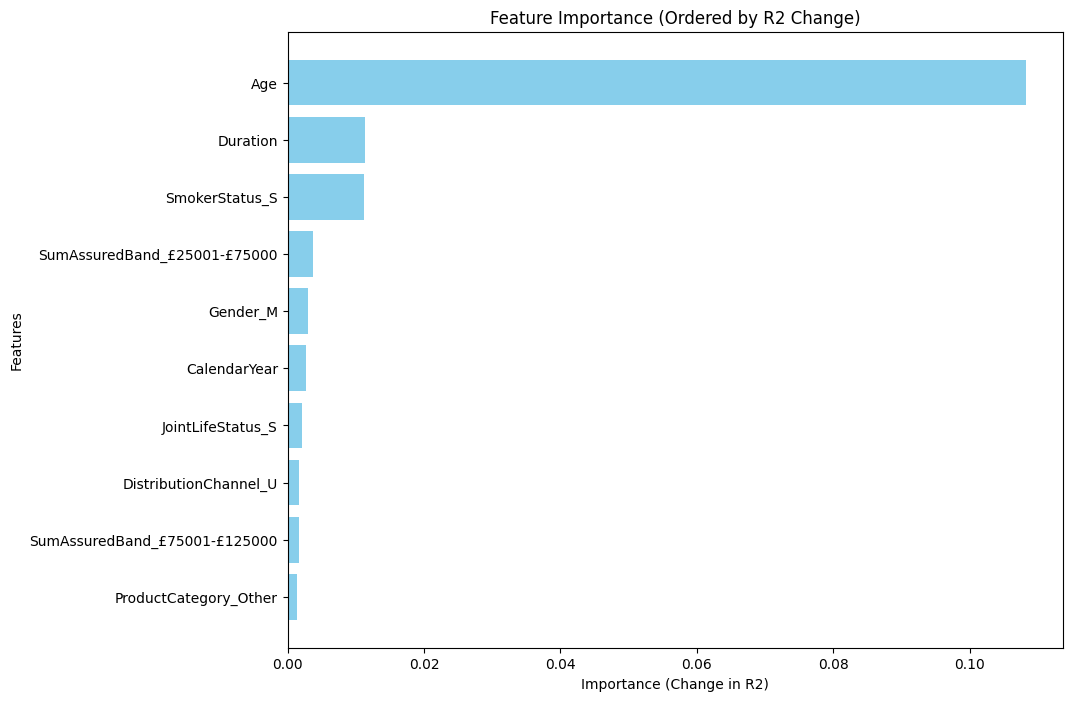

In [ ]:
best_trial_params ={'lr': 0.16499400906958195, 'weight_decay': 7.771609386937672e-06, 'num_epochs': 707, 'lambda_l1': 0.012188947951286626, 'age_cut': 76, 'age_power': 2.5300139707482083, 'age_multiplier': 1, 'duration_power': -0.7700043460802583, 'duration_multiplier': 1, 'saturated_r2': 0.2776065468788147}
# Evaluate feature importance using the best parameters
# Some features eliminated from model to make the process faster, they are expected to be of low importance in the model
def evaluate_feature_importance(df, features, best_trial_params):
    feature_importances = {}

    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2" or feature == "Dur2":
            continue

        df_copy = df.copy()

        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = df_copy[feature].mode()[0]
                    else:
                        df_copy[gf] = 1 - df_copy[feature].mode()[0]
                break

        if not group_found:
            if feature not in ("Age", "Duration", "CalendarYear"):
                df_copy[feature] = df_copy[feature].mode()[0]
            else:
                df_copy[feature] = df_copy[feature].mean()

        study = optuna.create_study(direction="maximize")
        study.optimize(lambda trial: objective(trial, features, df_copy, best_trial_params), n_trials=1)
        best_trial = study.best_trial
        print(f"trial params{study.best_params}")
        current_r2 = best_trial.value
        feature_importances[feature] = best_trial_params["saturated_r2"] - current_r2

    return feature_importances

feature_importances = evaluate_feature_importance(df.sample(frac=0.5, random_state=1), features, best_trial_params)

sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

In [63]:
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    "DistributionChannel_N",
    "DistributionChannel_S",
    # "DistributionChannel_U",
    "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    # "ProductCategory_Other",
    "ProductCategory_Term Other",
]
#features = [feature for feature in features if feature not in exclude_features]
#features=features.extend(excluded_features)
features

['Age',
 'Duration',
 'CalendarYear',
 'ProductCategory_Level',
 'ProductCategory_Other',
 'ProductCategory_Term Other',
 'Gender_M',
 'SmokerStatus_S',
 'DistributionChannel_I',
 'DistributionChannel_M',
 'DistributionChannel_N',
 'DistributionChannel_S',
 'DistributionChannel_U',
 'JointLifeStatus_S',
 'SumAssuredBand_£125001-£250000',
 'SumAssuredBand_£250001+',
 'SumAssuredBand_£25001-£75000',
 'SumAssuredBand_£75001-£125000']

[I 2025-03-11 13:23:47,959] A new study created in memory with name: no-name-d457c75c-f73e-4798-a70c-f827741e902b
[I 2025-03-11 13:54:24,915] Trial 0 finished with value: 0.20827734470367432 and parameters: {}. Best is trial 0 with value: 0.20827734470367432.
[I 2025-03-11 13:54:25,046] A new study created in memory with name: no-name-ffae42d9-10d1-4b76-8df7-1d000583114c


Mean Pseudo_R2: 0.2083
trial params{}


[I 2025-03-11 14:23:30,701] Trial 0 finished with value: 0.2642112374305725 and parameters: {}. Best is trial 0 with value: 0.2642112374305725.


Mean Pseudo_R2: 0.2642
trial params{}


[I 2025-03-11 14:23:30,974] A new study created in memory with name: no-name-f477af2a-9f75-48f3-b7bb-5e96bb17d325
[I 2025-03-11 14:46:32,096] Trial 0 finished with value: 0.27225762605667114 and parameters: {}. Best is trial 0 with value: 0.27225762605667114.
[I 2025-03-11 14:46:32,267] A new study created in memory with name: no-name-7156b7bd-68b1-4a66-b1fd-9e8f61707862


Mean Pseudo_R2: 0.2723
trial params{}


[I 2025-03-11 15:07:39,687] Trial 0 finished with value: 0.2752857208251953 and parameters: {}. Best is trial 0 with value: 0.2752857208251953.
[I 2025-03-11 15:07:39,804] A new study created in memory with name: no-name-c2e17dc5-2889-436a-a5b8-8d4f2ebc23d6


Mean Pseudo_R2: 0.2753
trial params{}


[I 2025-03-11 15:28:11,180] Trial 0 finished with value: 0.27529871463775635 and parameters: {}. Best is trial 0 with value: 0.27529871463775635.
[I 2025-03-11 15:28:11,333] A new study created in memory with name: no-name-3a606aa5-c0a5-46bc-a588-3848b5952646


Mean Pseudo_R2: 0.2753
trial params{}


[I 2025-03-11 15:55:14,930] Trial 0 finished with value: 0.273364782333374 and parameters: {}. Best is trial 0 with value: 0.273364782333374.
[I 2025-03-11 15:55:15,051] A new study created in memory with name: no-name-78229120-fae3-4ba1-b425-fade787dc417


Mean Pseudo_R2: 0.2734
trial params{}


[I 2025-03-11 16:18:41,558] Trial 0 finished with value: 0.27177900075912476 and parameters: {}. Best is trial 0 with value: 0.27177900075912476.
[I 2025-03-11 16:18:41,702] A new study created in memory with name: no-name-940574b1-47ed-49ce-a7c5-925157129e6b


Mean Pseudo_R2: 0.2718
trial params{}


[I 2025-03-11 16:43:23,508] Trial 0 finished with value: 0.2675943970680237 and parameters: {}. Best is trial 0 with value: 0.2675943970680237.


Mean Pseudo_R2: 0.2676
trial params{}


[I 2025-03-11 16:43:23,765] A new study created in memory with name: no-name-b8878869-e1e4-4a15-adb2-eb911abb6349
[I 2025-03-11 17:08:06,732] Trial 0 finished with value: 0.27478593587875366 and parameters: {}. Best is trial 0 with value: 0.27478593587875366.


Mean Pseudo_R2: 0.2748
trial params{}


[I 2025-03-11 17:08:06,933] A new study created in memory with name: no-name-1060ff9d-6131-44ba-b796-97c99aa40aa3
[I 2025-03-11 17:31:04,989] Trial 0 finished with value: 0.2754700779914856 and parameters: {}. Best is trial 0 with value: 0.2754700779914856.
[I 2025-03-11 17:31:05,133] A new study created in memory with name: no-name-ed9f4f0d-c246-45d1-8977-a04277ce1eee


Mean Pseudo_R2: 0.2755
trial params{}


[I 2025-03-11 17:52:58,928] Trial 0 finished with value: 0.2763872742652893 and parameters: {}. Best is trial 0 with value: 0.2763872742652893.


Mean Pseudo_R2: 0.2764
trial params{}


[I 2025-03-11 17:52:59,157] A new study created in memory with name: no-name-0df7f457-dfe1-4fc2-8e70-67716743e0d6
[I 2025-03-11 18:14:35,159] Trial 0 finished with value: 0.27477210760116577 and parameters: {}. Best is trial 0 with value: 0.27477210760116577.


Mean Pseudo_R2: 0.2748
trial params{}


[I 2025-03-11 18:14:35,353] A new study created in memory with name: no-name-18b359c2-c7a3-4ac7-beb6-977b0f580ad7
[I 2025-03-11 18:39:01,610] Trial 0 finished with value: 0.2756900191307068 and parameters: {}. Best is trial 0 with value: 0.2756900191307068.


Mean Pseudo_R2: 0.2757
trial params{}


[I 2025-03-11 18:39:01,797] A new study created in memory with name: no-name-29921c0c-3a82-4321-a1f5-daeac0f3f391
[I 2025-03-11 19:38:33,214] Trial 0 finished with value: 0.2720373272895813 and parameters: {}. Best is trial 0 with value: 0.2720373272895813.


Mean Pseudo_R2: 0.2720
trial params{}


[I 2025-03-11 19:38:33,381] A new study created in memory with name: no-name-8ad16b6c-1413-4e04-9599-bed8f0d3f47c
[I 2025-03-11 20:02:03,235] Trial 0 finished with value: 0.27255314588546753 and parameters: {}. Best is trial 0 with value: 0.27255314588546753.


Mean Pseudo_R2: 0.2726
trial params{}


[I 2025-03-11 20:02:03,441] A new study created in memory with name: no-name-64566995-e61f-4b9e-b598-1f4474cb0bbd
[I 2025-03-11 20:25:24,870] Trial 0 finished with value: 0.27273958921432495 and parameters: {}. Best is trial 0 with value: 0.27273958921432495.
[I 2025-03-11 20:25:25,013] A new study created in memory with name: no-name-76e5075d-cf68-44ac-ade8-262d93aed6e6


Mean Pseudo_R2: 0.2727
trial params{}


[I 2025-03-11 20:46:22,185] Trial 0 finished with value: 0.27156198024749756 and parameters: {}. Best is trial 0 with value: 0.27156198024749756.
[I 2025-03-11 20:46:22,340] A new study created in memory with name: no-name-96fa9598-ad69-485d-8df5-96a941b029a9


Mean Pseudo_R2: 0.2716
trial params{}


[I 2025-03-11 21:05:01,746] Trial 0 finished with value: 0.2724434733390808 and parameters: {}. Best is trial 0 with value: 0.2724434733390808.


Mean Pseudo_R2: 0.2724
trial params{}


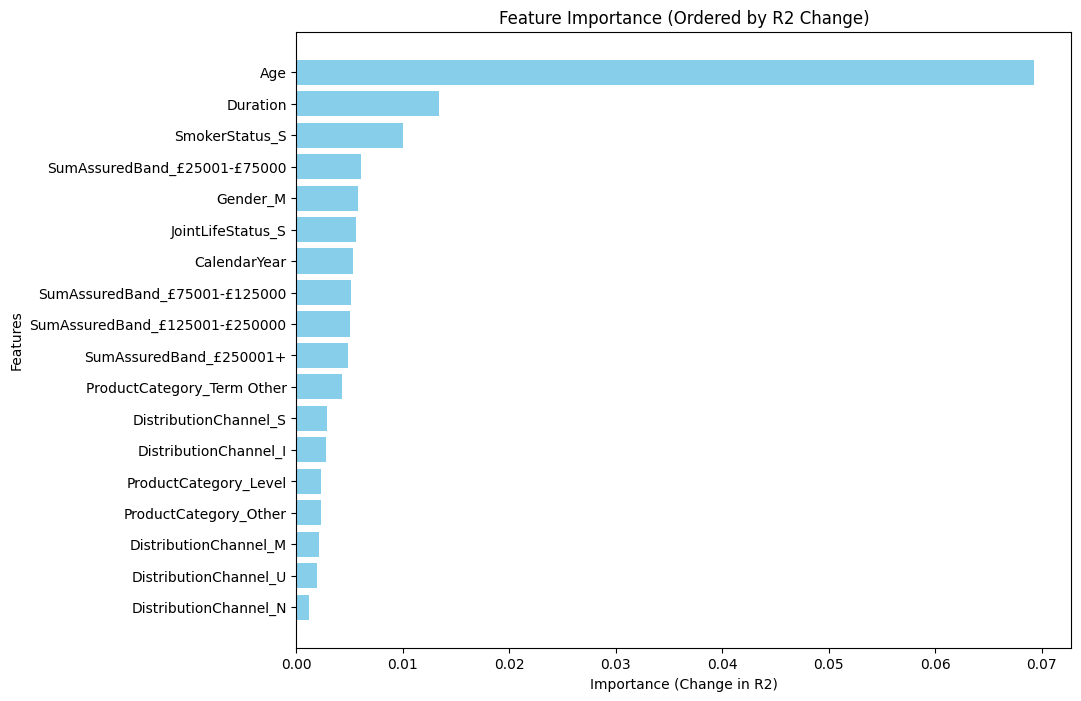

In [113]:
best_trial_params ={'lr': 0.16499400906958195, 'weight_decay': 7.771609386937672e-06, 'num_epochs': 707, 'lambda_l1': 0.012188947951286626, 'age_cut': 76, 'age_power': 2.5300139707482083, 'age_multiplier': 1, 'duration_power': -0.7700043460802583, 'duration_multiplier': 1, 'saturated_r2': 0.2776065468788147}
# Evaluate feature importance using the best parameters
def evaluate_feature_importance(df, features, best_trial_params):
    feature_importances = {}

    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2" or feature == "Dur2":
            continue

        df_copy = df.copy()

        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = df_copy[feature].mode()[0]
                    else:
                        df_copy[gf] = 1 - df_copy[feature].mode()[0]
                break

        if not group_found:
            if feature not in ("Age", "Duration", "CalendarYear"):
                df_copy[feature] = df_copy[feature].mode()[0]
            else:
                df_copy[feature] = df_copy[feature].mean()

        study = optuna.create_study(direction="maximize")
        study.optimize(lambda trial: objective(trial, features, df_copy, best_trial_params), n_trials=1)
        best_trial = study.best_trial
        print(f"trial params{study.best_params}")
        current_r2 = best_trial.value
        feature_importances[feature] = best_trial_params["saturated_r2"] - current_r2

    return feature_importances

feature_importances = evaluate_feature_importance(df.sample(frac=0.5, random_state=1), features, best_trial_params)

sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

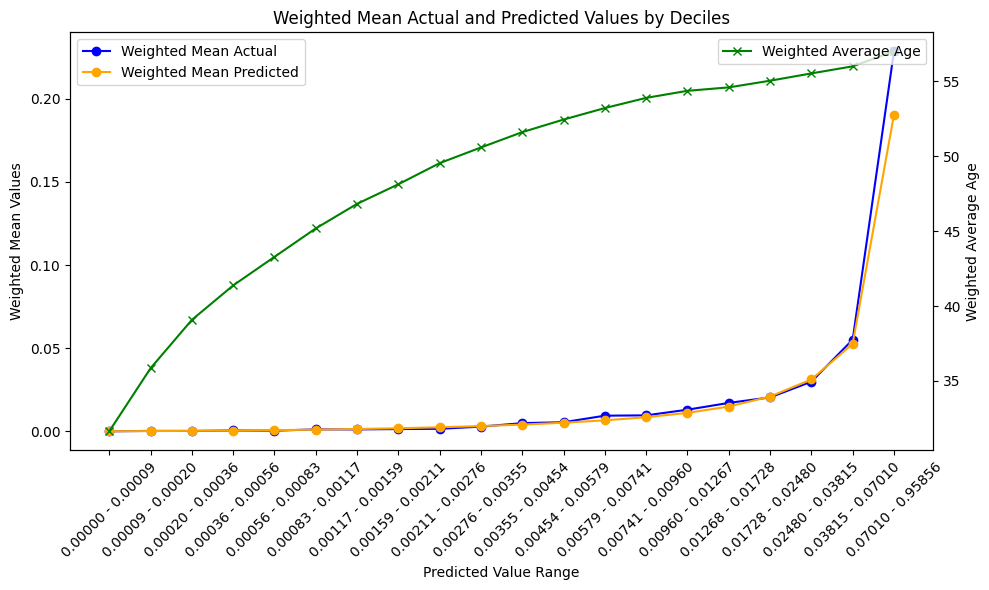

In [64]:
ages_original = age_test_tensor.numpy().flatten()
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 10)
weights2 = lives_exposure_test_tensor.numpy().flatten()

df_lift = pd.DataFrame(
    {
        "actual": actual,
        "predicted": predicted,
        "weights": weights2,
        "Age": ages_original,
    }
)
df_lift = df_lift.sort_values(by="predicted", ascending=False)


df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "weighted_age": np.average(group["Age"]),  # , weights=group["weights"]),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
ax1.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
ax1.set_xlabel("Predicted Value Range")
ax1.set_ylabel("Weighted Mean Values")
ax1.set_title("Weighted Mean Actual and Predicted Values by Deciles")
ax1.set_xticks(ticks=range(20))
ax1.set_xticklabels(decile_summary["range"], rotation=45)
ax1.legend(loc="upper left")

# Create a secondary y-axis to plot the weighted average age
ax2 = ax1.twinx()
ax2.plot(
    decile_summary["weighted_age"],
    label="Weighted Average Age",
    color="green",
    marker="x",
)
ax2.set_ylabel("Weighted Average Age")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

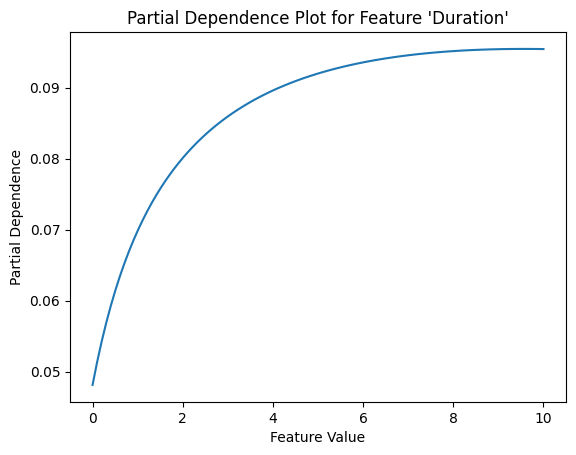

In [121]:
feature_index = X_train.columns.get_loc("Duration")
feature_index2 = X_train.columns.get_loc("Dur2")
grid_values = np.linspace(
    X_train.iloc[:, feature_index].min(), X_train.iloc[:, feature_index].max(), 100
)

partial_dependence = []
for val in grid_values:
    X_temp = X_train.copy()
    X_temp.iloc[:, feature_index] = val
    X_temp.iloc[:, feature_index2] = (
        duration_multiplier * np.maximum(val + 1 , 0) ** duration_power
    )
    X_temp_scaled = scaler.transform(X_temp)

    model.eval()
    with torch.no_grad():
        poisson_outputs, zero_inflation_outputs = model(
            torch.tensor(X_temp_scaled, dtype=torch.float32),
            lives_exposure_train_tensor,
        )
        y_pred_poisson = poisson_outputs.numpy().flatten()
        y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()
        y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

        weights = lives_exposure_train_tensor.numpy().flatten()
        weighted_avg = sum(y_pred * weights) / sum(weights)
        partial_dependence.append(weighted_avg.item())

# Plot the partial dependence
plt.plot(grid_values, partial_dependence)
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title(f"Partial Dependence Plot for Feature '{X_train.columns[feature_index]}'")
plt.show()

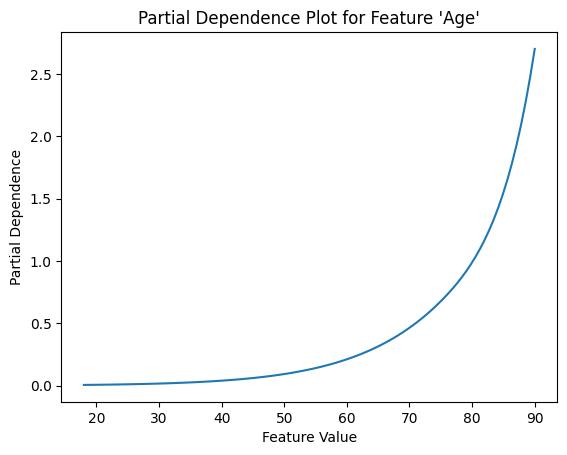

In [95]:
feature_index = X_train.columns.get_loc("Age")
feature_index2 = X_train.columns.get_loc("Age2")
grid_values = np.linspace(
    X_train.iloc[:, feature_index].min(), X_train.iloc[:, feature_index].max(), 100
)

partial_dependence = []
for val in grid_values:
    X_temp = X_train.copy()
    X_temp.iloc[:, feature_index] = val
    X_temp.iloc[:, feature_index2] = (
        age_multiplier * np.maximum(val - age_cut, 0) ** age_power
    )
    X_temp_scaled = scaler.transform(X_temp)

    model.eval()
    with torch.no_grad():
        poisson_outputs, zero_inflation_outputs = model(
            torch.tensor(X_temp_scaled, dtype=torch.float32),
            lives_exposure_train_tensor,
        )
        y_pred_poisson = poisson_outputs.numpy().flatten()
        y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()
        y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

        weights = lives_exposure_train_tensor.numpy().flatten()
        weighted_avg = sum(y_pred * weights) / sum(weights)
        partial_dependence.append(weighted_avg.item())


# Plot the partial dependence
plt.plot(grid_values, partial_dependence)
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot for Feature 'Age'")
plt.show()

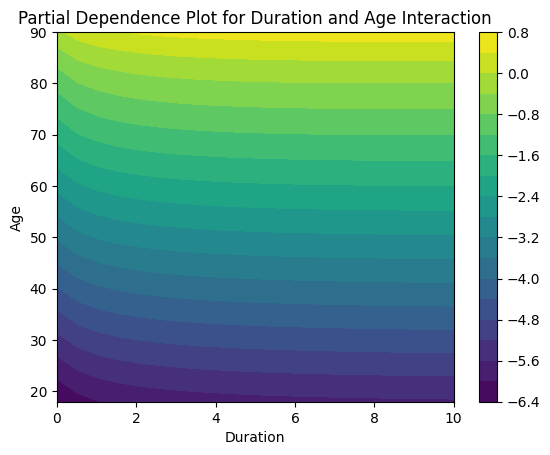

In [122]:
feature_index_duration = X_train.columns.get_loc("Duration")
feature_index_duration2 = X_train.columns.get_loc("Dur2")
feature_index_age = X_train.columns.get_loc("Age")
feature_index_age2 = X_train.columns.get_loc("Age2")

# Create a grid of values for Duration and Age
grid_values_duration = np.linspace(
    X_train.iloc[:, feature_index_duration].min(),
    X_train.iloc[:, feature_index_duration].max(),
    20,
)
grid_values_age = np.linspace(
    X_train.iloc[:, feature_index_age].min(),
    X_train.iloc[:, feature_index_age].max(),
    20,
)

# Initialize an array to store partial dependence values
partial_dependence = np.zeros((len(grid_values_duration), len(grid_values_age)))

# Compute partial dependence values
for i, val_duration in enumerate(grid_values_duration):
    for j, val_age in enumerate(grid_values_age):
        X_temp = X_train.copy()
        X_temp.iloc[:, feature_index_duration] = val_duration
        X_temp.iloc[:, feature_index_age] = val_age
        X_temp.iloc[:, feature_index_age2] = age_multiplier * (
            np.maximum(val_age - age_cut, 0) ** age_power
        )
        X_temp.iloc[:, feature_index_duration2] = duration_multiplier * (
            np.maximum(val_duration+1, 0) ** duration_power
        )
        X_temp_scaled = scaler.transform(X_temp)

        model.eval()
        with torch.no_grad():
            poisson_outputs, zero_inflation_outputs = model(
                torch.tensor(X_temp_scaled, dtype=torch.float32),
                lives_exposure_train_tensor,
            )
            y_pred_poisson = poisson_outputs.numpy().flatten()
            y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()
            y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

            # y_pred_rate = y_pred / lives_exposure_train_tensor.numpy().flatten()
            weights = lives_exposure_train_tensor.numpy().flatten()
            weighted_avg = np.sum(np.log(y_pred + 1e-6) * weights) / np.sum(weights)
            partial_dependence[i, j] = weighted_avg

# Plot the partial dependence
X, Y = np.meshgrid(grid_values_duration, grid_values_age)
plt.contourf(X, Y, partial_dependence.T, levels=20, cmap="viridis")
plt.colorbar()
plt.xlabel("Duration")
plt.ylabel("Age")
plt.title("Partial Dependence Plot for Duration and Age Interaction")
plt.show()

##### Model with intreaction layer and intialisig the ZIP model weights with the poisson model 

####train with earlier best parameters

In [47]:
class InteractionLayer(nn.Module):
    def __init__(self, age_idx, feature_indices, additional_interactions):
        super(InteractionLayer, self).__init__()
        self.age_idx = age_idx
        self.feature_indices = feature_indices
        self.additional_interactions = additional_interactions

    def forward(self, x):
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []

        # Original interactions with Age
        for idx in self.feature_indices:
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)

        # Additional specified interactions
        for idx1, idx2 in self.additional_interactions:
            interaction_term = x[:, idx1].unsqueeze(1) * x[:, idx2].unsqueeze(1)
            interaction_terms.append(interaction_term)

        interaction_terms_combined = torch.cat(interaction_terms, dim=1)
        return interaction_terms_combined


class Poisson_Net(nn.Module):
    def __init__(self, age_idx, feature_indices, additional_interactions):
        super(Poisson_Net, self).__init__()

        # Define the interaction layer
        self.interaction_layer = InteractionLayer(
            age_idx, feature_indices, additional_interactions
        )

        # Define the fully connected layers
        interaction_input_size = len(feature_indices) + len(additional_interactions)
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

    def forward(self, x, exposure):
        # Create interaction terms using the interaction layer
        interaction_terms = self.interaction_layer(x)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the Poisson part
        poisson_output = torch.exp(offset_output)

        return poisson_output


class Mort_Net_ZIP(nn.Module):
    def __init__(self):
        super(Mort_Net_ZIP, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.feature_indices = [
            X_train_scaled.columns.get_loc(col)
            for col in X_train_scaled.columns
            if col.startswith("Duration")
            or col.startswith("SmokerStatus")
            or col.startswith("ProductCategory")
            or col.startswith("SumAssuredBand")
            or col.startswith("DistributionChannel")
        ]

        # Additional interactions for all columns starting with SumAssuredBand and ProductCategory
        sum_assured_band_indices = [
            X_train_scaled.columns.get_loc(col)
            for col in X_train_scaled.columns
            if col.startswith("SumAssuredBand")
        ]
        product_category_indices = [
            X_train_scaled.columns.get_loc(col)
            for col in X_train_scaled.columns
            if col.startswith("ProductCategory")
        ]
        self.additional_interactions = [
            (
                X_train_scaled.columns.get_loc("Gender_M"),
                X_train_scaled.columns.get_loc("SmokerStatus_S"),
            )
        ] + [
            (X_train_scaled.columns.get_loc("SmokerStatus_S"), idx)
            for idx in sum_assured_band_indices + product_category_indices
        ]

        # Define the interaction layer
        self.interaction_layer = InteractionLayer(
            self.age_idx, self.feature_indices, self.additional_interactions
        )

        # Define the fully connected layers
        interaction_input_size = len(self.feature_indices) + len(
            self.additional_interactions
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

        # Additional layer for zero inflation
        self.fc_zero_inflation = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )

    def forward(self, x, exposure):
        # Create interaction terms using the interaction layer
        interaction_terms = self.interaction_layer(x)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the Poisson part
        poisson_output = torch.exp(offset_output)

        # Zero inflation part
        zero_inflation_output = torch.sigmoid(self.fc_zero_inflation(x_combined))

        return poisson_output, zero_inflation_output


# Initialize the full model
model = Mort_Net_ZIP()

# Initialize the Poisson model with the same parameters as Mort_Net_ZIP
poisson_model = Poisson_Net(
    age_idx=model.age_idx,
    feature_indices=model.feature_indices,
    additional_interactions=model.additional_interactions,
)
optimizer_poisson = optim.Adam(
    poisson_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(int(num_epochs / 100.25)):  # Train for a few of the total epochs
    optimizer_poisson.zero_grad()
    poisson_outputs = poisson_model(X_train_tensor, lives_exposure_train_tensor)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    total_loss = poisson_loss + l1_loss(poisson_model, lambda_l1=lambda_l1)
    total_loss.backward()
    optimizer_poisson.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Poisson Loss: {total_loss.item()}")

# Copy weights from the trained Poisson model to the full model
model.fc2.weight.data = poisson_model.fc2.weight.data.clone()
model.fc2.bias.data = poisson_model.fc2.bias.data.clone()

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


def joint_loss(poisson_output, zero_inflation_output, y_true, exposure):
    poisson_loss = weighted_poisson_loss(poisson_output, y_true, exposure)
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_output, (y_true == 0).float(), exposure
    )

    # Transform Poisson outputs to uniform marginals using Poisson CDF
    uniform_poisson = poisson.cdf(
        poisson_output.detach().numpy(), mu=poisson_output.detach().numpy()
    )

    # Transform Bernoulli outputs to uniform marginals using Bernoulli CDF
    uniform_bernoulli = bernoulli.cdf(
        zero_inflation_output.detach().numpy(),
        p=zero_inflation_output.detach().numpy(),
    )
    uniform_poisson = np.clip(uniform_poisson, 1e-6, 1 - 1e-6)
    uniform_bernoulli = np.clip(uniform_bernoulli, 1e-6, 1 - 1e-6)
    # Create a two-dimensional dataset for copula fitting
    copula_data = np.column_stack(
        (uniform_poisson.flatten(), uniform_bernoulli.flatten())
    )

    # Fit the Frank copula to the data
    frank_copula = Frank()
    frank_copula.fit(copula_data)

    pdf_values = frank_copula.probability_density(copula_data)

    loss_ll = poisson_loss + bernoulli_loss
    n_log_likelihood_copula_weighted = -np.sum(
        np.log(pdf_values) * exposure.detach().numpy().flatten()
    ) / np.sum(exposure.detach().numpy().flatten())

    return loss_ll + n_log_likelihood_copula_weighted


for epoch in range(
    int(num_epochs / 100.25), num_epochs
):  # Continue training for the remaining epochs
    optimizer.zero_grad()
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_train_tensor,
        lives_exposure_train_tensor,
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(
            f"Epoch {epoch+1}, Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}"
        )

Epoch 20, Joint Loss: 20.84619140625, Total Loss: 21.223108291625977
Epoch 40, Joint Loss: 9.623069763183594, Total Loss: 10.016679763793945
Epoch 60, Joint Loss: 8.232598304748535, Total Loss: 8.5477933883667
Epoch 80, Joint Loss: 7.875258445739746, Total Loss: 8.179131507873535
Epoch 100, Joint Loss: 7.6697998046875, Total Loss: 7.96024751663208
Epoch 120, Joint Loss: 7.503315448760986, Total Loss: 7.783300399780273
Epoch 140, Joint Loss: 7.381216526031494, Total Loss: 7.651939868927002
Epoch 160, Joint Loss: 7.268874168395996, Total Loss: 7.531623363494873
Epoch 180, Joint Loss: 7.179858207702637, Total Loss: 7.435255527496338
Epoch 200, Joint Loss: 7.103384971618652, Total Loss: 7.351717472076416
Epoch 220, Joint Loss: 7.036045074462891, Total Loss: 7.277445316314697
Epoch 240, Joint Loss: 6.979290962219238, Total Loss: 7.215268135070801
Epoch 260, Joint Loss: 6.920232772827148, Total Loss: 7.151468753814697
Epoch 280, Joint Loss: 6.871844291687012, Total Loss: 7.098451614379883
Ep

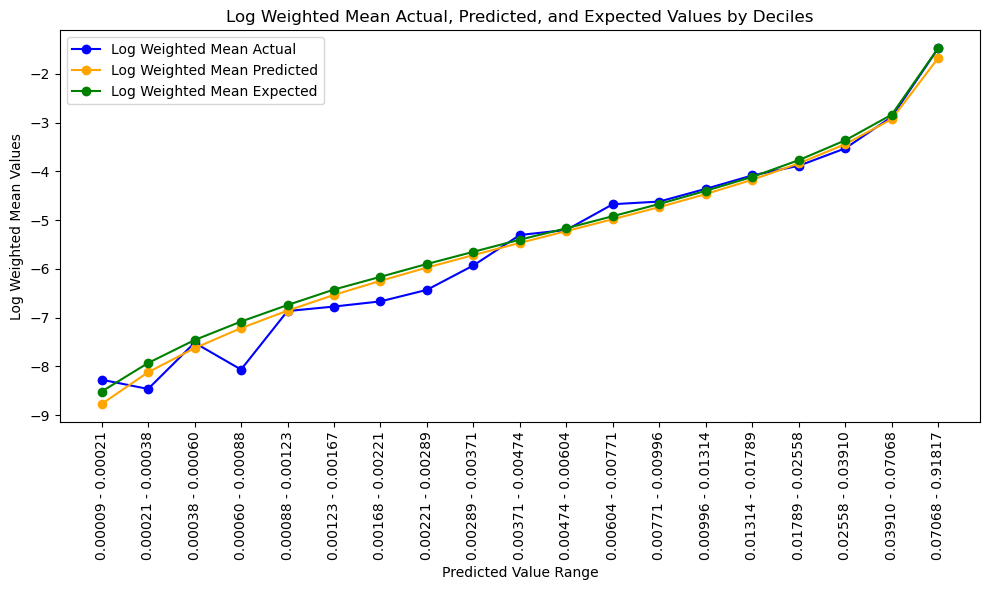

poisson deviance: 25698.22762118056  psuedo R2 =0.3403611220332633
fc2.weight: tensor([[ 1.2196e+00, -7.7198e-04,  1.8087e-03, -2.4027e-04, -2.3560e-04,
         -1.0424e-04,  1.0672e-01,  3.9489e-01, -2.0319e-02, -2.6334e-04,
         -3.1292e-04,  3.2576e-04,  3.4324e-04,  9.4922e-03, -4.2036e-02,
         -8.6441e-02, -7.7216e-04, -1.6115e-02,  2.5091e-04, -2.2227e-01,
         -8.3311e-05, -1.5109e-04,  2.6565e-04, -3.5480e-04,  1.3871e-03,
          1.3428e-02,  1.2328e-04, -6.4720e-04, -2.8185e-03,  2.5998e-04,
         -2.6071e-03, -1.6221e-02, -8.9526e-03, -1.9616e-02,  1.8666e-04,
         -1.6380e-04,  6.7862e-05,  9.7149e-04,  2.6940e-03,  5.1134e-04,
         -9.1314e-05,  1.2363e-03]])
fc2.bias: tensor([-6.8040])
fc_zero_inflation.weight: tensor([[ 0.6202,  0.2499,  0.0146,  0.2358, -0.2721, -0.1103,  0.1500, -0.2011,
          0.5994,  0.0150, -0.0521,  0.0541, -0.1081,  0.0229, -0.0026, -0.1506,
         -0.0056,  0.0016, -0.0166,  0.0155, -0.0315,  0.0653, -0.0459, -0.0

In [48]:
model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    y_pred_poisson = poisson_outputs.numpy().flatten()
    y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()

# Combine the Poisson and Bernoulli outputs to get the final predictions
y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

# Flatten the actual values and weights
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()
actual = actual + 1e-25  # Avoid log(0) issues

# Add ExpectedClaims from test_df if available
expected_claims = test_df["ExpectedClaims"].values.flatten() if "ExpectedClaims" in test_df.columns else np.zeros_like(actual)

# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({
    "actual": actual,
    "predicted": predicted,
    "expected": expected_claims,
    "weights": weights
})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = X_test_scaled["Age"]

# Create deciles (20 groups)
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)

def weighted_mean(group):
    return pd.Series({
        "weighted_actual": np.average(group["actual"], weights=group["weights"]),
        "weighted_predicted": np.average(group["predicted"], weights=group["weights"]),
        "weighted_expected": np.average(group["expected"], weights=group["weights"]),
        "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
    })

# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)
decile_summary = decile_summary.iloc[1:].reset_index(drop=True)

# Take log of actual, predicted, and expected values
decile_summary["log_weighted_actual"] = np.log(decile_summary["weighted_actual"])
decile_summary["log_weighted_predicted"] = np.log(decile_summary["weighted_predicted"])
decile_summary["log_weighted_expected"] = np.log(decile_summary["weighted_expected"])

# Plot the weighted mean actual, predicted, and expected values for each decile
plt.figure(figsize=(10, 6))
plt.plot(decile_summary["log_weighted_actual"], label="Log Weighted Mean Actual", color="blue", marker="o")
plt.plot(decile_summary["log_weighted_predicted"], label="Log Weighted Mean Predicted", color="orange", marker="o")
plt.plot(decile_summary["log_weighted_expected"], label="Log Weighted Mean Expected", color="green", marker="o")
plt.xlabel("Predicted Value Range")
plt.ylabel("Log Weighted Mean Values")
plt.title("Log Weighted Mean Actual, Predicted, and Expected Values by Deciles")
plt.xticks(ticks=range(19), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Deviance and pseudo R2
mean_target = np.mean(actual)
null_deviance = 2 * sum(actual * np.log(actual / mean_target) - (actual - mean_target))
model_deviance = 2 * sum(actual * np.log(actual / y_pred) - (actual - y_pred))
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)

weights = model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")

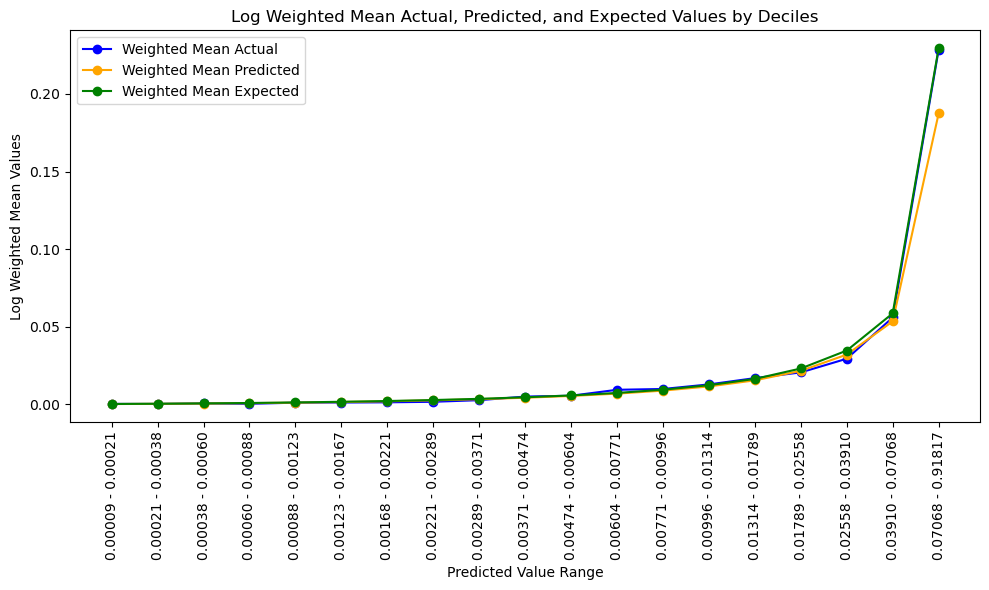

In [49]:
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()

# Add ExpectedClaims from test_df if available
expected_claims = test_df["ExpectedClaims"].values.flatten() if "ExpectedClaims" in test_df.columns else np.zeros_like(actual)

# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({
    "actual": actual,
    "predicted": predicted,
    "expected": expected_claims,
    "weights": weights
})
df_lift = df_lift.sort_values(by="predicted", ascending=False)

# Create deciles (20 groups)
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)

def weighted_mean(group):
    return pd.Series({
        "weighted_actual": np.average(group["actual"], weights=group["weights"]),
        "weighted_predicted": np.average(group["predicted"], weights=group["weights"]),
        "weighted_expected": np.average(group["expected"], weights=group["weights"]),
        "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
    })

# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)
decile_summary = decile_summary.iloc[1:].reset_index(drop=True)

# Take log of actual, predicted, and expected values
#decile_summary["log_weighted_actual"] = np.log(decile_summary["weighted_actual"])
#decile_summary["log_weighted_predicted"] = np.log(decile_summary["weighted_predicted"])
#decile_summary["log_weighted_expected"] = np.log(decile_summary["weighted_expected"])

# Plot the weighted mean actual, predicted, and expected values for each decile
plt.figure(figsize=(10, 6))
plt.plot(decile_summary["weighted_actual"], label="Weighted Mean Actual", color="blue", marker="o")
plt.plot(decile_summary["weighted_predicted"], label="Weighted Mean Predicted", color="orange", marker="o")
plt.plot(decile_summary["weighted_expected"], label="Weighted Mean Expected", color="green", marker="o")
plt.xlabel("Predicted Value Range")
plt.ylabel("Log Weighted Mean Values")
plt.title("Log Weighted Mean Actual, Predicted, and Expected Values by Deciles")
plt.xticks(ticks=range(19), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

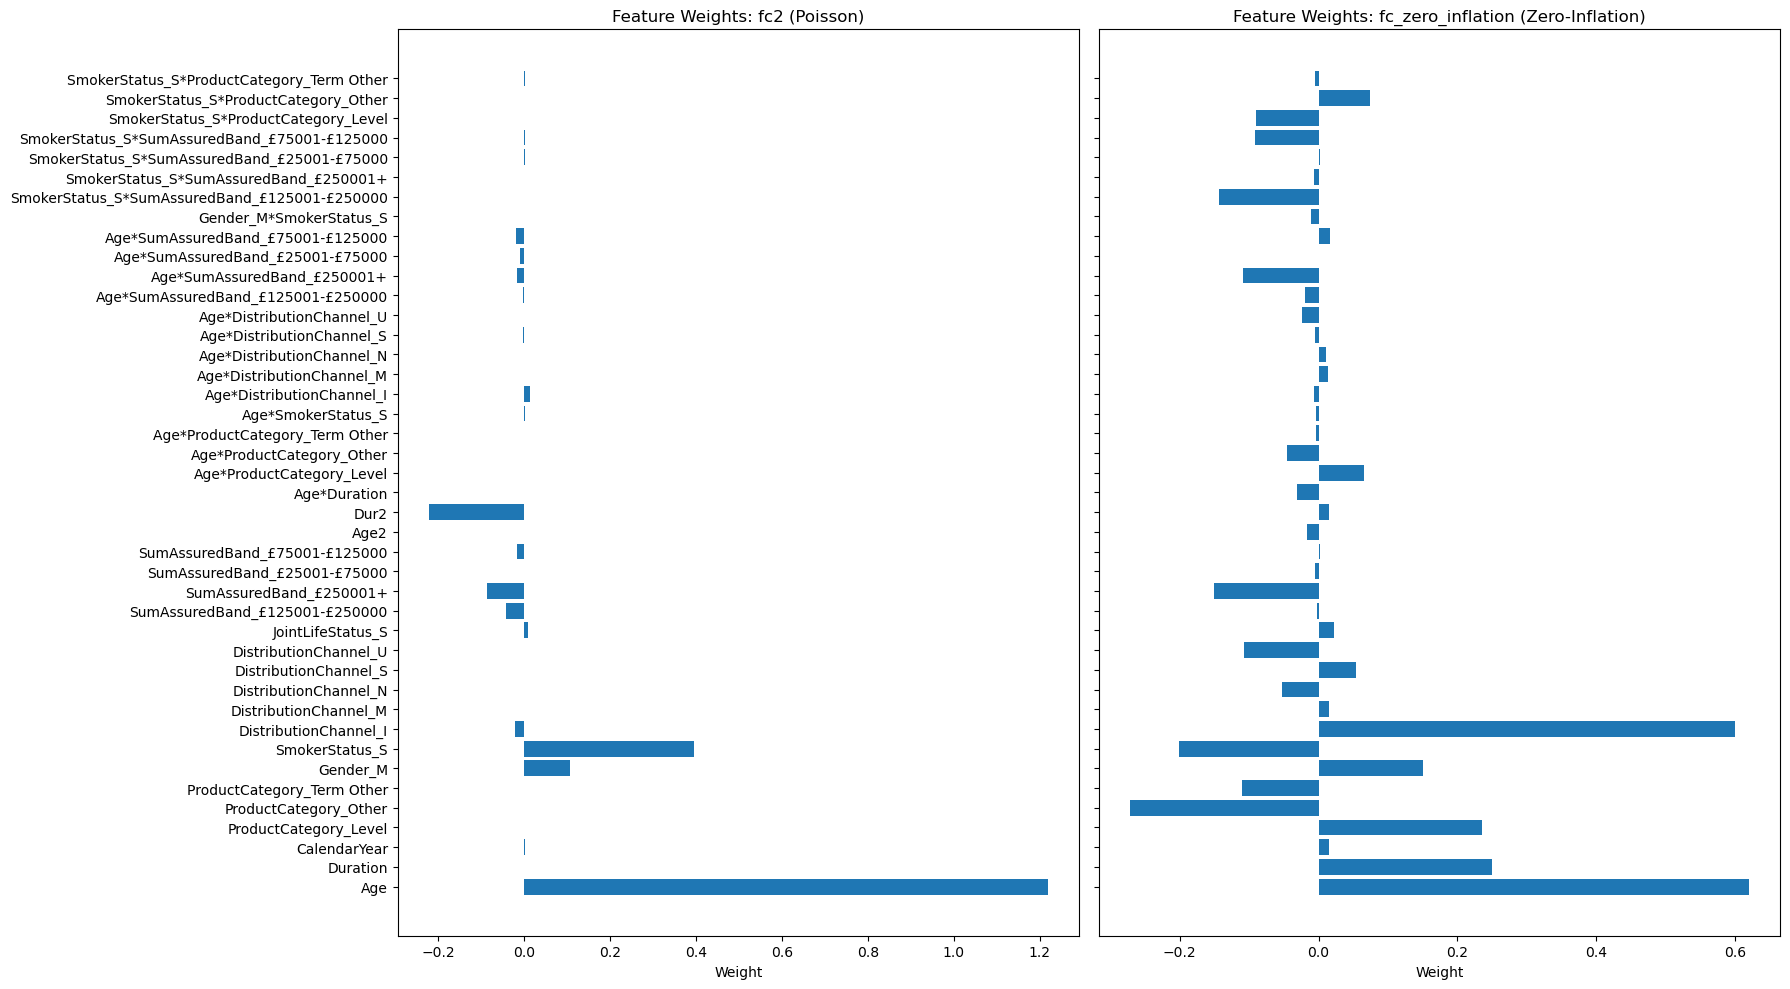

In [50]:
feature_names = list(X_train_scaled.columns)
interaction_names = []

# Use model.feature_indices and model.additional_interactions for interaction terms
if hasattr(model, "feature_indices"):
    for idx in model.feature_indices:
        interaction_names.append(f"Age*{X_train_scaled.columns[idx]}")
if hasattr(model, "additional_interactions"):
    for idx1, idx2 in model.additional_interactions:
        interaction_names.append(f"{X_train_scaled.columns[idx1]}*{X_train_scaled.columns[idx2]}")

feature_names += interaction_names

weights_dict = model.state_dict()
fc2_weights = weights_dict["fc2.weight"].detach().cpu().numpy().flatten()
fc_zero_weights = weights_dict["fc_zero_inflation.weight"].detach().cpu().numpy().flatten()

fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

axes[0].barh(feature_names, fc2_weights)
axes[0].set_xlabel("Weight")
axes[0].set_title("Feature Weights: fc2 (Poisson)")

axes[1].barh(feature_names, fc_zero_weights)
axes[1].set_xlabel("Weight")
axes[1].set_title("Feature Weights: fc_zero_inflation (Zero-Inflation)")

plt.tight_layout()
plt.show()

In [54]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def objective(trial, features, df, best_trial_params=None):
    if best_trial_params is None:
        lr = trial.suggest_float("lr", 9e-2, 3e-1, log=True) # max 0.3 instead of 0.2 mon from 0.001 to .09 on 22nd March 2025
        weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
        num_epochs = trial.suggest_int("num_epochs", 400, 1200)  # min changed to 400 from 5 on 22nd March 2025
        lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-1, log=True)
        age_cut = trial.suggest_int("age_cut", 20, 90)
        age_power = trial.suggest_float("age_power", 1.1, 5)
        age_multiplier = trial.suggest_int("age_multiplier", 0, 1)
        duration_power = trial.suggest_float("duration_power", -1, 3)
        duration_multiplier = trial.suggest_int("duration_multiplier", 0, 1)
    else:
        lr = best_trial_params["lr"]
        weight_decay = best_trial_params["weight_decay"]
        num_epochs = best_trial_params["num_epochs"]
        lambda_l1 = best_trial_params["lambda_l1"]
        age_cut = best_trial_params["age_cut"]
        age_power = best_trial_params["age_power"]
        age_multiplier = best_trial_params["age_multiplier"]
        duration_power = best_trial_params["duration_power"]
        duration_multiplier = best_trial_params["duration_multiplier"]

    pseudo_r2_scores = []

    for fold in range(1, 2):
        df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
        df["Dur2"] = duration_multiplier * np.maximum(df["Duration"] + 1, 0) ** duration_power
        df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)
        train_df = df[df["holdout"] == 0]
        test_df = df[~(df["holdout"] == 0)]

        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]

        if "Age2" not in features:
            features.append("Age2")
        if "Dur2" not in features:
            features.append("Dur2")

        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        # Convert data to tensors and move to GPU
        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32).to(device)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32).to(device)
        y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32).to(device)
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32).to(device)
        lives_exposure_train_tensor = torch.tensor(train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32).to(device)
        lives_exposure_test_tensor = torch.tensor(test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32).to(device)

        # Initialize the full model to get the indices
        zip_model = Mort_Net_ZIP().to(device)
        age_idx = zip_model.age_idx
        feature_indices = zip_model.feature_indices
        additional_interactions = zip_model.additional_interactions

        # Initialize the Poisson model with the same parameters as Mort_Net_ZIP
        poisson_model = Poisson_Net(
            age_idx=age_idx,
            feature_indices=feature_indices,
            additional_interactions=additional_interactions,
        ).to(device)

        # Define the optimizer
        optimizer_poisson = optim.Adam(poisson_model.parameters(), lr=lr, weight_decay=weight_decay)
        optimizer_zip = optim.Adam(zip_model.parameters(), lr=lr, weight_decay=weight_decay)

        # Training loop for Poisson_Net (half the total epochs)
        for epoch in range(int(num_epochs / 100.25)):
            optimizer_poisson.zero_grad()
            poisson_outputs = poisson_model(X_train_tensor, lives_exposure_train_tensor)

            # Calculate Poisson loss
            poisson_loss = weighted_poisson_loss(poisson_outputs, y_train_tensor, lives_exposure_train_tensor)
            l1_reg = l1_loss(poisson_model, lambda_l1=lambda_l1)
            total_loss = poisson_loss + l1_reg
            total_loss.backward()
            optimizer_poisson.step()

        # Copy weights from Poisson_Net to Mort_Net_ZIP
        zip_model.fc2.weight.data = poisson_model.fc2.weight.data.clone()
        zip_model.fc2.bias.data = poisson_model.fc2.bias.data.clone()

        # Training loop for Mort_Net_ZIP (remaining epochs)
        for epoch in range(int(num_epochs / 100.25), num_epochs):
            optimizer_zip.zero_grad()
            poisson_outputs, zero_inflation_outputs = zip_model(X_train_tensor, lives_exposure_train_tensor)

            # Calculate losses
            loss = joint_loss(poisson_outputs, zero_inflation_outputs, y_train_tensor, lives_exposure_train_tensor)
            l1_reg = l1_loss(zip_model, lambda_l1=lambda_l1)
            total_loss = loss + l1_reg
            total_loss.backward()
            optimizer_zip.step()

        # Evaluation for Mort_Net_ZIP
        zip_model.eval()
        with torch.no_grad():
            poisson_outputs, zero_inflation_outputs = zip_model(X_test_tensor, lives_exposure_test_tensor)
            loss = joint_loss(poisson_outputs, zero_inflation_outputs, y_test_tensor, lives_exposure_test_tensor)
            l1_reg = l1_loss(zip_model, lambda_l1=lambda_l1)
            total_loss = loss + l1_reg

            print(f"Test Poisson Loss: Joint Loss: {loss.item()}, Total Loss: {total_loss.item()}")

            y_pred = poisson_outputs * (1 - zero_inflation_outputs)
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(y_test_tensor * lives_exposure_test_tensor) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target) - (y_test_tensor - weighted_mean_target)
                )
            )
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor * (
                    y_test_tensor * torch.log(y_test_tensor / y_pred) - (y_test_tensor - y_pred)
                )
            )
            pseudo_r2 = 1 - (model_deviance / null_deviance)
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2


In [57]:

# Evaluate feature importance using the best parameters
def evaluate_feature_importance(df, features, best_trial_params):
    feature_importances = {}

    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2" or feature == "Dur2":
            continue

        df_copy = df.copy()

        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = 1
                    else:
                        df_copy[gf] = 0
                break

        if not group_found:
            if feature not in ("Age", "Duration", "CalendarYear"):
                df_copy[feature] = df_copy[feature].mode()[0]
            else:
                df_copy[feature] = df_copy[feature].mean()

        study = optuna.create_study(direction="maximize")
        study.optimize(lambda trial: objective(trial, features, df_copy, best_trial_params), n_trials=1)
        best_trial = study.best_trial
        print(f"trial params{study.best_params}")
        current_r2 = best_trial.value
        feature_importances[feature] = best_trial_params["saturated_r2"] - current_r2

    return feature_importances

[I 2025-03-13 08:29:07,175] A new study created in memory with name: no-name-13f065a3-aaef-4dea-921f-e0069c1451d8
[I 2025-03-13 09:07:06,282] Trial 0 finished with value: 0.21026664972305298 and parameters: {}. Best is trial 0 with value: 0.21026664972305298.


Test Poisson Loss: Joint Loss: 6.811543941497803, Total Loss: 7.026607990264893
Mean Pseudo_R2: 0.2103
trial params{}


[I 2025-03-13 09:07:06,439] A new study created in memory with name: no-name-8954e414-ce8a-4bb9-805e-a87d321c484e
[I 2025-03-13 10:51:27,604] Trial 0 finished with value: 0.26452386379241943 and parameters: {}. Best is trial 0 with value: 0.26452386379241943.


Test Poisson Loss: Joint Loss: 6.330478191375732, Total Loss: 6.524968147277832
Mean Pseudo_R2: 0.2645
trial params{}


[I 2025-03-13 10:51:28,776] A new study created in memory with name: no-name-5bd1258a-aa52-49de-a573-b918ae0b1752
[I 2025-03-13 11:46:21,419] Trial 0 finished with value: 0.2747427821159363 and parameters: {}. Best is trial 0 with value: 0.2747427821159363.


Test Poisson Loss: Joint Loss: 6.288150787353516, Total Loss: 6.484480381011963
Mean Pseudo_R2: 0.2747
trial params{}


[I 2025-03-13 11:46:21,793] A new study created in memory with name: no-name-61afb8a5-8953-42dc-81f9-94abb1c04bd8
[I 2025-03-13 12:47:20,098] Trial 0 finished with value: 0.2763497829437256 and parameters: {}. Best is trial 0 with value: 0.2763497829437256.


Test Poisson Loss: Joint Loss: 6.457113742828369, Total Loss: 6.648049831390381
Mean Pseudo_R2: 0.2763
trial params{}


[I 2025-03-13 12:47:20,804] A new study created in memory with name: no-name-e3ebd8c5-58ea-4eed-b80c-aa012e3edc34
[I 2025-03-13 13:27:01,517] Trial 0 finished with value: 0.27704674005508423 and parameters: {}. Best is trial 0 with value: 0.27704674005508423.
[I 2025-03-13 13:27:01,638] A new study created in memory with name: no-name-c2b59eca-ab48-4049-b913-7459f6e69983


Test Poisson Loss: Joint Loss: 6.466589450836182, Total Loss: 6.656381607055664
Mean Pseudo_R2: 0.2770
trial params{}


[I 2025-03-13 14:05:35,834] Trial 0 finished with value: 0.2767027020454407 and parameters: {}. Best is trial 0 with value: 0.2767027020454407.


Test Poisson Loss: Joint Loss: 6.457185745239258, Total Loss: 6.648813724517822
Mean Pseudo_R2: 0.2767
trial params{}


[I 2025-03-13 14:05:36,025] A new study created in memory with name: no-name-bf8b3ebf-f5c1-449f-9bd1-c57608bd6566
[I 2025-03-13 14:47:09,460] Trial 0 finished with value: 0.2736580967903137 and parameters: {}. Best is trial 0 with value: 0.2736580967903137.


Test Poisson Loss: Joint Loss: 6.295901775360107, Total Loss: 6.490275859832764
Mean Pseudo_R2: 0.2737
trial params{}


[I 2025-03-13 14:47:09,594] A new study created in memory with name: no-name-9a8baf99-a6e7-457b-95ad-9a080cdb96c8
[I 2025-03-13 15:35:31,250] Trial 0 finished with value: 0.2687733769416809 and parameters: {}. Best is trial 0 with value: 0.2687733769416809.


Test Poisson Loss: Joint Loss: 6.401015281677246, Total Loss: 6.595191478729248
Mean Pseudo_R2: 0.2688
trial params{}


[I 2025-03-13 15:35:31,512] A new study created in memory with name: no-name-c5ed22c5-5b44-4924-9d37-4f3a5f1e003a


Test Poisson Loss: Joint Loss: 6.586267471313477, Total Loss: 6.767148017883301
Mean Pseudo_R2: 0.2783


[I 2025-03-13 16:37:01,414] Trial 0 finished with value: 0.27826380729675293 and parameters: {}. Best is trial 0 with value: 0.27826380729675293.


trial params{}


[I 2025-03-13 16:37:01,862] A new study created in memory with name: no-name-bc58be75-603e-4e96-b6cd-613e05a1b790
[I 2025-03-13 17:27:09,571] Trial 0 finished with value: 0.27817845344543457 and parameters: {}. Best is trial 0 with value: 0.27817845344543457.


Test Poisson Loss: Joint Loss: 6.593379974365234, Total Loss: 6.776142597198486
Mean Pseudo_R2: 0.2782
trial params{}


[I 2025-03-13 17:27:10,017] A new study created in memory with name: no-name-c274aab9-c150-472a-9680-00b69553784b
[I 2025-03-13 19:00:09,561] Trial 0 finished with value: 0.2778335213661194 and parameters: {}. Best is trial 0 with value: 0.2778335213661194.


Test Poisson Loss: Joint Loss: 6.620211601257324, Total Loss: 6.804433345794678
Mean Pseudo_R2: 0.2778
trial params{}


[I 2025-03-13 19:00:09,781] A new study created in memory with name: no-name-50238307-39aa-45e6-b6a5-8abe28c51379
[I 2025-03-13 19:40:07,394] Trial 0 finished with value: 0.277976930141449 and parameters: {}. Best is trial 0 with value: 0.277976930141449.


Test Poisson Loss: Joint Loss: 6.597332954406738, Total Loss: 6.783178329467773
Mean Pseudo_R2: 0.2780
trial params{}


[I 2025-03-13 19:40:07,660] A new study created in memory with name: no-name-444cebf5-6945-4df5-9cb4-1af5ec1ce115
[I 2025-03-13 20:13:50,731] Trial 0 finished with value: 0.27829450368881226 and parameters: {}. Best is trial 0 with value: 0.27829450368881226.


Test Poisson Loss: Joint Loss: 6.583378314971924, Total Loss: 6.766173362731934
Mean Pseudo_R2: 0.2783
trial params{}


[I 2025-03-13 20:13:50,857] A new study created in memory with name: no-name-53dfadc4-a70b-4a1d-bd8d-c83e9594e768
[I 2025-03-13 20:45:07,285] Trial 0 finished with value: 0.2751260995864868 and parameters: {}. Best is trial 0 with value: 0.2751260995864868.
[I 2025-03-13 20:45:07,395] A new study created in memory with name: no-name-831380d0-b66d-4114-8910-68b4e6448347


Test Poisson Loss: Joint Loss: 6.284501075744629, Total Loss: 6.480743408203125
Mean Pseudo_R2: 0.2751
trial params{}


[I 2025-03-13 21:21:15,522] Trial 0 finished with value: 0.2742721438407898 and parameters: {}. Best is trial 0 with value: 0.2742721438407898.


Test Poisson Loss: Joint Loss: 6.308989524841309, Total Loss: 6.5024895668029785
Mean Pseudo_R2: 0.2743
trial params{}


[I 2025-03-13 21:21:15,753] A new study created in memory with name: no-name-c4485fe9-cc99-43ba-93f2-ef37f69956d9
[I 2025-03-13 21:57:33,991] Trial 0 finished with value: 0.27354806661605835 and parameters: {}. Best is trial 0 with value: 0.27354806661605835.


Test Poisson Loss: Joint Loss: 6.338169097900391, Total Loss: 6.5333333015441895
Mean Pseudo_R2: 0.2735
trial params{}


[I 2025-03-13 21:57:34,294] A new study created in memory with name: no-name-fdbe2135-834e-4e89-9511-2f23adcf6ff2
[I 2025-03-13 22:35:02,734] Trial 0 finished with value: 0.2734586000442505 and parameters: {}. Best is trial 0 with value: 0.2734586000442505.
[I 2025-03-13 22:35:02,861] A new study created in memory with name: no-name-841d9120-1313-4ab5-a710-60bc5f2fc983


Test Poisson Loss: Joint Loss: 6.340101718902588, Total Loss: 6.534229755401611
Mean Pseudo_R2: 0.2735
trial params{}


[I 2025-03-13 23:07:51,943] Trial 0 finished with value: 0.2735339403152466 and parameters: {}. Best is trial 0 with value: 0.2735339403152466.


Test Poisson Loss: Joint Loss: 6.312562942504883, Total Loss: 6.507741451263428
Mean Pseudo_R2: 0.2735
trial params{}


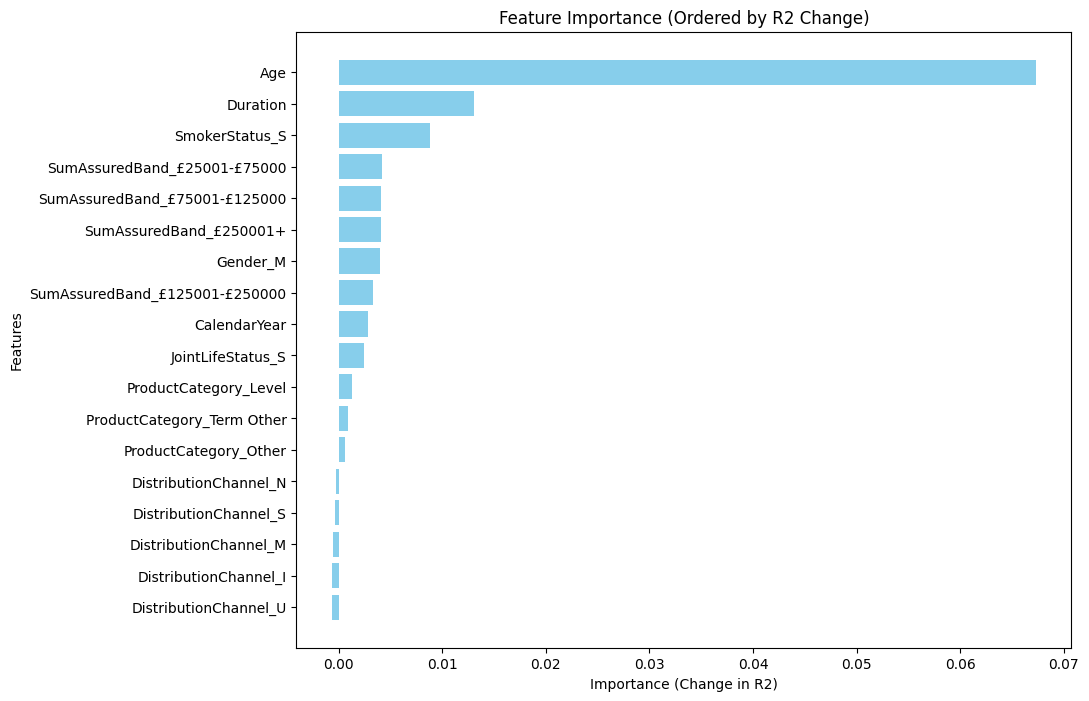

In [ ]:



feature_importances = evaluate_feature_importance(df.sample(frac=0.6, random_state=1), features, best_trial_params)

sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

In [58]:
X_train_scaled.columns

Index(['Age', 'Duration', 'CalendarYear', 'ProductCategory_Level',
       'ProductCategory_Other', 'ProductCategory_Term Other', 'Gender_M',
       'SmokerStatus_S', 'DistributionChannel_I', 'DistributionChannel_M',
       'DistributionChannel_N', 'DistributionChannel_S',
       'DistributionChannel_U', 'JointLifeStatus_S',
       'SumAssuredBand_£125001-£250000', 'SumAssuredBand_£250001+',
       'SumAssuredBand_£25001-£75000', 'SumAssuredBand_£75001-£125000', 'Age2',
       'Dur2'],
      dtype='object')

## Boosted Model approach  

In [ ]:
other_best_params = {
    "lr": 0.19900171736215422,
    "weight_decay": 0.00022790784671432597,
    "num_epochs": 1136,
    "lambda_l1": 0.09123408164648669,
    "age_cut": 59,
    "age_power": 2.9072810551013855,
    "age_multiplier": 0,
    "duration_multiplier": 1,
    "duration_power": -0.5,
    "saturated_r2": 0.2748687267303467,
}
best_trial_params= {'lr': 0.12429320100834627, 'weight_decay': 0.0009981635839948447, 'num_epochs': 1113, 'lambda_l1': 0.004462617584860143, 'age_cut': 84, 'age_power': 4.395259099626305, 'age_multiplier': 0, 'duration_power': 1.9747705114245737, 'duration_multiplier': 0, 'saturated_r2': 0.2742123007774353}
other_best_params = best_trial_params
age_cut = other_best_params["age_cut"]
age_power = other_best_params["age_power"]
weight_decay = other_best_params["weight_decay"]
num_epochs = other_best_params["num_epochs"]
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]
duration_multiplier = other_best_params["duration_multiplier"]
duration_power = other_best_params["duration_power"]

# Prepare the data
df = combined_df_encoded.copy()
exclude_features = [
    "DistributionChannel_I",
    "DistributionChannel_M",
    # "DistributionChannel_N",
    # "DistributionChannel_S",
    # "DistributionChannel_U",
    # "SumAssuredBand_£125001-£250000",
    "SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    "ProductCategory_Level",
    "ProductCategory_Other",
    # "ProductCategory_Term Other",
]
df = df.drop(columns=exclude_features1)
df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
df["Dur2"] = duration_multiplier * np.maximum(df["Duration"] + 1, 0) ** duration_power
df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)

train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]

train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]

X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
X_train_initial = X_train_scaled[
    ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
]
X_test_initial = X_test_scaled[
    ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
]

# Convert to tensors
X_train_initial_tensor = torch.tensor(X_train_initial.values, dtype=torch.float32)
X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)


# Define the ZIP model with interaction terms
class Mort_Net_ZIP(nn.Module):
    def __init__(self):
        super(Mort_Net_ZIP, self).__init__()
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_idx = X_train_scaled.columns.get_loc("Duration")
        self.calendar_year_idx = X_train_scaled.columns.get_loc("CalendarYear")
        self.gender_idx = X_train_scaled.columns.get_loc("Gender_M")
        self.dur2_idx = X_train_scaled.columns.get_loc("Dur2")

        self.fc2 = nn.Linear(
            len(X_train_initial.columns) + 2, 1
        )  # +2 for interaction terms
        self.fc_zero_inflation = nn.Linear(len(X_train_initial.columns) + 2, 1)

    def forward(self, x, exposure):
        age_feature = x[:, self.age_idx].unsqueeze(1)
        duration_feature = x[:, self.duration_idx].unsqueeze(1)
        calendar_year_feature = x[:, self.calendar_year_idx].unsqueeze(1)

        interaction_age_duration = age_feature * duration_feature
        interaction_age_calendar_year = age_feature * calendar_year_feature

        x_combined = torch.cat(
            (x, interaction_age_duration, interaction_age_calendar_year), dim=1
        )

        linear_output = self.fc2(x_combined)
        offset_output = linear_output + torch.log(exposure)
        poisson_output = torch.exp(offset_output)

        zero_inflation_output = torch.sigmoid(self.fc_zero_inflation(x_combined))

        return poisson_output, zero_inflation_output


# Initialize and train the ZIP model
initial_model = Mort_Net_ZIP()
optimizer_initial = optim.Adam(
    initial_model.parameters(), lr=lr, weight_decay=weight_decay
)


def joint_loss(poisson_output, zero_inflation_output, y_true, exposure):

    poisson_loss = weighted_poisson_loss(poisson_output, y_true, exposure)
    bernoulli_loss = weighted_bernoulli_loss(
        zero_inflation_output, (y_true == 0).float(), exposure
    )

    # Transform Poisson outputs to uniform marginals using Poisson CDF
    uniform_poisson = poisson.cdf(
        poisson_output.detach().numpy(), mu=poisson_output.detach().numpy()
    )

    # Transform Bernoulli outputs to uniform marginals using Bernoulli CDF
    uniform_bernoulli = bernoulli.cdf(
        zero_inflation_output.detach().numpy(),
        p=zero_inflation_output.detach().numpy(),
    )
    uniform_poisson = np.clip(uniform_poisson, 1e-6, 1 - 1e-6)
    uniform_bernoulli = np.clip(uniform_bernoulli, 1e-6, 1 - 1e-6)
    # Create a two-dimensional dataset for copula fitting
    copula_data = np.column_stack(
        (uniform_poisson.flatten(), uniform_bernoulli.flatten())
    )

    # Fit the Frank copula to the data
    frank_copula = Frank()
    frank_copula.fit(copula_data)

    pdf_values = frank_copula.probability_density(copula_data)

    loss_ll = poisson_loss + bernoulli_loss
    n_log_likelihood_copula_weighted = -np.sum(
        np.log(pdf_values) * exposure.detach().numpy().flatten()
    ) / np.sum(exposure.detach().numpy().flatten())

    return loss_ll + n_log_likelihood_copula_weighted


for epoch in range(num_epochs):
    optimizer_initial.zero_grad()
    poisson_outputs, zero_inflation_outputs = initial_model(
        X_train_initial_tensor, lives_exposure_train_tensor
    )
    loss = joint_loss(
        poisson_outputs,
        zero_inflation_outputs,
        y_train_tensor,
        lives_exposure_train_tensor,
    )
    loss.backward()
    optimizer_initial.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Initial Model Loss: {loss.item()}")

# Get predictions from the initial model
poisson_outputs, zero_inflation_outputs = initial_model(
    X_train_initial_tensor, lives_exposure_train_tensor
)
initial_predictions = poisson_outputs * (1 - zero_inflation_outputs)
initial_predictions = initial_predictions.detach()


# Define the second Poisson model with offset
class SecondPoissonModel(nn.Module):
    def __init__(self, input_size):
        super(SecondPoissonModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x, exposure, initial_predictions):
        linear_output = self.fc(x)
        offset_output = linear_output + torch.log(initial_predictions)
        poisson_output = torch.exp(offset_output)
        return poisson_output


# Prepare features for the second model
features_except_age_sex = [
    f
    for f in X_train_scaled.columns
    if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
]
X_train_second = X_train_scaled[features_except_age_sex]
X_test_second = X_test_scaled[features_except_age_sex]

X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

# Initialize and train the second model
second_model = SecondPoissonModel(len(X_train_second.columns))
optimizer_second = optim.Adam(
    second_model.parameters(), lr=lr, weight_decay=weight_decay
)


def weighted_poisson_loss(poisson_output, y_true, exposure):
    poisson_log_likelihood = (
        y_true * torch.log(poisson_output + 1e-25)
        - poisson_output
        - torch.lgamma(y_true + 1)
    )
    weighted_poisson_log_likelihood = poisson_log_likelihood * exposure
    neg_weighted_poisson_log_likelihood = -torch.mean(weighted_poisson_log_likelihood)
    return neg_weighted_poisson_log_likelihood


for epoch in range(num_epochs):
    optimizer_second.zero_grad()
    second_outputs = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    second_loss.backward()
    optimizer_second.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Second Model Loss: {second_loss.item()}")

# Evaluation
initial_model.eval()
second_model.eval()
with torch.no_grad():
    poisson_outputs_test, zero_inflation_outputs_test = initial_model(
        X_test_initial_tensor, lives_exposure_test_tensor
    )
    initial_predictions_test = poisson_outputs_test * (1 - zero_inflation_outputs_test)
    initial_predictions_test = initial_predictions_test.detach()
    second_outputs = second_model(
        X_test_second_tensor, lives_exposure_test_tensor, initial_predictions_test
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_test_tensor, lives_exposure_test_tensor
    )

    y_pred = second_outputs
    y_test_tensor = y_test_tensor + 1e-25
    weighted_mean_target = torch.sum(
        y_test_tensor * lives_exposure_test_tensor
    ) / torch.sum(lives_exposure_test_tensor)
    null_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (
            y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
            - (y_test_tensor - weighted_mean_target)
        )
    )
    model_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (y_test_tensor * torch.log(y_test_tensor / y_pred) - (y_test_tensor - y_pred))
    )
    pseudo_r2 = 1 - (model_deviance / null_deviance)
    print(f"Pseudo R2: {pseudo_r2.item()}")

Epoch 20, Initial Model Loss: 211.95448303222656
Epoch 40, Initial Model Loss: 76.85476684570312
Epoch 60, Initial Model Loss: 48.66559982299805
Epoch 80, Initial Model Loss: 36.69388961791992
Epoch 100, Initial Model Loss: 29.633516311645508
Epoch 120, Initial Model Loss: 24.88580322265625
Epoch 140, Initial Model Loss: 21.490432739257812
Epoch 160, Initial Model Loss: 18.968482971191406
Epoch 180, Initial Model Loss: 17.04157829284668
Epoch 200, Initial Model Loss: 15.535449028015137
Epoch 220, Initial Model Loss: 14.335193634033203
Epoch 240, Initial Model Loss: 13.363381385803223
Epoch 260, Initial Model Loss: 12.565217018127441
Epoch 280, Initial Model Loss: 11.902050971984863
Epoch 300, Initial Model Loss: 11.34521484375
Epoch 320, Initial Model Loss: 10.873544692993164
Epoch 340, Initial Model Loss: 10.470845222473145
Epoch 360, Initial Model Loss: 10.12519359588623
Epoch 380, Initial Model Loss: 9.8262357711792
Epoch 400, Initial Model Loss: 9.566256523132324
Epoch 420, Initial

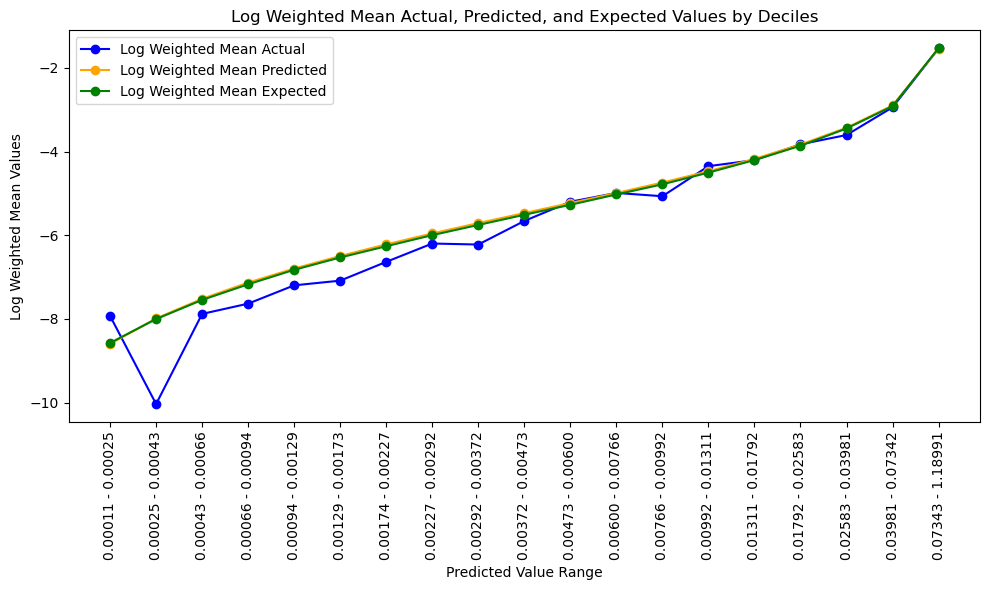

poisson deviance: 25602.502740830198  psuedo R2 =0.33909329033051594
fc2.weight: tensor([[ 1.1086e+00, -1.0396e-26,  7.9747e-02,  1.1127e-01, -2.9903e-03,
          2.6611e-27,  1.4158e-27,  1.5772e-02]])
fc2.bias: tensor([-6.8308])
fc_zero_inflation.weight: tensor([[ 7.6523e-01,  4.7647e-27,  1.2512e-01,  2.2974e-01,  1.8413e-02,
          1.4376e-26, -9.3783e-27,  7.6526e-02]])
fc_zero_inflation.bias: tensor([-2.4271])
fc.weight: tensor([[ 0.0228, -0.0243, -0.0103,  0.3585, -0.0593, -0.0327, -0.0839, -0.0379,
         -0.0284,  0.0010, -0.1546, -0.2188, -0.0768, -0.1072]])
fc.bias: tensor([0.1377])


In [56]:
initial_model.eval()
second_model.eval()
with torch.no_grad():
    second_outputs = second_model(
        X_test_second_tensor, lives_exposure_test_tensor, initial_predictions_test
    )

y_pred = second_outputs.numpy().flatten()
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()

# Add ExpectedClaims from test_df if available
expected_claims = test_df["ExpectedClaims"].values.flatten() if "ExpectedClaims" in test_df.columns else np.zeros_like(actual)

# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({
    "actual": actual,
    "predicted": predicted,
    "expected": expected_claims,
    "weights": weights
})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)

def weighted_mean(group):
    return pd.Series({
        "weighted_actual": np.average(group["actual"], weights=group["weights"]),
        "weighted_predicted": np.average(group["predicted"], weights=group["weights"]),
        "weighted_expected": np.average(group["expected"], weights=group["weights"]),
        "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
    })

# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)
decile_summary = decile_summary.iloc[1:].reset_index(drop=True)

# Take log of actual, predicted, and expected values
decile_summary["log_weighted_actual"] = np.log(decile_summary["weighted_actual"])
decile_summary["log_weighted_predicted"] = np.log(decile_summary["weighted_predicted"])
decile_summary["log_weighted_expected"] = np.log(decile_summary["weighted_expected"])

# Plot the weighted mean actual, predicted, and expected values for each decile
plt.figure(figsize=(10, 6))
plt.plot(decile_summary["log_weighted_actual"], label="Log Weighted Mean Actual", color="blue", marker="o")
plt.plot(decile_summary["log_weighted_predicted"], label="Log Weighted Mean Predicted", color="orange", marker="o")
plt.plot(decile_summary["log_weighted_expected"], label="Log Weighted Mean Expected", color="green", marker="o")
plt.xlabel("Predicted Value Range")
plt.ylabel("Log Weighted Mean Values")
plt.title("Log Weighted Mean Actual, Predicted, and Expected Values by Deciles")
plt.xticks(ticks=range(19), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

actual = actual #+ 1e-8
mean_target = np.mean(actual)
null_deviance = 2 * sum(actual * np.log(actual / mean_target) - (actual - mean_target))
model_deviance = 2 * sum(actual * np.log(actual / y_pred) - (actual - y_pred))
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)

weights = initial_model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")

weights = second_model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")

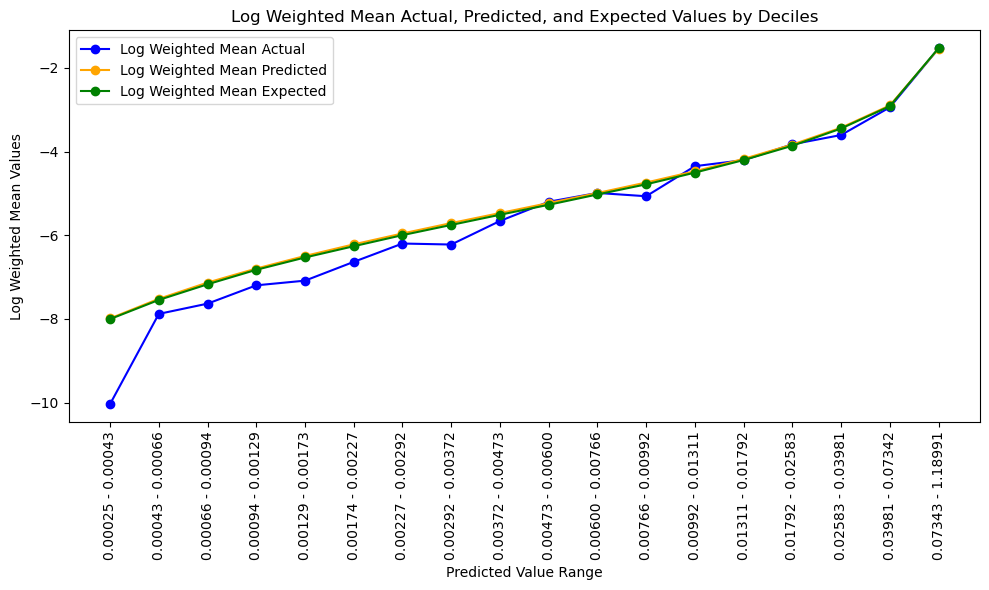

In [59]:
decile_summary = decile_summary.iloc[1:].reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(
    np.log(decile_summary["weighted_actual"]),
    label="Log Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    np.log(decile_summary["weighted_predicted"]),
    label="Log Weighted Mean Predicted",
    color="orange",
    marker="o",
)
if "weighted_expected" in decile_summary.columns:
    plt.plot(
        np.log(decile_summary["weighted_expected"]),
        label="Log Weighted Mean Expected",
        color="green",
        marker="o",
    )
plt.xlabel("Predicted Value Range")
plt.ylabel("Log Weighted Mean Values")
plt.title("Log Weighted Mean Actual, Predicted, and Expected Values by Deciles")
plt.xticks(ticks=range(len(decile_summary)), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

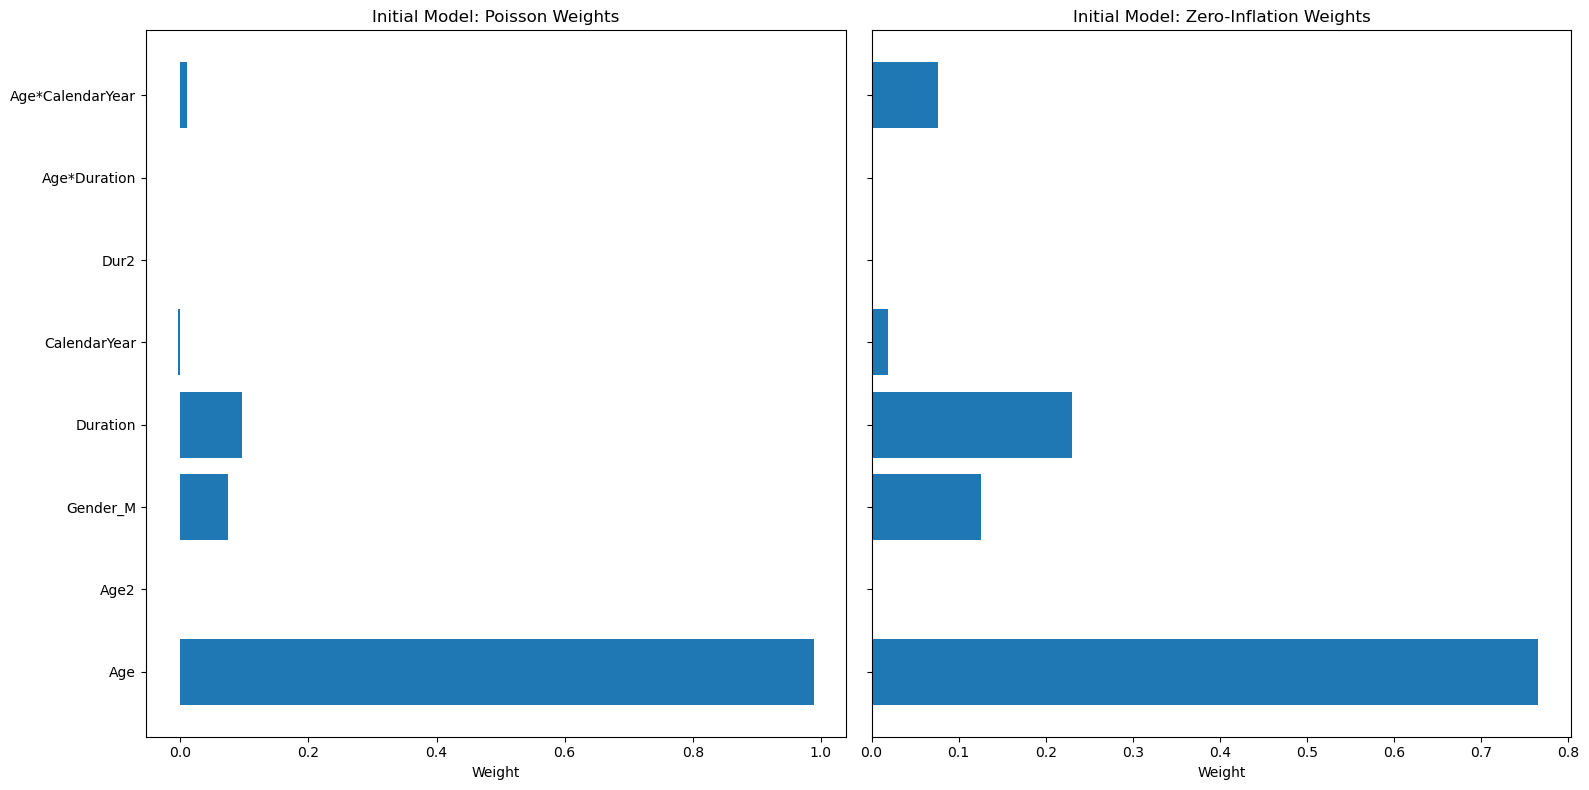

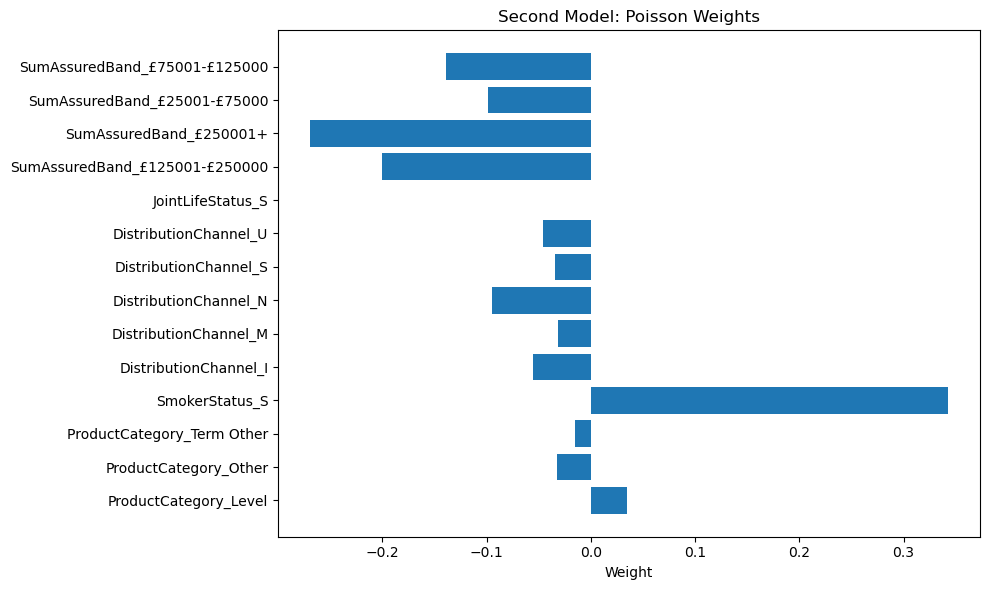

In [64]:
# For initial_model (ZIP): show both Poisson and Zero-Inflation weights
init_weights = initial_model.state_dict()
init_fc2_weights = init_weights["fc2.weight"].detach().cpu().numpy().flatten()
init_fc_zero_weights = init_weights["fc_zero_inflation.weight"].detach().cpu().numpy().flatten()

init_feature_names = list(X_train_initial.columns) + ["Age*Duration", "Age*CalendarYear"]

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
axes[0].barh(init_feature_names, init_fc2_weights)
axes[0].set_title("Initial Model: Poisson Weights")
axes[0].set_xlabel("Weight")

axes[1].barh(init_feature_names, init_fc_zero_weights)
axes[1].set_title("Initial Model: Zero-Inflation Weights")
axes[1].set_xlabel("Weight")

plt.tight_layout()
plt.show()

# For second_model (Poisson): show weights
sec_weights = second_model.state_dict()
sec_fc_weights = sec_weights["fc.weight"].detach().cpu().numpy().flatten()
sec_feature_names = features_except_age_sex

plt.figure(figsize=(10, 6))
plt.barh(sec_feature_names, sec_fc_weights)
plt.title("Second Model: Poisson Weights")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()


parameter tuning for the earlier runs

[I 2025-03-16 22:13:34,097] A new study created in memory with name: no-name-38beb4df-cb9a-4d63-b947-fdd8be4aeb46
[I 2025-03-16 22:34:55,391] Trial 0 finished with value: 0.13399738073349 and parameters: {'lr': 0.032773306839553346, 'weight_decay': 5.591549042441344e-06, 'num_epochs': 849, 'lambda_l1': 0.009000464150058856, 'age_cut': 36, 'age_power': 3.8030720350242744, 'age_multiplier': 1, 'duration_power': -0.6087563708668875, 'duration_multiplier': 0}. Best is trial 0 with value: 0.13399738073349.


Mean Pseudo_R2: 0.1340


[I 2025-03-16 22:50:33,056] Trial 1 finished with value: 0.2439548373222351 and parameters: {'lr': 0.11605650258298181, 'weight_decay': 0.0004839792539159333, 'num_epochs': 730, 'lambda_l1': 0.04720427283226765, 'age_cut': 42, 'age_power': 3.6105475276903705, 'age_multiplier': 1, 'duration_power': 1.8691056334283962, 'duration_multiplier': 1}. Best is trial 1 with value: 0.2439548373222351.


Mean Pseudo_R2: 0.2440


[I 2025-03-16 23:06:57,569] Trial 2 finished with value: 0.1981067657470703 and parameters: {'lr': 0.02554748556540549, 'weight_decay': 3.510541816382324e-06, 'num_epochs': 699, 'lambda_l1': 0.010084353736649163, 'age_cut': 41, 'age_power': 1.939191115948859, 'age_multiplier': 0, 'duration_power': 2.5473600358921984, 'duration_multiplier': 1}. Best is trial 1 with value: 0.2439548373222351.


Mean Pseudo_R2: 0.1981


[I 2025-03-16 23:29:53,632] Trial 3 finished with value: 0.2723589539527893 and parameters: {'lr': 0.19163186317334918, 'weight_decay': 2.7109286558524906e-05, 'num_epochs': 854, 'lambda_l1': 0.000692897466306586, 'age_cut': 77, 'age_power': 4.814523013481006, 'age_multiplier': 0, 'duration_power': 1.1392287958813552, 'duration_multiplier': 0}. Best is trial 3 with value: 0.2723589539527893.


Mean Pseudo_R2: 0.2724


[I 2025-03-16 23:44:58,416] Trial 4 finished with value: -1.0705699920654297 and parameters: {'lr': 0.055113740935550846, 'weight_decay': 0.002203805183599274, 'num_epochs': 610, 'lambda_l1': 3.2375024628416576e-05, 'age_cut': 62, 'age_power': 4.565837726600668, 'age_multiplier': 1, 'duration_power': 1.06828017414542, 'duration_multiplier': 0}. Best is trial 3 with value: 0.2723589539527893.


Mean Pseudo_R2: -1.0706


[I 2025-03-17 00:04:36,909] Trial 5 finished with value: -2.800764322280884 and parameters: {'lr': 0.016918724435414083, 'weight_decay': 0.00017516781938818884, 'num_epochs': 795, 'lambda_l1': 1.2977605098320613e-05, 'age_cut': 70, 'age_power': 4.198682160135846, 'age_multiplier': 1, 'duration_power': 2.826314985526038, 'duration_multiplier': 0}. Best is trial 3 with value: 0.2723589539527893.


Mean Pseudo_R2: -2.8008


[I 2025-03-17 00:22:55,992] Trial 6 finished with value: 0.2637152075767517 and parameters: {'lr': 0.18124108244425785, 'weight_decay': 1.3203119093983602e-05, 'num_epochs': 754, 'lambda_l1': 0.02983639457326385, 'age_cut': 55, 'age_power': 4.26565085403675, 'age_multiplier': 1, 'duration_power': 2.3424976393817545, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2723589539527893.


Mean Pseudo_R2: 0.2637


[I 2025-03-17 00:43:44,928] Trial 7 finished with value: 0.21493017673492432 and parameters: {'lr': 0.022434827777295933, 'weight_decay': 1.9285350450814916e-05, 'num_epochs': 826, 'lambda_l1': 0.0029019523902006545, 'age_cut': 36, 'age_power': 3.0260259653479817, 'age_multiplier': 0, 'duration_power': 0.9565689843437646, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2723589539527893.


Mean Pseudo_R2: 0.2149


[I 2025-03-17 01:09:42,115] Trial 8 finished with value: 0.24422812461853027 and parameters: {'lr': 0.05562556326622094, 'weight_decay': 1.748563358297145e-05, 'num_epochs': 1060, 'lambda_l1': 3.12917277293546e-05, 'age_cut': 24, 'age_power': 4.008267809164612, 'age_multiplier': 0, 'duration_power': 1.7150578608947638, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2723589539527893.


Mean Pseudo_R2: 0.2442


[I 2025-03-17 01:27:37,226] Trial 9 finished with value: -0.6828076839447021 and parameters: {'lr': 0.057944094023761654, 'weight_decay': 0.004440903995481138, 'num_epochs': 722, 'lambda_l1': 0.00034813325576599734, 'age_cut': 68, 'age_power': 2.951303417998195, 'age_multiplier': 1, 'duration_power': 2.3468236870964043, 'duration_multiplier': 1}. Best is trial 3 with value: 0.2723589539527893.


Mean Pseudo_R2: -0.6828


[I 2025-03-17 01:51:52,052] Trial 10 finished with value: 0.18183881044387817 and parameters: {'lr': 0.010768873356145221, 'weight_decay': 8.664319262663509e-05, 'num_epochs': 987, 'lambda_l1': 0.0003659658412388646, 'age_cut': 86, 'age_power': 4.999245883545066, 'age_multiplier': 0, 'duration_power': 0.020180144042299286, 'duration_multiplier': 0}. Best is trial 3 with value: 0.2723589539527893.


Mean Pseudo_R2: 0.1818


[I 2025-03-17 02:15:21,744] Trial 11 finished with value: 0.27421218156814575 and parameters: {'lr': 0.18160669946611563, 'weight_decay': 1.131583138817932e-06, 'num_epochs': 945, 'lambda_l1': 0.08295690581155507, 'age_cut': 86, 'age_power': 4.801186454294381, 'age_multiplier': 0, 'duration_power': 0.8238262728331366, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2742


[I 2025-03-17 02:38:31,669] Trial 12 finished with value: 0.2740274667739868 and parameters: {'lr': 0.19544421925890285, 'weight_decay': 1.3221843104829276e-06, 'num_epochs': 964, 'lambda_l1': 0.000939686046762194, 'age_cut': 90, 'age_power': 4.947626461688538, 'age_multiplier': 0, 'duration_power': 0.5840510370845813, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2740


[I 2025-03-17 03:06:27,304] Trial 13 finished with value: 0.26263701915740967 and parameters: {'lr': 0.10541497169962208, 'weight_decay': 1.2376705245534882e-06, 'num_epochs': 1174, 'lambda_l1': 0.0021841453853250316, 'age_cut': 90, 'age_power': 2.2095605959695046, 'age_multiplier': 0, 'duration_power': 0.03741461249116396, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2626


[I 2025-03-17 03:29:12,230] Trial 14 finished with value: 0.26205283403396606 and parameters: {'lr': 0.09898047022150339, 'weight_decay': 1.1692649558739885e-06, 'num_epochs': 965, 'lambda_l1': 0.09931532133688102, 'age_cut': 80, 'age_power': 3.5191517906124252, 'age_multiplier': 0, 'duration_power': 0.23938574047276895, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2621


[I 2025-03-17 03:51:37,702] Trial 15 finished with value: 0.2653604745864868 and parameters: {'lr': 0.14216780857384298, 'weight_decay': 3.109824453289556e-06, 'num_epochs': 949, 'lambda_l1': 0.00014064758778607923, 'age_cut': 79, 'age_power': 1.493512090484881, 'age_multiplier': 0, 'duration_power': 0.47873831399093725, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2654


[I 2025-03-17 04:17:12,226] Trial 16 finished with value: 0.2612796425819397 and parameters: {'lr': 0.07939211865984647, 'weight_decay': 1.0688779341135541e-06, 'num_epochs': 1073, 'lambda_l1': 0.00449632238225086, 'age_cut': 90, 'age_power': 4.54167201371946, 'age_multiplier': 0, 'duration_power': -0.56952227160179, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2613


[I 2025-03-17 04:39:39,849] Trial 17 finished with value: 0.27404892444610596 and parameters: {'lr': 0.1981124723526203, 'weight_decay': 6.404461293295603e-05, 'num_epochs': 910, 'lambda_l1': 0.00010139789986459638, 'age_cut': 53, 'age_power': 2.751704695669942, 'age_multiplier': 0, 'duration_power': 0.8056007246200378, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2740


[I 2025-03-17 05:04:45,420] Trial 18 finished with value: 0.25771403312683105 and parameters: {'lr': 0.08237986949368564, 'weight_decay': 7.05816948296389e-05, 'num_epochs': 1052, 'lambda_l1': 9.12479071763785e-05, 'age_cut': 53, 'age_power': 2.6028083681994763, 'age_multiplier': 0, 'duration_power': 1.5711401680218091, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2577


[I 2025-03-17 05:26:05,421] Trial 19 finished with value: 0.2700275778770447 and parameters: {'lr': 0.1495796497820472, 'weight_decay': 0.00045643837689811676, 'num_epochs': 900, 'lambda_l1': 7.514263903759631e-05, 'age_cut': 51, 'age_power': 1.159255722224022, 'age_multiplier': 0, 'duration_power': -0.2902037518199707, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2700


[I 2025-03-17 05:54:26,812] Trial 20 finished with value: 0.2333351969718933 and parameters: {'lr': 0.03845151389661321, 'weight_decay': 0.009734991558947892, 'num_epochs': 1193, 'lambda_l1': 0.00031755005495120986, 'age_cut': 62, 'age_power': 2.541639832077459, 'age_multiplier': 0, 'duration_power': 0.8034125251034921, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2333


[I 2025-03-17 06:16:13,599] Trial 21 finished with value: 0.2703392505645752 and parameters: {'lr': 0.19161369346760102, 'weight_decay': 6.687882113819263e-06, 'num_epochs': 899, 'lambda_l1': 0.0011862996701002475, 'age_cut': 72, 'age_power': 3.390144319285016, 'age_multiplier': 0, 'duration_power': 0.5815037794669761, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2703


[I 2025-03-17 06:39:58,321] Trial 22 finished with value: 0.2684732675552368 and parameters: {'lr': 0.14090119192353504, 'weight_decay': 2.6715683157620263e-06, 'num_epochs': 1005, 'lambda_l1': 0.0013367160944705004, 'age_cut': 82, 'age_power': 4.639692642890423, 'age_multiplier': 0, 'duration_power': -0.9963584324427113, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2685


[I 2025-03-17 07:07:17,792] Trial 23 finished with value: 0.2700415253639221 and parameters: {'lr': 0.13978967287087685, 'weight_decay': 3.612000591208874e-05, 'num_epochs': 1115, 'lambda_l1': 0.012190143978554375, 'age_cut': 58, 'age_power': 3.2588318577847315, 'age_multiplier': 0, 'duration_power': 1.3387903305424365, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2700


[I 2025-03-17 07:30:15,204] Trial 24 finished with value: 0.24044442176818848 and parameters: {'lr': 0.07675869766207995, 'weight_decay': 8.057282005377903e-06, 'num_epochs': 915, 'lambda_l1': 0.00016594911722964074, 'age_cut': 48, 'age_power': 2.72190397508082, 'age_multiplier': 0, 'duration_power': 0.6679620968033254, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2404


[I 2025-03-17 07:55:23,781] Trial 25 finished with value: 0.2704429030418396 and parameters: {'lr': 0.16733920475895703, 'weight_decay': 0.0002023398066544874, 'num_epochs': 1015, 'lambda_l1': 0.0006269411373833893, 'age_cut': 65, 'age_power': 2.1335039008687677, 'age_multiplier': 0, 'duration_power': 0.31875504405677835, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2704


[I 2025-03-17 08:18:53,465] Trial 26 finished with value: 0.26339638233184814 and parameters: {'lr': 0.1147898959243408, 'weight_decay': 2.158933361007262e-06, 'num_epochs': 940, 'lambda_l1': 0.02235355221912894, 'age_cut': 75, 'age_power': 4.084282405684242, 'age_multiplier': 0, 'duration_power': 1.271994650162234, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2634


[I 2025-03-17 08:40:11,492] Trial 27 finished with value: 0.2713248133659363 and parameters: {'lr': 0.1960750960852014, 'weight_decay': 4.50610952162177e-05, 'num_epochs': 880, 'lambda_l1': 2.1267549019434822e-05, 'age_cut': 86, 'age_power': 4.9581323817382765, 'age_multiplier': 0, 'duration_power': 0.8271262762023622, 'duration_multiplier': 0}. Best is trial 11 with value: 0.27421218156814575.


Mean Pseudo_R2: 0.2713


[I 2025-03-17 09:06:50,902] Trial 28 finished with value: 0.2742123007774353 and parameters: {'lr': 0.12429320100834627, 'weight_decay': 0.0009981635839948447, 'num_epochs': 1113, 'lambda_l1': 0.004462617584860143, 'age_cut': 84, 'age_power': 4.395259099626305, 'age_multiplier': 0, 'duration_power': 1.9747705114245737, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2742


[I 2025-03-17 10:12:04,335] Trial 29 finished with value: 0.2537088394165039 and parameters: {'lr': 0.0937691135869898, 'weight_decay': 0.0009701454827869937, 'num_epochs': 1153, 'lambda_l1': 0.0053778308984556615, 'age_cut': 21, 'age_power': 4.361210627534753, 'age_multiplier': 1, 'duration_power': 1.8283566502319988, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2537
Mean Pseudo_R2: 0.2703


[I 2025-03-17 10:59:52,203] Trial 30 finished with value: 0.2703334093093872 and parameters: {'lr': 0.12883667232730553, 'weight_decay': 0.00171709918041739, 'num_epochs': 1144, 'lambda_l1': 0.057739478137794925, 'age_cut': 48, 'age_power': 3.773833398936556, 'age_multiplier': 0, 'duration_power': 2.01890450780853, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.
[I 2025-03-17 11:37:23,223] Trial 31 finished with value: 0.2709053158760071 and parameters: {'lr': 0.16328259727434696, 'weight_decay': 0.000349972702650874, 'num_epochs': 1117, 'lambda_l1': 0.01630794040677231, 'age_cut': 85, 'age_power': 4.662672162007866, 'age_multiplier': 0, 'duration_power': 0.40888768892843697, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2709


[I 2025-03-17 12:04:12,930] Trial 32 finished with value: 0.2594999670982361 and parameters: {'lr': 0.12295783816190328, 'weight_decay': 0.0008481570712131753, 'num_epochs': 825, 'lambda_l1': 0.0064367651113221205, 'age_cut': 82, 'age_power': 3.972995067479699, 'age_multiplier': 0, 'duration_power': 1.4267482617146396, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2595


[I 2025-03-17 12:36:23,596] Trial 33 finished with value: 0.26424717903137207 and parameters: {'lr': 0.15636697098230196, 'weight_decay': 4.766443213520506e-06, 'num_epochs': 1034, 'lambda_l1': 0.0022289644078231753, 'age_cut': 75, 'age_power': 4.438132547866474, 'age_multiplier': 0, 'duration_power': 0.05490236103919233, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2642


[I 2025-03-17 13:08:15,582] Trial 34 finished with value: 0.27028989791870117 and parameters: {'lr': 0.16838502814820933, 'weight_decay': 9.532728282050194e-06, 'num_epochs': 977, 'lambda_l1': 0.09270735569277334, 'age_cut': 42, 'age_power': 4.74481432736474, 'age_multiplier': 0, 'duration_power': 2.101127508421507, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2703


[I 2025-03-17 13:43:50,515] Trial 35 finished with value: 0.24754279851913452 and parameters: {'lr': 0.06823071869325434, 'weight_decay': 1.8234717323794777e-06, 'num_epochs': 1091, 'lambda_l1': 0.04146014279134793, 'age_cut': 90, 'age_power': 4.851522911143253, 'age_multiplier': 0, 'duration_power': 1.0798719184413834, 'duration_multiplier': 1}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2475


[I 2025-03-17 14:11:33,154] Trial 36 finished with value: 0.2523149251937866 and parameters: {'lr': 0.11861967847267504, 'weight_decay': 0.00016410296139144688, 'num_epochs': 871, 'lambda_l1': 5.5990246835063935e-05, 'age_cut': 85, 'age_power': 4.361537409143096, 'age_multiplier': 1, 'duration_power': 0.7508413484874576, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2523


[I 2025-03-17 15:05:13,886] Trial 37 finished with value: 0.27275586128234863 and parameters: {'lr': 0.19496573143701376, 'weight_decay': 0.004450035416021307, 'num_epochs': 778, 'lambda_l1': 0.000769875490436427, 'age_cut': 72, 'age_power': 3.8033632835085727, 'age_multiplier': 0, 'duration_power': 2.9105969894406245, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2728


[I 2025-03-17 15:32:14,069] Trial 38 finished with value: 0.2500249147415161 and parameters: {'lr': 0.09657658604182064, 'weight_decay': 0.0009629514527651539, 'num_epochs': 924, 'lambda_l1': 0.008975066930035379, 'age_cut': 58, 'age_power': 3.2057931176229815, 'age_multiplier': 0, 'duration_power': 0.9855337274778335, 'duration_multiplier': 1}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2500


[I 2025-03-17 15:56:47,323] Trial 39 finished with value: 0.09363579750061035 and parameters: {'lr': 0.03328202467511743, 'weight_decay': 4.114235053636033e-06, 'num_epochs': 830, 'lambda_l1': 1.067918921775167e-05, 'age_cut': 44, 'age_power': 1.7686572557945346, 'age_multiplier': 1, 'duration_power': 1.5686099203357018, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.0936


[I 2025-03-17 16:30:10,408] Trial 40 finished with value: 0.27263522148132324 and parameters: {'lr': 0.16496828964330337, 'weight_decay': 1.2954260086983055e-05, 'num_epochs': 1005, 'lambda_l1': 0.00018412470578438916, 'age_cut': 36, 'age_power': 2.858923719915968, 'age_multiplier': 0, 'duration_power': 2.5554170042196684, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2726


[I 2025-03-17 16:49:11,059] Trial 41 finished with value: 0.26458805799484253 and parameters: {'lr': 0.19775493689478307, 'weight_decay': 0.0032419480315798144, 'num_epochs': 609, 'lambda_l1': 0.0006864446074514509, 'age_cut': 73, 'age_power': 4.106265298909062, 'age_multiplier': 0, 'duration_power': 2.5871816043974816, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2646


[I 2025-03-17 17:14:38,946] Trial 42 finished with value: 0.2682022452354431 and parameters: {'lr': 0.1987431715255467, 'weight_decay': 0.0016781322895443728, 'num_epochs': 664, 'lambda_l1': 0.0014855392978431622, 'age_cut': 78, 'age_power': 3.721893131884647, 'age_multiplier': 0, 'duration_power': 2.9331165911535644, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2682


[I 2025-03-17 17:42:25,111] Trial 43 finished with value: 0.2512608766555786 and parameters: {'lr': 0.12892735435485556, 'weight_decay': 0.008740355650786751, 'num_epochs': 795, 'lambda_l1': 0.0005413358611970062, 'age_cut': 68, 'age_power': 4.833033183689969, 'age_multiplier': 0, 'duration_power': 2.8038668069412607, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2513


[I 2025-03-17 18:01:29,789] Trial 44 finished with value: 0.2604084014892578 and parameters: {'lr': 0.17574159981612084, 'weight_decay': 0.0053560251992438215, 'num_epochs': 669, 'lambda_l1': 0.0030152146268108237, 'age_cut': 82, 'age_power': 4.2554593406169685, 'age_multiplier': 0, 'duration_power': 2.1461569954417827, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2604


[I 2025-03-17 18:22:24,853] Trial 45 finished with value: 0.21234071254730225 and parameters: {'lr': 0.023537603282494483, 'weight_decay': 0.002696811478944838, 'num_epochs': 776, 'lambda_l1': 0.0002732073786969128, 'age_cut': 88, 'age_power': 3.9239021111904013, 'age_multiplier': 0, 'duration_power': 1.1822470188963892, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2123


[I 2025-03-17 18:46:10,231] Trial 46 finished with value: 0.21001452207565308 and parameters: {'lr': 0.018266055071824723, 'weight_decay': 0.005612510381112871, 'num_epochs': 856, 'lambda_l1': 0.00045901972798399884, 'age_cut': 63, 'age_power': 4.553746677621277, 'age_multiplier': 0, 'duration_power': 2.309834596140678, 'duration_multiplier': 1}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2100


[I 2025-03-17 19:08:43,585] Trial 47 finished with value: 0.23921966552734375 and parameters: {'lr': 0.047839381469394884, 'weight_decay': 0.0002640230599852491, 'num_epochs': 952, 'lambda_l1': 0.0009752652261675441, 'age_cut': 31, 'age_power': 2.430880694289195, 'age_multiplier': 0, 'duration_power': 0.15821685386268708, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2392


[I 2025-03-17 19:26:26,594] Trial 48 finished with value: 0.2520570158958435 and parameters: {'lr': 0.14418906663437175, 'weight_decay': 0.00012806610294964068, 'num_epochs': 739, 'lambda_l1': 0.0031888034691951784, 'age_cut': 83, 'age_power': 3.5573088737423744, 'age_multiplier': 0, 'duration_power': -0.14826055080152967, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.2521


[I 2025-03-17 19:51:04,963] Trial 49 finished with value: 0.1431179642677307 and parameters: {'lr': 0.010167280015914226, 'weight_decay': 1.8712116886186794e-06, 'num_epochs': 981, 'lambda_l1': 4.889181161174093e-05, 'age_cut': 77, 'age_power': 4.998375583115825, 'age_multiplier': 1, 'duration_power': 0.9077709036259665, 'duration_multiplier': 0}. Best is trial 28 with value: 0.2742123007774353.


Mean Pseudo_R2: 0.1431
best_trial_params {'lr': 0.12429320100834627, 'weight_decay': 0.0009981635839948447, 'num_epochs': 1113, 'lambda_l1': 0.004462617584860143, 'age_cut': 84, 'age_power': 4.395259099626305, 'age_multiplier': 0, 'duration_power': 1.9747705114245737, 'duration_multiplier': 0, 'saturated_r2': 0.2742123007774353}


[I 2025-03-17 19:51:05,770] A new study created in memory with name: no-name-1d7d5559-c0ac-47a5-8821-a20c6b75bd7c
[I 2025-03-17 20:28:12,146] Trial 0 finished with value: 0.20399397611618042 and parameters: {}. Best is trial 0 with value: 0.20399397611618042.
[I 2025-03-17 20:28:12,271] A new study created in memory with name: no-name-0c75f6b0-ab31-4796-a75b-1a4e8f0ccc38


Mean Pseudo_R2: 0.2040
trial params{}


[I 2025-03-17 21:08:53,326] Trial 0 finished with value: 0.26512813568115234 and parameters: {}. Best is trial 0 with value: 0.26512813568115234.


Mean Pseudo_R2: 0.2651
trial params{}


[I 2025-03-17 21:08:53,719] A new study created in memory with name: no-name-c797960a-7819-4396-9f4b-5111ad39af78
[I 2025-03-17 21:49:56,686] Trial 0 finished with value: 0.2714720368385315 and parameters: {}. Best is trial 0 with value: 0.2714720368385315.
[I 2025-03-17 21:49:56,828] A new study created in memory with name: no-name-416c67f2-bf2f-4bbd-840d-de3d78f025b3


Mean Pseudo_R2: 0.2715
trial params{}
Mean Pseudo_R2: 0.2679


[I 2025-03-17 22:32:08,948] Trial 0 finished with value: 0.2679210305213928 and parameters: {}. Best is trial 0 with value: 0.2679210305213928.
[I 2025-03-17 22:32:09,120] A new study created in memory with name: no-name-6ca01755-add5-42fb-bdbd-400348283029


trial params{}


[I 2025-03-17 23:14:01,071] Trial 0 finished with value: 0.2642154097557068 and parameters: {}. Best is trial 0 with value: 0.2642154097557068.


Mean Pseudo_R2: 0.2642
trial params{}


[I 2025-03-17 23:14:01,307] A new study created in memory with name: no-name-dfe881f0-a03f-4b33-a60a-d91cd74b8fa8
[I 2025-03-18 00:01:48,645] Trial 0 finished with value: 0.27001243829727173 and parameters: {}. Best is trial 0 with value: 0.27001243829727173.


Mean Pseudo_R2: 0.2700
trial params{}


[I 2025-03-18 00:01:49,224] A new study created in memory with name: no-name-26314ff2-b62d-4516-9f98-26341e7b3246
[I 2025-03-18 00:45:07,179] Trial 0 finished with value: 0.264062762260437 and parameters: {}. Best is trial 0 with value: 0.264062762260437.


Mean Pseudo_R2: 0.2641
trial params{}


[I 2025-03-18 00:45:07,271] A new study created in memory with name: no-name-93a8318a-6ec5-4f27-9f96-056dbe3016cb
[I 2025-03-18 01:17:28,814] Trial 0 finished with value: 0.2585143446922302 and parameters: {}. Best is trial 0 with value: 0.2585143446922302.
[I 2025-03-18 01:17:28,910] A new study created in memory with name: no-name-90296bc4-391e-4209-a06c-0a67451f7adc


Mean Pseudo_R2: 0.2585
trial params{}


[I 2025-03-18 01:49:47,309] Trial 0 finished with value: 0.2655811905860901 and parameters: {}. Best is trial 0 with value: 0.2655811905860901.


Mean Pseudo_R2: 0.2656
trial params{}


[I 2025-03-18 01:49:47,419] A new study created in memory with name: no-name-0be1f6d3-d6e1-4372-9c48-200918c41a3b
[I 2025-03-18 02:22:35,383] Trial 0 finished with value: 0.27040576934814453 and parameters: {}. Best is trial 0 with value: 0.27040576934814453.


Mean Pseudo_R2: 0.2704
trial params{}


[I 2025-03-18 02:22:35,492] A new study created in memory with name: no-name-7f138c18-d26f-4411-8485-1ae09f776373
[I 2025-03-18 02:54:29,058] Trial 0 finished with value: 0.26579153537750244 and parameters: {}. Best is trial 0 with value: 0.26579153537750244.
[I 2025-03-18 02:54:29,153] A new study created in memory with name: no-name-b68fef8c-af6a-4852-b5b5-d5757eb09cba


Mean Pseudo_R2: 0.2658
trial params{}


[I 2025-03-18 03:26:54,213] Trial 0 finished with value: 0.2717074155807495 and parameters: {}. Best is trial 0 with value: 0.2717074155807495.
[I 2025-03-18 03:26:54,312] A new study created in memory with name: no-name-d5c83cf7-08d9-44ec-b0c4-b063ad388c83


Mean Pseudo_R2: 0.2717
trial params{}


[I 2025-03-18 03:59:02,532] Trial 0 finished with value: 0.2740224599838257 and parameters: {}. Best is trial 0 with value: 0.2740224599838257.
[I 2025-03-18 03:59:02,614] A new study created in memory with name: no-name-de6fb325-31fa-40f6-9d0d-6a51a02d4ff9


Mean Pseudo_R2: 0.2740
trial params{}


[I 2025-03-18 04:31:34,352] Trial 0 finished with value: 0.26984894275665283 and parameters: {}. Best is trial 0 with value: 0.26984894275665283.
[I 2025-03-18 04:31:34,442] A new study created in memory with name: no-name-2792f0fe-7850-4e58-8a3b-9fafe1090a86


Mean Pseudo_R2: 0.2698
trial params{}


[I 2025-03-18 05:03:35,960] Trial 0 finished with value: 0.2687278389930725 and parameters: {}. Best is trial 0 with value: 0.2687278389930725.
[I 2025-03-18 05:03:36,053] A new study created in memory with name: no-name-5f9cea5c-2058-4a66-af91-469a7d9dc8b0


Mean Pseudo_R2: 0.2687
trial params{}


[I 2025-03-18 05:37:33,705] Trial 0 finished with value: 0.2602015733718872 and parameters: {}. Best is trial 0 with value: 0.2602015733718872.
[I 2025-03-18 05:37:33,795] A new study created in memory with name: no-name-abd46f0b-f088-4eb7-ae0c-fbdc2e277f25


Mean Pseudo_R2: 0.2602
trial params{}


[I 2025-03-18 06:13:17,804] Trial 0 finished with value: 0.26646411418914795 and parameters: {}. Best is trial 0 with value: 0.26646411418914795.
[I 2025-03-18 06:13:17,894] A new study created in memory with name: no-name-13351cbb-3d69-4bd1-8d36-d3446a01eb49


Mean Pseudo_R2: 0.2665
trial params{}


[I 2025-03-18 06:47:45,164] Trial 0 finished with value: 0.26668888330459595 and parameters: {}. Best is trial 0 with value: 0.26668888330459595.


Mean Pseudo_R2: 0.2667
trial params{}


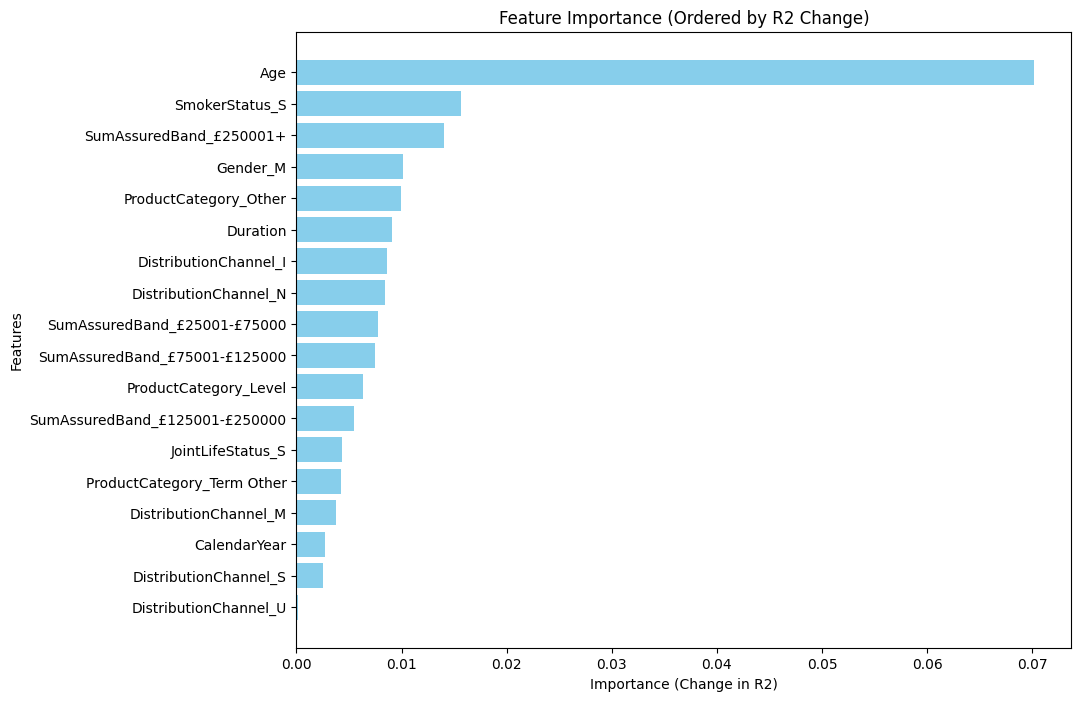

In [ ]:
def objective(trial, features, df, best_trial_params=None):
    if best_trial_params is None:
        lr = trial.suggest_float("lr", 1e-2, 2e-1, log=True)
        weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
        num_epochs = trial.suggest_int("num_epochs", 600, 1200)
        lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-1, log=True)
        age_cut = trial.suggest_int("age_cut", 20, 90)
        age_power = trial.suggest_float("age_power", 1.1, 5)
        age_multiplier = trial.suggest_int("age_multiplier", 0, 1)
        duration_power = trial.suggest_float("duration_power", -1, 3)
        duration_multiplier = trial.suggest_int("duration_multiplier", 0, 1)
    else:
        lr = best_trial_params["lr"]
        weight_decay = best_trial_params["weight_decay"]
        num_epochs = best_trial_params["num_epochs"]
        lambda_l1 = best_trial_params["lambda_l1"]
        age_cut = best_trial_params["age_cut"]
        age_power = best_trial_params["age_power"]
        age_multiplier = best_trial_params["age_multiplier"]
        duration_power = best_trial_params["duration_power"]
        duration_multiplier = best_trial_params["duration_multiplier"]

    pseudo_r2_scores = []

    for fold in range(1, 2):
        df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
        df["Dur2"] = duration_multiplier * np.maximum(df["Duration"] + 1, 0) ** duration_power
        df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)
        train_df = df[df["holdout"] == 0]
        test_df = df[~(df["holdout"] == 0)]

        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]

        if "Age2" not in features:
            features.append("Age2")
        if "Dur2" not in features:
            features.append("Dur2")

        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(
            y_train.values.reshape(-1, 1), dtype=torch.float32
        )
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
        lives_exposure_train_tensor = torch.tensor(
            train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )
        lives_exposure_test_tensor = torch.tensor(
            test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )

        # Initialize the initial ZIP model with interaction terms
        X_train_initial = X_train_scaled[
            ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
        ]
        X_test_initial = X_test_scaled[
            ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
        ]

        # Convert to tensors
        X_train_initial_tensor = torch.tensor(
            X_train_initial.values, dtype=torch.float32
        )
        X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)

        initial_model = Mort_Net_ZIP()
        optimizer_initial = optim.Adam(
            initial_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        # Train the initial ZIP model
        for epoch in range(num_epochs):
            optimizer_initial.zero_grad()
            poisson_outputs, zero_inflation_outputs = initial_model(
                X_train_initial_tensor, lives_exposure_train_tensor
            )
            loss = joint_loss(
                poisson_outputs,
                zero_inflation_outputs,
                y_train_tensor,
                lives_exposure_train_tensor,
            )
            loss.backward()
            optimizer_initial.step()

        # Get predictions from the initial model
        with torch.no_grad():
            poisson_outputs, zero_inflation_outputs = initial_model(
                X_train_initial_tensor, lives_exposure_train_tensor
            )
            initial_predictions = poisson_outputs * (1 - zero_inflation_outputs)
            initial_predictions = initial_predictions.detach()

        # Initialize and train the second model with all features except the ones used in the initial model
        features_except_initial = [
            f
            for f in features
            if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
        ]
        X_train_second = X_train_scaled[features_except_initial]
        X_test_second = X_test_scaled[features_except_initial]

        X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
        X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

        second_model = SecondPoissonModel(len(X_train_second.columns))
        optimizer_second = optim.Adam(
            second_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        for epoch in range(num_epochs):
            optimizer_second.zero_grad()
            second_outputs = second_model(
                X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
            )
            second_loss = weighted_poisson_loss(
                second_outputs, y_train_tensor, lives_exposure_train_tensor
            )
            second_loss.backward()
            optimizer_second.step()

        # Evaluation for the second model
        second_model.eval()
        initial_model.eval()
        with torch.no_grad():
            poisson_outputs_test, zero_inflation_outputs_test = initial_model(
                X_test_initial_tensor, lives_exposure_test_tensor
            )
            initial_predictions_test = poisson_outputs_test * (
                1 - zero_inflation_outputs_test
            )
            initial_predictions_test = initial_predictions_test.detach()
            second_outputs = second_model(
                X_test_second_tensor,
                lives_exposure_test_tensor,
                initial_predictions_test,
            )
            second_loss = weighted_poisson_loss(
                second_outputs, y_test_tensor, lives_exposure_test_tensor
            ) + l1_loss(second_model, lambda_l1=lambda_l1)

            y_pred = second_outputs
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(
                y_test_tensor * lives_exposure_test_tensor
            ) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
                    - (y_test_tensor - weighted_mean_target)
                )
            )
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / y_pred)
                    - (y_test_tensor - y_pred)
                )
            )
            pseudo_r2 = 1 - (model_deviance / null_deviance)
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2


# Initial set of features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
exclude_features = [
   #"DistributionChannel_I",
    #"DistributionChannel_M",
    # "DistributionChannel_N",
    # "DistributionChannel_S",
    # "DistributionChannel_U",
    # "SumAssuredBand_£125001-£250000",
    #"SumAssuredBand_£250001+",
    # "SumAssuredBand_£25001-£75000",
    # "SumAssuredBand_£75001-£125000",
    # "Duration",
    #"ProductCategory_Level",
    #"ProductCategory_Other",
    # "ProductCategory_Term Other",
]
features = [feature for feature in features if feature not in exclude_features1]
df = combined_df_encoded.drop(columns=exclude_features, axis=1)

# Determine the best parameters using Optuna to maximize R2 score of deciles
study_ZIP = optuna.create_study(direction="maximize")
study_ZIP.optimize(
    lambda trial: objective(trial, features, df.sample(frac=0.5, random_state=1)),
    n_trials=50,
)

best_trial = study_ZIP.best_trial
best_trial_params = best_trial.params
best_trial_params["saturated_r2"] = best_trial.value
print(f"best_trial_params {best_trial_params}")

def evaluate_feature_importance(df, features, best_trial_params):
    feature_importances = {}

    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2" or feature == "Dur2":
            continue

        df_copy = df.copy()

        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = 1
                    else:
                        df_copy[gf] = 0
                break

        if not group_found:
            if feature not in ("Age", "Duration", "CalendarYear"):
                df_copy[feature] = df_copy[feature].mode()[0]
            else:
                df_copy[feature] = df_copy[feature].mean()

        study = optuna.create_study(direction="maximize")
        study.optimize(
            lambda trial: objective(trial, features, df_copy, best_trial_params),
            n_trials=1,
        )
        best_trial = study.best_trial
        print(f"trial params{study.best_params}")
        current_r2 = best_trial.value
        feature_importances[feature] = best_trial_params["saturated_r2"] - current_r2

    return feature_importances

feature_importances = evaluate_feature_importance(
    df.sample(frac=0.6, random_state=1),
    features,
    best_trial_params,
)

sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

### Summary of the First Poisson Model

#### Model Overview
The first Poisson model is a Poisson regression model with interaction terms. It is designed to predict incurred claims based on various features, including age and other demographic and policy-related variables.

#### Features Used
- Age
- Age2 (transformed age feature)
- Age3 (another transformed age feature)
- Gender_M
- Duration
- CalendarYear
- JointLifeStatus_S

#### Type of Model
- **Type**: Poisson Regression with Interaction Terms

#### Steps Involved
1. **Data Preparation**:
   - Create new features `Age2` and `Age3` based on age cutoffs and powers.
   - Clip the `LivesExposure` column to avoid very small values.
   - Split the data into training and testing sets based on the `holdout` column.
   - Scale the features using `StandardScaler`.

2. **Convert Data to Tensors**:
   - Convert the scaled features and target variables to PyTorch tensors.

3. **Define the Poisson Model with Interactions**:
   - Create a class `PoissonModelWithInteractions` that defines the Poisson model with interaction terms.
   - Implement the forward method to compute the interaction terms and the final output.

4. **Train the Poisson Model**:
   - Initialize and train the Poisson model using the Adam optimizer.
   - Print the loss every 20 epochs.

5. **Get Predictions from the Poisson Model**:
   - Compute predictions on the training and testing sets.
   - Calculate the pseudo R2 for the initial model.

#### Results
- **Pseudo R2 for Initial Model**: Calculated and printed during training. This metric indicates the goodness of fit of the model.

This summary provides an overview of the first Poisson model, including the features used, the type of model, the steps involved in training, and the results obtained.

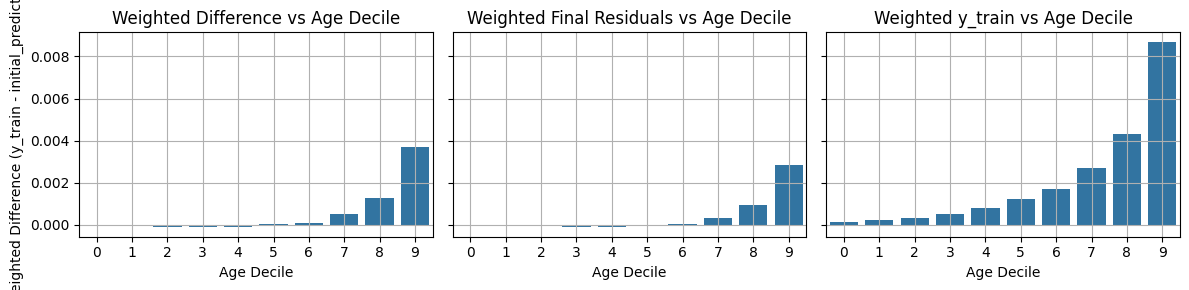

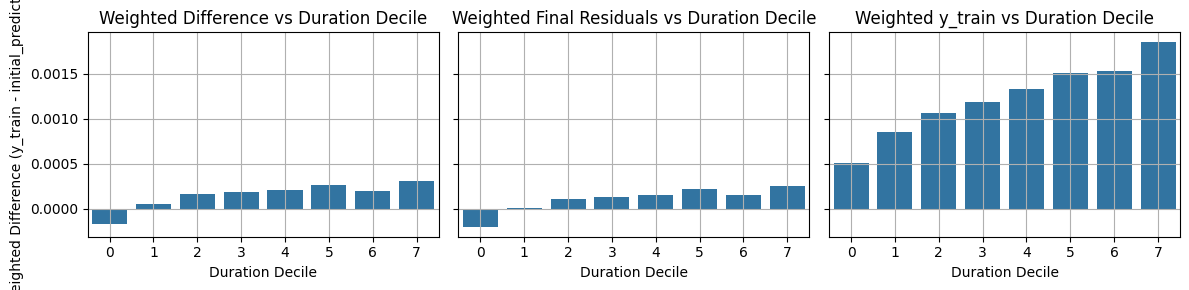

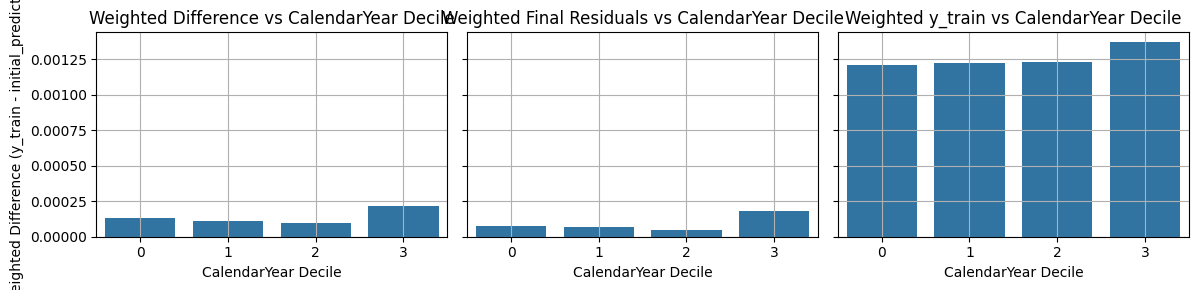

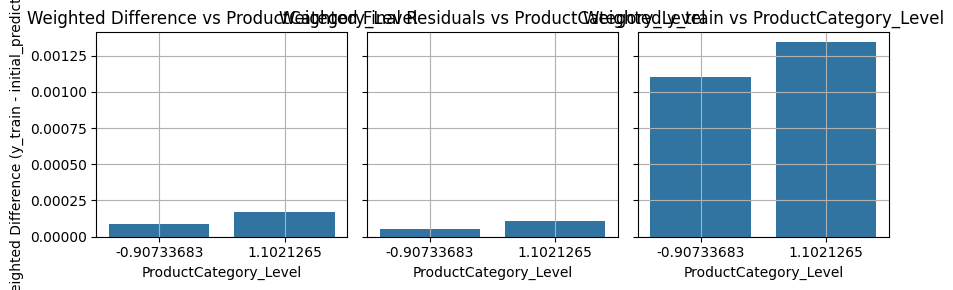

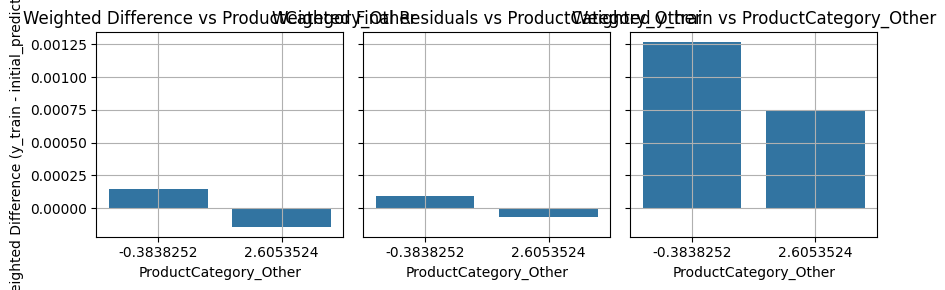

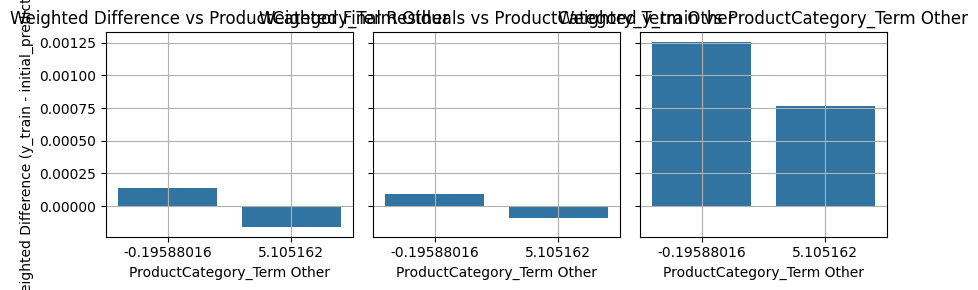

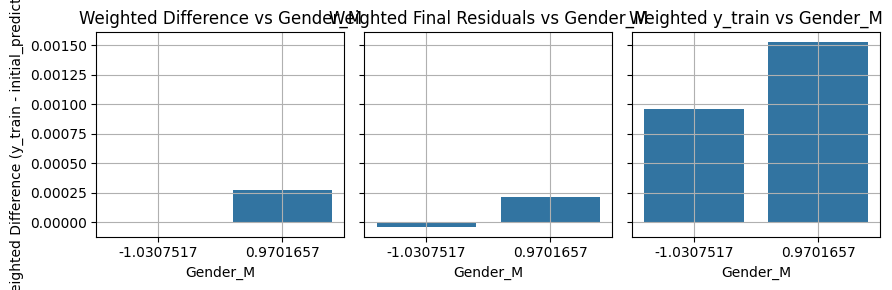

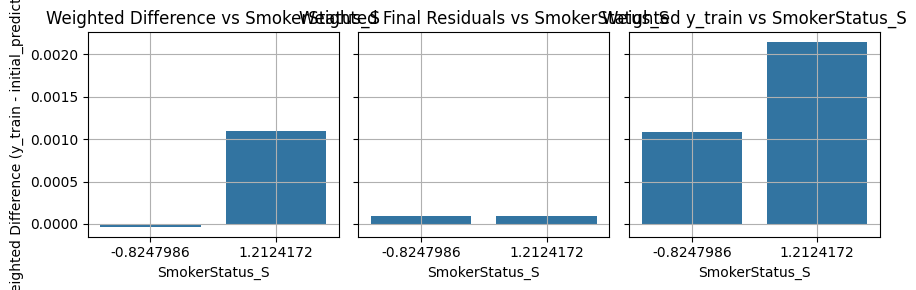

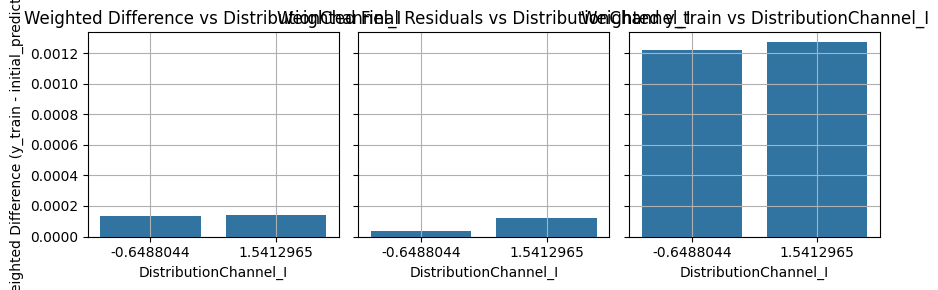

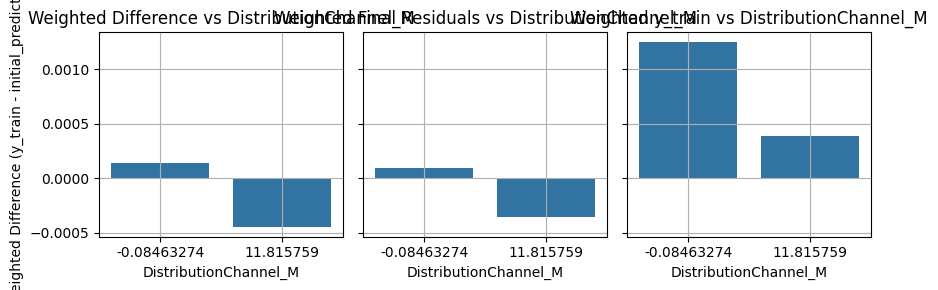

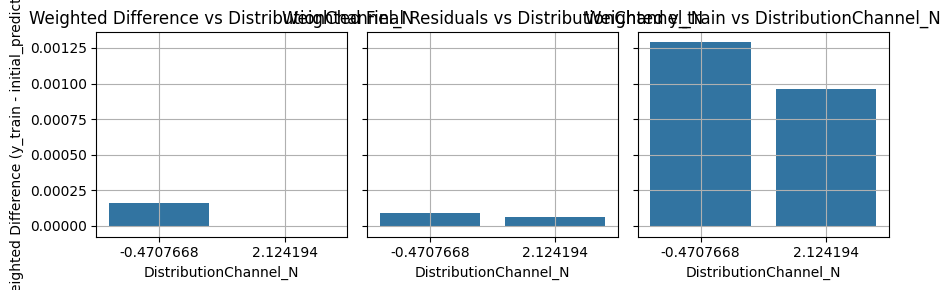

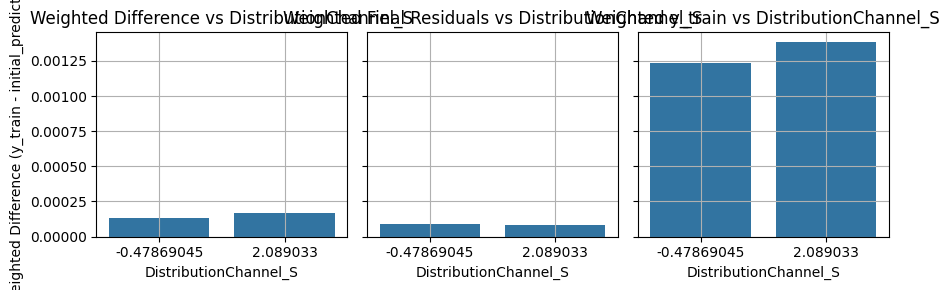

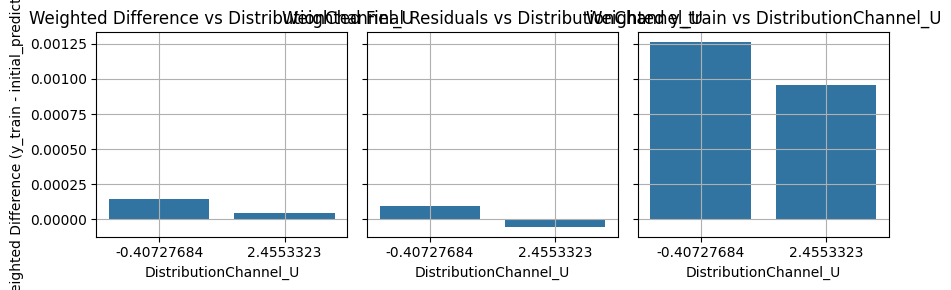

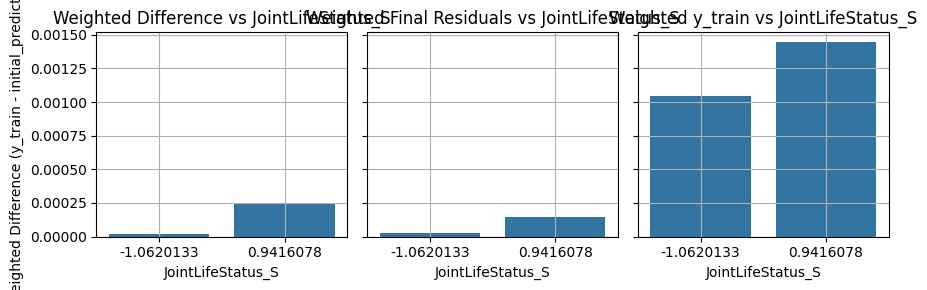

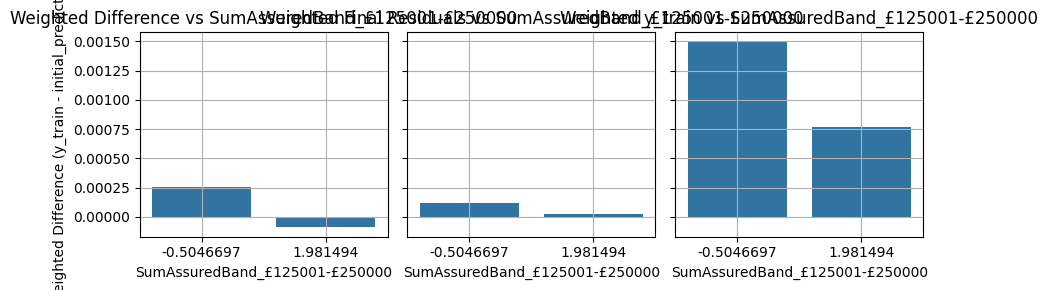

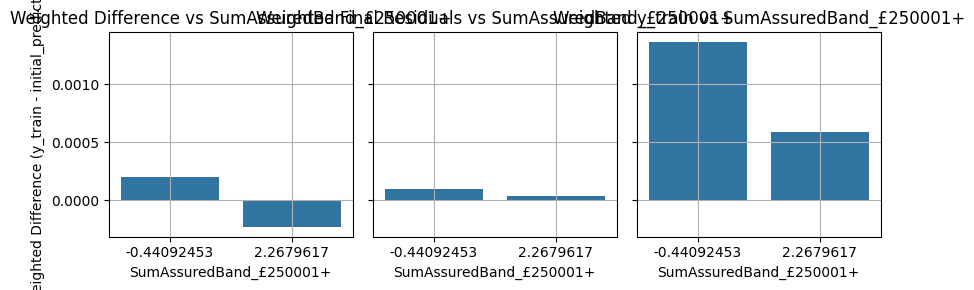

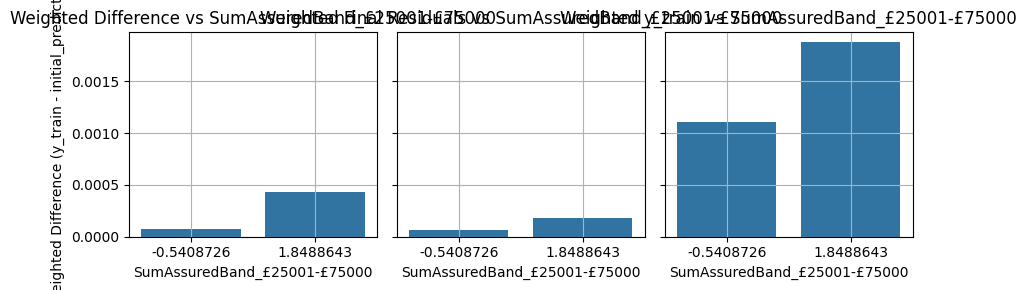

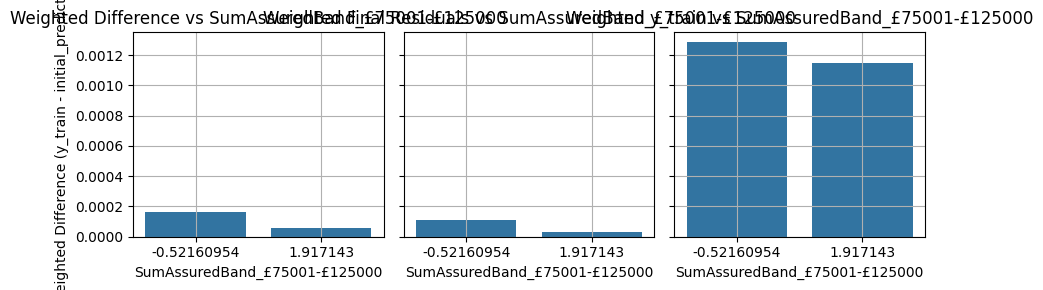

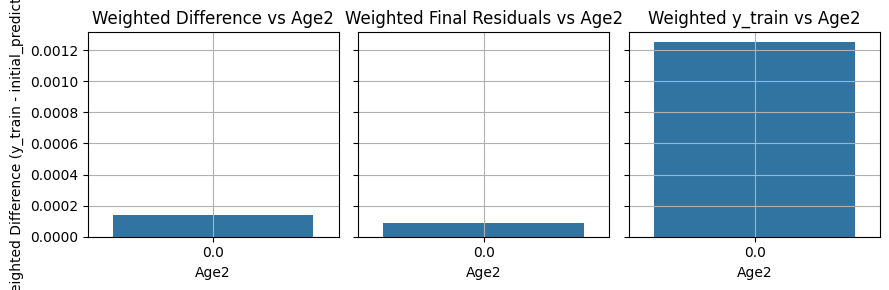

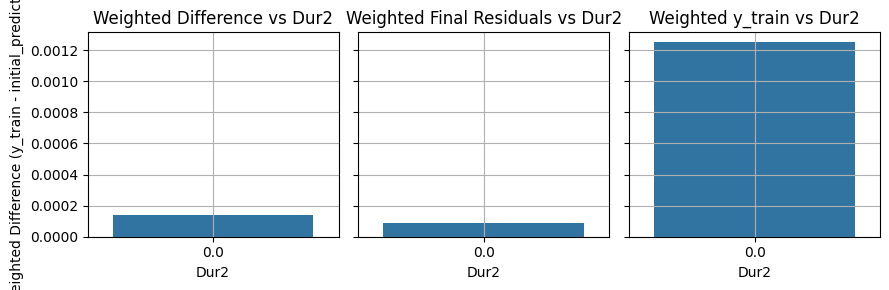

In [152]:
difference_init = (y_train_tensor - initial_predictions) / lives_exposure_train_tensor
second_model.eval()
with torch.no_grad():
    second_outputs_train = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
difference_final = (y_train_tensor - second_outputs_train) / lives_exposure_train_tensor
difference_np = difference_init.detach().numpy().flatten()
difference_fn = difference_final.detach().numpy().flatten()
X_train_np = X_train_tensor.numpy()

# Convert tensors to DataFrame for easier manipulation
df = pd.DataFrame(X_train_np, columns=X_train.columns)
df["difference_init"] = difference_np
df["difference_final"] = difference_fn
df["exposure"] = lives_exposure_train_tensor.numpy().flatten()
df["y_train"] = (y_train_tensor / lives_exposure_train_tensor).numpy().flatten()

# Plot the difference against each feature
for feature in X_train.columns:
    if len(np.unique(df[feature])) > 2:  # Continuous feature
        # Calculate deciles
        df["decile"] = pd.qcut(df[feature], 10, labels=False, duplicates="drop")

        # Calculate weighted average for each decile
        weighted_avg_init = df.groupby("decile").apply(
            lambda x: np.average(x["difference_init"], weights=x["exposure"])
        )
        weighted_avg_final = df.groupby("decile").apply(
            lambda x: np.average(x["difference_final"], weights=x["exposure"])
        )
        weighted_avg_y_train = df.groupby("decile").apply(
            lambda x: np.average(x["y_train"], weights=x["exposure"])
        )

        fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

        sns.barplot(x=weighted_avg_init.index, y=weighted_avg_init.values, ax=axes[0])
        axes[0].set_xlabel(f"{feature} Decile")
        axes[0].set_ylabel("Weighted Difference (y_train - initial_predictions)")
        axes[0].set_title(f"Weighted Difference vs {feature} Decile")
        axes[0].grid(True)

        sns.barplot(x=weighted_avg_final.index, y=weighted_avg_final.values, ax=axes[1])
        axes[1].set_xlabel(f"{feature} Decile")
        axes[1].set_ylabel("Weighted Final Residuals")
        axes[1].set_title(f"Weighted Final Residuals vs {feature} Decile")
        axes[1].grid(True)

        sns.barplot(
            x=weighted_avg_y_train.index, y=weighted_avg_y_train.values, ax=axes[2]
        )
        axes[2].set_xlabel(f"{feature} Decile")
        axes[2].set_ylabel("Weighted y_train")
        axes[2].set_title(f"Weighted y_train vs {feature} Decile")
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()

    else:  # Categorical feature
        categories = np.unique(df[feature])

        # Calculate weighted average for each category
        weighted_avg_init = df.groupby(feature).apply(
            lambda x: np.average(x["difference_init"], weights=x["exposure"])
        )
        weighted_avg_final = df.groupby(feature).apply(
            lambda x: np.average(x["difference_final"], weights=x["exposure"])
        )
        weighted_avg_y_train = df.groupby(feature).apply(
            lambda x: np.average(x["y_train"], weights=x["exposure"])
        )

        fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

        sns.barplot(x=weighted_avg_init.index, y=weighted_avg_init.values, ax=axes[0])
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel("Weighted Difference (y_train - initial_predictions)")
        axes[0].set_title(f"Weighted Difference vs {feature}")
        axes[0].grid(True)

        sns.barplot(x=weighted_avg_final.index, y=weighted_avg_final.values, ax=axes[1])
        axes[1].set_xlabel(feature)
        axes[1].set_ylabel("Weighted Final Residuals")
        axes[1].set_title(f"Weighted Final Residuals vs {feature}")
        axes[1].grid(True)

        sns.barplot(
            x=weighted_avg_y_train.index, y=weighted_avg_y_train.values, ax=axes[2]
        )
        axes[2].set_xlabel(feature)
        axes[2].set_ylabel("Weighted y_train")
        axes[2].set_title(f"Weighted y_train vs {feature}")
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()

#### Summary of next the Model and Steps

Features Used: ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"].
Define a Poisson regression model (PoissonModel) with a linear layer.
Train the model using the Adam optimizer and a custom weighted Poisson loss function.
Use model predictions as initial predictions for a second model.
Second Poisson Model Definition and Training:

Features Used: All features except ["Age", "Age2", "Gender_M", "Duration", "CalendarYear"].
Define a second Poisson regression model (SecondPoissonModel) that uses initial predictions as an offset.
Train the second model similarly to the first.
Evaluation:

Evaluate the second model on the test set.
Calculate pseudo R-squared (pseudo_r2) to assess model performance.
Hyperparameter Optimization with Optuna:

Define an objective function for Optuna to optimize hyperparameters.
Use cross-validation to train and evaluate the model.
Find the best hyperparameters that maximize the pseudo R-squared score.
Feature Importance Evaluation:

Evaluate feature importance by measuring the change in pseudo R-squared when each feature is replaced with its mode or mean.




Epoch 20, Poisson Model Loss: 80.58161163330078
Epoch 40, Poisson Model Loss: 26.327342987060547
Epoch 60, Poisson Model Loss: 17.257781982421875
Epoch 80, Poisson Model Loss: 13.457740783691406
Epoch 100, Poisson Model Loss: 11.150428771972656
Epoch 120, Poisson Model Loss: 9.542817115783691
Epoch 140, Poisson Model Loss: 8.371501922607422
Epoch 160, Poisson Model Loss: 7.4952569007873535
Epoch 180, Poisson Model Loss: 6.8263750076293945
Epoch 200, Poisson Model Loss: 6.3070268630981445
Epoch 220, Poisson Model Loss: 5.897832870483398
Epoch 240, Poisson Model Loss: 5.571308135986328
Epoch 260, Poisson Model Loss: 5.307863235473633
Epoch 280, Poisson Model Loss: 5.093249320983887
Epoch 300, Poisson Model Loss: 4.916926860809326
Epoch 320, Poisson Model Loss: 4.7709736824035645
Epoch 340, Poisson Model Loss: 4.649354457855225
Epoch 360, Poisson Model Loss: 4.547408580780029
Epoch 380, Poisson Model Loss: 4.461498737335205
Epoch 400, Poisson Model Loss: 4.388758659362793
Epoch 420, Poiss

[I 2025-03-19 18:40:21,273] A new study created in memory with name: no-name-c17c64ea-9577-404a-8e54-f73415ff20b3


Pseudo R2: 0.2881287932395935


[I 2025-03-19 18:41:21,970] Trial 0 finished with value: 0.27382975816726685 and parameters: {'lr': 0.13439628938494436, 'weight_decay': 0.00013308395524678124, 'num_epochs': 1115, 'lambda_l1': 0.010294713216751728, 'age_cut': 85, 'age_power': 4.234101446188847, 'age_multiplier': 0, 'duration_power': 2.9867943915578605, 'duration_multiplier': 0}. Best is trial 0 with value: 0.27382975816726685.


Mean Pseudo_R2: 0.2738


[I 2025-03-19 18:42:27,570] Trial 1 finished with value: 0.2810247540473938 and parameters: {'lr': 0.38871840907985605, 'weight_decay': 1.7719887267212095e-06, 'num_epochs': 1148, 'lambda_l1': 0.01040579695080161, 'age_cut': 60, 'age_power': 4.276116921846022, 'age_multiplier': 0, 'duration_power': 2.2849459845069027, 'duration_multiplier': 1}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: 0.2810


[I 2025-03-19 18:43:39,395] Trial 2 finished with value: -inf and parameters: {'lr': 0.2916880021235903, 'weight_decay': 0.0002137354990683414, 'num_epochs': 1259, 'lambda_l1': 0.002777103279795157, 'age_cut': 88, 'age_power': 3.833442910997699, 'age_multiplier': 1, 'duration_power': 0.42162153768552146, 'duration_multiplier': 0}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: -inf


[I 2025-03-19 18:44:49,401] Trial 3 finished with value: 0.2734243869781494 and parameters: {'lr': 0.11093511034487173, 'weight_decay': 0.00011090764777179625, 'num_epochs': 1210, 'lambda_l1': 0.00719242351915413, 'age_cut': 53, 'age_power': 4.839231548175427, 'age_multiplier': 1, 'duration_power': 1.4299116496320012, 'duration_multiplier': 0}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: 0.2734


[I 2025-03-19 18:45:48,167] Trial 4 finished with value: 0.2692676782608032 and parameters: {'lr': 0.3062891099379654, 'weight_decay': 0.0008794843616458796, 'num_epochs': 956, 'lambda_l1': 0.06401883776469254, 'age_cut': 36, 'age_power': 4.294330669827074, 'age_multiplier': 1, 'duration_power': 0.9602702739786935, 'duration_multiplier': 1}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: 0.2693


[I 2025-03-19 18:46:41,804] Trial 5 finished with value: 0.2763744592666626 and parameters: {'lr': 0.23823198393598768, 'weight_decay': 5.279698241358763e-05, 'num_epochs': 895, 'lambda_l1': 0.006607667592471173, 'age_cut': 55, 'age_power': 1.912273709682962, 'age_multiplier': 0, 'duration_power': -0.7334510430076167, 'duration_multiplier': 0}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: 0.2764


[I 2025-03-19 18:48:09,685] Trial 6 finished with value: 0.2733994126319885 and parameters: {'lr': 0.19351197006456433, 'weight_decay': 7.95328481646755e-05, 'num_epochs': 1378, 'lambda_l1': 0.0011250909057896113, 'age_cut': 39, 'age_power': 3.0952367819306854, 'age_multiplier': 1, 'duration_power': 2.8859355345440942, 'duration_multiplier': 0}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: 0.2734


[I 2025-03-19 18:49:31,337] Trial 7 finished with value: 0.271808385848999 and parameters: {'lr': 0.3499038524853866, 'weight_decay': 0.00014476030006039324, 'num_epochs': 1120, 'lambda_l1': 0.05814451903834543, 'age_cut': 75, 'age_power': 3.4805451414693014, 'age_multiplier': 0, 'duration_power': -0.7862291234860495, 'duration_multiplier': 0}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: 0.2718


[I 2025-03-19 18:51:11,358] Trial 8 finished with value: 0.2755171060562134 and parameters: {'lr': 0.14413477438565458, 'weight_decay': 0.00021172798553818612, 'num_epochs': 1493, 'lambda_l1': 0.03679641255893191, 'age_cut': 26, 'age_power': 1.2335125204733417, 'age_multiplier': 0, 'duration_power': 1.3374847791950994, 'duration_multiplier': 1}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: 0.2755


[I 2025-03-19 18:52:02,481] Trial 9 finished with value: 0.28009510040283203 and parameters: {'lr': 0.19266665578894362, 'weight_decay': 1.741001377398592e-05, 'num_epochs': 848, 'lambda_l1': 0.0036387688355289903, 'age_cut': 33, 'age_power': 4.8819722550636815, 'age_multiplier': 0, 'duration_power': 0.4827784332580469, 'duration_multiplier': 1}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: 0.2801


[I 2025-03-19 18:52:47,960] Trial 10 finished with value: 0.256115198135376 and parameters: {'lr': 0.0823641719697746, 'weight_decay': 1.006496719906255e-06, 'num_epochs': 769, 'lambda_l1': 0.019502979274706407, 'age_cut': 69, 'age_power': 2.4286861978814516, 'age_multiplier': 0, 'duration_power': 2.0582526479934264, 'duration_multiplier': 1}. Best is trial 1 with value: 0.2810247540473938.


Mean Pseudo_R2: 0.2561


[I 2025-03-19 18:53:30,478] Trial 11 finished with value: 0.28251761198043823 and parameters: {'lr': 0.21926741536996164, 'weight_decay': 5.027136112900679e-06, 'num_epochs': 711, 'lambda_l1': 0.0031233437426790096, 'age_cut': 44, 'age_power': 4.9203340654004375, 'age_multiplier': 0, 'duration_power': 0.2943493936376156, 'duration_multiplier': 1}. Best is trial 11 with value: 0.28251761198043823.


Mean Pseudo_R2: 0.2825


[I 2025-03-19 18:54:12,066] Trial 12 finished with value: 0.2840232253074646 and parameters: {'lr': 0.3818486826598913, 'weight_decay': 2.4321450611318177e-06, 'num_epochs': 713, 'lambda_l1': 0.001752736409356324, 'age_cut': 48, 'age_power': 4.980939283589073, 'age_multiplier': 0, 'duration_power': 0.06468703846346058, 'duration_multiplier': 1}. Best is trial 12 with value: 0.2840232253074646.


Mean Pseudo_R2: 0.2840


[I 2025-03-19 18:54:55,273] Trial 13 finished with value: 0.284076452255249 and parameters: {'lr': 0.2510124423626478, 'weight_decay': 5.947571991568094e-06, 'num_epochs': 708, 'lambda_l1': 0.001474308058334711, 'age_cut': 46, 'age_power': 4.9889522490338845, 'age_multiplier': 0, 'duration_power': -0.08869847534395686, 'duration_multiplier': 1}. Best is trial 13 with value: 0.284076452255249.


Mean Pseudo_R2: 0.2841


[I 2025-03-19 18:55:49,390] Trial 14 finished with value: 0.2852019667625427 and parameters: {'lr': 0.2780920483333649, 'weight_decay': 8.302318570708685e-06, 'num_epochs': 948, 'lambda_l1': 0.001188706219323233, 'age_cut': 46, 'age_power': 3.7869544223996523, 'age_multiplier': 0, 'duration_power': -0.11907296207714516, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2852


[I 2025-03-19 18:56:46,304] Trial 15 finished with value: 0.2851063013076782 and parameters: {'lr': 0.25264261510080493, 'weight_decay': 1.4732890643435461e-05, 'num_epochs': 995, 'lambda_l1': 0.001185629463314678, 'age_cut': 24, 'age_power': 2.8170588633544003, 'age_multiplier': 0, 'duration_power': -0.23728156241394238, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2851


[I 2025-03-19 18:57:44,803] Trial 16 finished with value: 0.28415703773498535 and parameters: {'lr': 0.29178492390197774, 'weight_decay': 1.5330863163981328e-05, 'num_epochs': 1010, 'lambda_l1': 0.0010253133204415022, 'age_cut': 20, 'age_power': 2.7071631977058654, 'age_multiplier': 0, 'duration_power': -0.6249631785602957, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2842


[I 2025-03-19 18:58:53,822] Trial 17 finished with value: 0.27892792224884033 and parameters: {'lr': 0.1628643381382633, 'weight_decay': 1.833988677479183e-05, 'num_epochs': 1026, 'lambda_l1': 0.00184339300108156, 'age_cut': 29, 'age_power': 3.1617584862969954, 'age_multiplier': 1, 'duration_power': -0.21934309808268285, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2789


[I 2025-03-19 18:59:44,425] Trial 18 finished with value: 0.2779718041419983 and parameters: {'lr': 0.25736824518888146, 'weight_decay': 4.339779448537645e-06, 'num_epochs': 836, 'lambda_l1': 0.00515044628937043, 'age_cut': 20, 'age_power': 2.2578676903264974, 'age_multiplier': 0, 'duration_power': 0.8760505711041547, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2780


[I 2025-03-19 19:00:44,456] Trial 19 finished with value: 0.2814868092536926 and parameters: {'lr': 0.21351159090798874, 'weight_decay': 9.91851367838335e-06, 'num_epochs': 1014, 'lambda_l1': 0.01961784695697166, 'age_cut': 63, 'age_power': 3.6365431062483573, 'age_multiplier': 0, 'duration_power': -0.3215220179070901, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2815


[I 2025-03-19 19:01:46,321] Trial 20 finished with value: 0.2676205635070801 and parameters: {'lr': 0.31896775854910003, 'weight_decay': 3.4823382172958416e-05, 'num_epochs': 951, 'lambda_l1': 0.0022521105465491786, 'age_cut': 39, 'age_power': 1.7296569379293207, 'age_multiplier': 1, 'duration_power': -0.46136818462140017, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2676


[I 2025-03-19 19:02:54,540] Trial 21 finished with value: 0.28475797176361084 and parameters: {'lr': 0.27560971752850355, 'weight_decay': 1.2752350512075193e-05, 'num_epochs': 1035, 'lambda_l1': 0.0010595303609680924, 'age_cut': 23, 'age_power': 2.6730332865888546, 'age_multiplier': 0, 'duration_power': -0.9285255046100638, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2848


[I 2025-03-19 19:03:55,120] Trial 22 finished with value: 0.28514015674591064 and parameters: {'lr': 0.26867402260753886, 'weight_decay': 1.0131688040625954e-05, 'num_epochs': 942, 'lambda_l1': 0.0015478950164862955, 'age_cut': 28, 'age_power': 2.7660881724212802, 'age_multiplier': 0, 'duration_power': -0.8550189704933295, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2851


[I 2025-03-19 19:04:53,418] Trial 23 finished with value: 0.28352290391921997 and parameters: {'lr': 0.2280153920916512, 'weight_decay': 7.710842886548775e-06, 'num_epochs': 916, 'lambda_l1': 0.0016571431301789, 'age_cut': 31, 'age_power': 3.307411920829013, 'age_multiplier': 0, 'duration_power': 0.17937828730474545, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2835


[I 2025-03-19 19:05:43,082] Trial 24 finished with value: 0.2790444493293762 and parameters: {'lr': 0.3463940295449781, 'weight_decay': 3.3434939121456245e-05, 'num_epochs': 801, 'lambda_l1': 0.004333126151251102, 'age_cut': 27, 'age_power': 2.834791807145153, 'age_multiplier': 0, 'duration_power': 0.6747766432740603, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2790


[I 2025-03-19 19:06:51,474] Trial 25 finished with value: 0.2795493006706238 and parameters: {'lr': 0.1743883420583592, 'weight_decay': 3.1562735169794596e-06, 'num_epochs': 1069, 'lambda_l1': 0.0024619236397397533, 'age_cut': 39, 'age_power': 3.844296705035019, 'age_multiplier': 0, 'duration_power': -0.4941290366830859, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2795


[I 2025-03-19 19:07:44,266] Trial 26 finished with value: 0.28463488817214966 and parameters: {'lr': 0.2658433650804109, 'weight_decay': 2.55160970471214e-05, 'num_epochs': 887, 'lambda_l1': 0.0013718747596123942, 'age_cut': 31, 'age_power': 2.1958218631131046, 'age_multiplier': 0, 'duration_power': -0.9993556553466596, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2846


[I 2025-03-19 19:08:44,459] Trial 27 finished with value: 0.28245270252227783 and parameters: {'lr': 0.20775220791734866, 'weight_decay': 8.260527102540083e-06, 'num_epochs': 934, 'lambda_l1': 0.002182602202153585, 'age_cut': 43, 'age_power': 2.948226606537917, 'age_multiplier': 0, 'duration_power': -0.20712839157358548, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2825


[I 2025-03-19 19:10:12,104] Trial 28 finished with value: 0.2843039631843567 and parameters: {'lr': 0.32906781656127526, 'weight_decay': 6.198239621106686e-05, 'num_epochs': 1212, 'lambda_l1': 0.0014646658276487802, 'age_cut': 50, 'age_power': 2.514664574125617, 'age_multiplier': 0, 'duration_power': -0.05005794543524933, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2843


[I 2025-03-19 19:11:20,221] Trial 29 finished with value: 0.2733588218688965 and parameters: {'lr': 0.14442275177564845, 'weight_decay': 3.4439322242640724e-06, 'num_epochs': 1085, 'lambda_l1': 0.012896607908904546, 'age_cut': 75, 'age_power': 3.912524964325729, 'age_multiplier': 0, 'duration_power': 1.2806125116748666, 'duration_multiplier': 0}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2734


[I 2025-03-19 19:12:22,273] Trial 30 finished with value: 0.2847170829772949 and parameters: {'lr': 0.24019143693559342, 'weight_decay': 1.4172282608704803e-06, 'num_epochs': 974, 'lambda_l1': 0.0031613716419090763, 'age_cut': 26, 'age_power': 3.459564497269174, 'age_multiplier': 0, 'duration_power': -0.48357711622696264, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2847


[I 2025-03-19 19:13:28,216] Trial 31 finished with value: 0.2835954427719116 and parameters: {'lr': 0.2780935531326594, 'weight_decay': 1.1996514541092595e-05, 'num_epochs': 1053, 'lambda_l1': 0.0011649387552593604, 'age_cut': 24, 'age_power': 2.639940444957545, 'age_multiplier': 0, 'duration_power': -0.9714518145821275, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2836


[I 2025-03-19 19:14:42,610] Trial 32 finished with value: 0.2851811647415161 and parameters: {'lr': 0.27274954184817024, 'weight_decay': 2.2405270580857094e-05, 'num_epochs': 1136, 'lambda_l1': 0.001194221419787255, 'age_cut': 23, 'age_power': 2.953994975403508, 'age_multiplier': 0, 'duration_power': -0.807992642516714, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2852


[I 2025-03-19 19:15:58,076] Trial 33 finished with value: 0.28259044885635376 and parameters: {'lr': 0.3870026255239357, 'weight_decay': 2.2269145363975607e-05, 'num_epochs': 1157, 'lambda_l1': 0.0023033998455580713, 'age_cut': 33, 'age_power': 3.0346174702500455, 'age_multiplier': 0, 'duration_power': -0.6872177601114943, 'duration_multiplier': 1}. Best is trial 14 with value: 0.2852019667625427.


Mean Pseudo_R2: 0.2826


[I 2025-03-19 19:17:33,288] Trial 34 finished with value: 0.28533536195755005 and parameters: {'lr': 0.3026063071642011, 'weight_decay': 6.576812842536885e-06, 'num_epochs': 1316, 'lambda_l1': 0.0010042726424270001, 'age_cut': 58, 'age_power': 4.065978965764992, 'age_multiplier': 0, 'duration_power': -0.4488155250040655, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2853


[I 2025-03-19 19:18:56,621] Trial 35 finished with value: 0.2845171093940735 and parameters: {'lr': 0.30101463031246417, 'weight_decay': 7.123980398246432e-06, 'num_epochs': 1331, 'lambda_l1': 0.001880574086655024, 'age_cut': 62, 'age_power': 4.480135032766085, 'age_multiplier': 0, 'duration_power': -0.5134293427477679, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2845


[I 2025-03-19 19:20:20,724] Trial 36 finished with value: 0.22157782316207886 and parameters: {'lr': 0.3422195728939162, 'weight_decay': 2.7492887018689487e-06, 'num_epochs': 1306, 'lambda_l1': 0.0013886582574298228, 'age_cut': 59, 'age_power': 4.199306756560895, 'age_multiplier': 1, 'duration_power': -0.728503491173297, 'duration_multiplier': 0}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2216


[I 2025-03-19 19:21:51,156] Trial 37 finished with value: 0.28061556816101074 and parameters: {'lr': 0.12009335989337944, 'weight_decay': 4.642583027979559e-05, 'num_epochs': 1424, 'lambda_l1': 0.0010131326619309347, 'age_cut': 55, 'age_power': 4.589459923454616, 'age_multiplier': 0, 'duration_power': 1.7863748302929872, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2806


[I 2025-03-19 19:23:06,723] Trial 38 finished with value: 0.2754095792770386 and parameters: {'lr': 0.30680766796400505, 'weight_decay': 0.0006190391527640165, 'num_epochs': 1204, 'lambda_l1': 0.009036429018072495, 'age_cut': 67, 'age_power': 4.091514480973736, 'age_multiplier': 1, 'duration_power': 0.49561455018529554, 'duration_multiplier': 0}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2754


[I 2025-03-19 19:24:15,258] Trial 39 finished with value: 0.28388410806655884 and parameters: {'lr': 0.37308990260492986, 'weight_decay': 1.953508994343006e-06, 'num_epochs': 1141, 'lambda_l1': 0.004668834730589861, 'age_cut': 51, 'age_power': 3.298164012714083, 'age_multiplier': 0, 'duration_power': -0.8449725483257701, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2839


[I 2025-03-19 19:25:31,358] Trial 40 finished with value: 0.2818203568458557 and parameters: {'lr': 0.19797223254512433, 'weight_decay': 4.605763978726398e-06, 'num_epochs': 1261, 'lambda_l1': 0.0027645987790329758, 'age_cut': 36, 'age_power': 3.631568085024817, 'age_multiplier': 0, 'duration_power': 2.746521457347072, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2818


[I 2025-03-19 19:26:34,903] Trial 41 finished with value: 0.28404760360717773 and parameters: {'lr': 0.24072385754995784, 'weight_decay': 1.1566980354361138e-05, 'num_epochs': 983, 'lambda_l1': 0.0012525675064050021, 'age_cut': 58, 'age_power': 3.991398106300351, 'age_multiplier': 0, 'duration_power': -0.30657554996188385, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2840


[I 2025-03-19 19:27:37,716] Trial 42 finished with value: 0.28439420461654663 and parameters: {'lr': 0.275727873893201, 'weight_decay': 2.466149257122909e-05, 'num_epochs': 867, 'lambda_l1': 0.0017531267731741653, 'age_cut': 22, 'age_power': 4.443373975462722, 'age_multiplier': 0, 'duration_power': 0.06330579232977795, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2844


[I 2025-03-19 19:29:00,079] Trial 43 finished with value: 0.28370243310928345 and parameters: {'lr': 0.2563641662497527, 'weight_decay': 8.583324141315504e-06, 'num_epochs': 1100, 'lambda_l1': 0.0012878213716717862, 'age_cut': 81, 'age_power': 2.0087309860890703, 'age_multiplier': 0, 'duration_power': -0.35083781380926765, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2837


[I 2025-03-19 19:30:35,465] Trial 44 finished with value: 0.27508848905563354 and parameters: {'lr': 0.2900448333523523, 'weight_decay': 1.5406816513682562e-05, 'num_epochs': 1498, 'lambda_l1': 0.0797240728625437, 'age_cut': 34, 'age_power': 2.8679496082536384, 'age_multiplier': 0, 'duration_power': -0.5893203123205208, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2751


[I 2025-03-19 19:32:03,006] Trial 45 finished with value: 0.285161554813385 and parameters: {'lr': 0.22591526139267404, 'weight_decay': 5.804315566870502e-06, 'num_epochs': 1434, 'lambda_l1': 0.0010240628078976711, 'age_cut': 28, 'age_power': 3.595888002940794, 'age_multiplier': 0, 'duration_power': -0.06615106173898949, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2852


[I 2025-03-19 19:33:31,315] Trial 46 finished with value: 0.283974289894104 and parameters: {'lr': 0.22484628387727854, 'weight_decay': 6.333592659082192e-06, 'num_epochs': 1450, 'lambda_l1': 0.001902720431071909, 'age_cut': 42, 'age_power': 3.25704306571874, 'age_multiplier': 0, 'duration_power': -0.7691015558181231, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2840


[I 2025-03-19 19:34:55,545] Trial 47 finished with value: 0.2844812870025635 and parameters: {'lr': 0.18347837039557297, 'weight_decay': 4.0224808880043675e-06, 'num_epochs': 1368, 'lambda_l1': 0.0010610326065825005, 'age_cut': 29, 'age_power': 3.6189892064644864, 'age_multiplier': 0, 'duration_power': 0.2238909916267341, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2845


[I 2025-03-19 19:36:20,083] Trial 48 finished with value: 0.27285832166671753 and parameters: {'lr': 0.09124021621174198, 'weight_decay': 0.00010474213183851918, 'num_epochs': 1408, 'lambda_l1': 0.0014759794987130904, 'age_cut': 90, 'age_power': 3.7690864631565244, 'age_multiplier': 0, 'duration_power': -0.08939839051085485, 'duration_multiplier': 0}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2729


[I 2025-03-19 19:37:37,675] Trial 49 finished with value: 0.2756463885307312 and parameters: {'lr': 0.31456869760178896, 'weight_decay': 5.264140324544269e-06, 'num_epochs': 1277, 'lambda_l1': 0.036028483410287804, 'age_cut': 38, 'age_power': 4.279317887895896, 'age_multiplier': 0, 'duration_power': 0.6360855091245798, 'duration_multiplier': 1}. Best is trial 34 with value: 0.28533536195755005.


Mean Pseudo_R2: 0.2756
best_trial_params {'lr': 0.3026063071642011, 'weight_decay': 6.576812842536885e-06, 'num_epochs': 1316, 'lambda_l1': 0.0010042726424270001, 'age_cut': 58, 'age_power': 4.065978965764992, 'age_multiplier': 0, 'duration_power': -0.4488155250040655, 'duration_multiplier': 1, 'saturated_r2': 0.28533536195755005}


[I 2025-03-19 19:37:38,391] A new study created in memory with name: no-name-d10e0570-28de-4e91-ba78-a8300de885a4
[I 2025-03-19 19:38:50,271] Trial 0 finished with value: 0.21757042407989502 and parameters: {}. Best is trial 0 with value: 0.21757042407989502.
[I 2025-03-19 19:38:50,358] A new study created in memory with name: no-name-e502bfd3-6ada-46bb-9fa3-c25795a6b60b


Mean Pseudo_R2: 0.2176
trial params{}


[I 2025-03-19 19:39:56,966] Trial 0 finished with value: 0.2727981209754944 and parameters: {}. Best is trial 0 with value: 0.2727981209754944.
[I 2025-03-19 19:39:57,052] A new study created in memory with name: no-name-7ba0eae7-e037-44bb-b375-3e87248aff3a


Mean Pseudo_R2: 0.2728
trial params{}


[I 2025-03-19 19:41:03,663] Trial 0 finished with value: 0.2827526330947876 and parameters: {}. Best is trial 0 with value: 0.2827526330947876.


Mean Pseudo_R2: 0.2828
trial params{}


[I 2025-03-19 19:41:03,798] A new study created in memory with name: no-name-3e969c95-b26e-4940-9ca2-5b422218c40b
[I 2025-03-19 19:42:10,367] Trial 0 finished with value: 0.28303295373916626 and parameters: {}. Best is trial 0 with value: 0.28303295373916626.


Mean Pseudo_R2: 0.2830
trial params{}


[I 2025-03-19 19:42:10,496] A new study created in memory with name: no-name-c6c230f6-d73d-43b2-8f01-f3d15e3cf928
[I 2025-03-19 19:43:19,329] Trial 0 finished with value: 0.2834749221801758 and parameters: {}. Best is trial 0 with value: 0.2834749221801758.


Mean Pseudo_R2: 0.2835
trial params{}


[I 2025-03-19 19:43:19,461] A new study created in memory with name: no-name-dba8a41d-14a8-4eea-82a3-3c42bcfde615
[I 2025-03-19 19:44:29,967] Trial 0 finished with value: 0.2829563021659851 and parameters: {}. Best is trial 0 with value: 0.2829563021659851.
[I 2025-03-19 19:44:30,084] A new study created in memory with name: no-name-9929f711-9da9-47a5-aeea-033b97677782


Mean Pseudo_R2: 0.2830
trial params{}


[I 2025-03-19 19:45:40,977] Trial 0 finished with value: 0.281036376953125 and parameters: {}. Best is trial 0 with value: 0.281036376953125.
[I 2025-03-19 19:45:41,094] A new study created in memory with name: no-name-3d583758-2f84-4e7f-978f-c178acbd4dec


Mean Pseudo_R2: 0.2810
trial params{}


[I 2025-03-19 19:46:49,201] Trial 0 finished with value: 0.2762930393218994 and parameters: {}. Best is trial 0 with value: 0.2762930393218994.


Mean Pseudo_R2: 0.2763
trial params{}


[I 2025-03-19 19:46:49,354] A new study created in memory with name: no-name-25ca57b8-e83f-46f1-9d1e-24c96628e25b
[I 2025-03-19 19:47:56,089] Trial 0 finished with value: 0.2827278971672058 and parameters: {}. Best is trial 0 with value: 0.2827278971672058.


Mean Pseudo_R2: 0.2827
trial params{}


[I 2025-03-19 19:47:56,255] A new study created in memory with name: no-name-3cc35d03-8732-475e-bc6c-c03712747556
[I 2025-03-19 19:49:04,256] Trial 0 finished with value: 0.2831968069076538 and parameters: {}. Best is trial 0 with value: 0.2831968069076538.


Mean Pseudo_R2: 0.2832
trial params{}


[I 2025-03-19 19:49:04,406] A new study created in memory with name: no-name-6fb9743c-0aaf-4a18-9c16-dc86cc54cc72
[I 2025-03-19 19:50:11,435] Trial 0 finished with value: 0.2827320098876953 and parameters: {}. Best is trial 0 with value: 0.2827320098876953.


Mean Pseudo_R2: 0.2827
trial params{}


[I 2025-03-19 19:50:11,587] A new study created in memory with name: no-name-bc5f619a-f7cd-4f88-8a79-68616f69f35d
[I 2025-03-19 19:51:16,602] Trial 0 finished with value: 0.2832356095314026 and parameters: {}. Best is trial 0 with value: 0.2832356095314026.


Mean Pseudo_R2: 0.2832
trial params{}


[I 2025-03-19 19:51:16,753] A new study created in memory with name: no-name-271c9a8b-2bd0-464a-a8c5-4b170946affd
[I 2025-03-19 19:52:23,073] Trial 0 finished with value: 0.283275842666626 and parameters: {}. Best is trial 0 with value: 0.283275842666626.
[I 2025-03-19 19:52:23,168] A new study created in memory with name: no-name-a3febb17-b67d-46d0-a8df-9afb82d85cd8


Mean Pseudo_R2: 0.2833
trial params{}


[I 2025-03-19 19:53:30,454] Trial 0 finished with value: 0.28293001651763916 and parameters: {}. Best is trial 0 with value: 0.28293001651763916.


Mean Pseudo_R2: 0.2829
trial params{}


[I 2025-03-19 19:53:30,621] A new study created in memory with name: no-name-bcc54dba-853d-415c-9513-43eee2dce65d
[I 2025-03-19 19:54:37,561] Trial 0 finished with value: 0.28134292364120483 and parameters: {}. Best is trial 0 with value: 0.28134292364120483.
[I 2025-03-19 19:54:37,670] A new study created in memory with name: no-name-dcc14ef8-b926-4e59-a726-ad0cb02e34af


Mean Pseudo_R2: 0.2813
trial params{}


[I 2025-03-19 19:55:35,172] Trial 0 finished with value: 0.2799583673477173 and parameters: {}. Best is trial 0 with value: 0.2799583673477173.
[I 2025-03-19 19:55:35,302] A new study created in memory with name: no-name-c76639b3-f976-458c-9519-d0f9597d3349


Mean Pseudo_R2: 0.2800
trial params{}


[I 2025-03-19 19:57:19,095] Trial 0 finished with value: 0.28000789880752563 and parameters: {}. Best is trial 0 with value: 0.28000789880752563.


Mean Pseudo_R2: 0.2800
trial params{}


[I 2025-03-19 19:57:19,314] A new study created in memory with name: no-name-adc98076-d1f8-4040-9bf1-a6c97582cfa4
[I 2025-03-19 19:58:36,190] Trial 0 finished with value: 0.28146064281463623 and parameters: {}. Best is trial 0 with value: 0.28146064281463623.


Mean Pseudo_R2: 0.2815
trial params{}


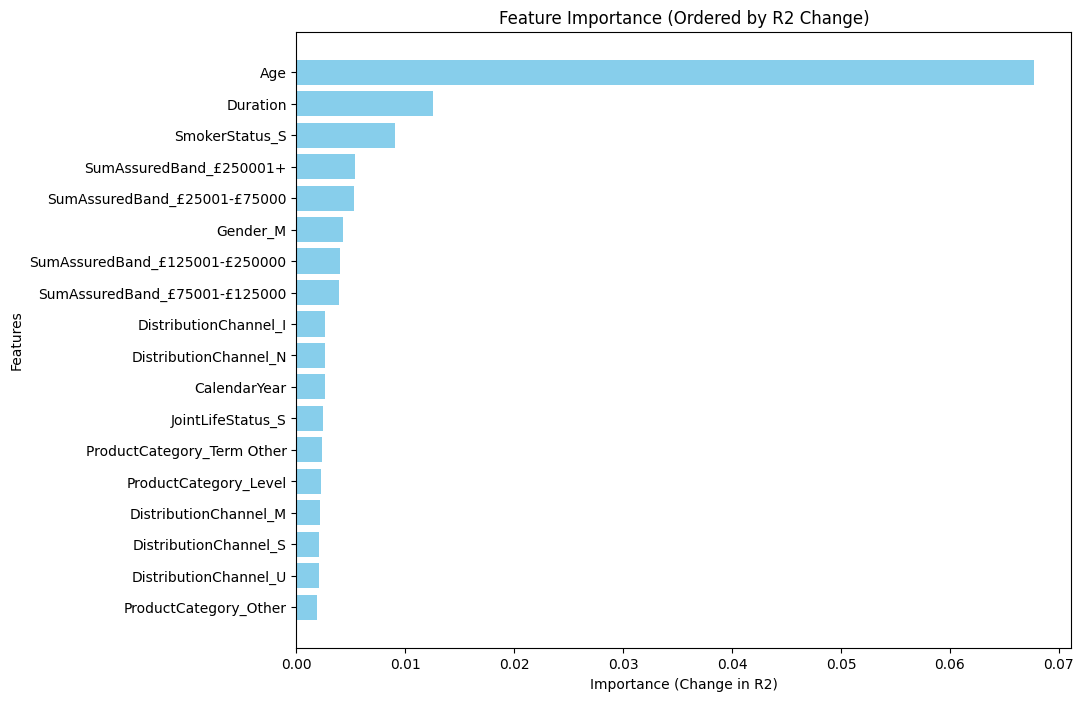

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import optuna
from sklearn.metrics import mean_squared_error

def weighted_poisson_loss(poisson_output, y_true, exposure):
    poisson_log_likelihood = (
        y_true * torch.log(poisson_output + 1e-8)
        - poisson_output
        - torch.lgamma(y_true + 1)
    )
    weighted_poisson_log_likelihood = poisson_log_likelihood * exposure
    neg_weighted_poisson_log_likelihood = -torch.mean(weighted_poisson_log_likelihood)
    return neg_weighted_poisson_log_likelihood

# Define the Poisson model
class PoissonModel(nn.Module):
    def __init__(self, input_size):
        super(PoissonModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x, exposure):
        linear_output = self.fc(x)
        offset_output = linear_output + torch.log(exposure)
        poisson_output = torch.exp(offset_output)
        return poisson_output

# Define the second Poisson model with offset
class SecondPoissonModel(nn.Module):
    def __init__(self, input_size):
        super(SecondPoissonModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x, exposure, initial_predictions):
        linear_output = self.fc(x)
        offset_output = linear_output + torch.log(initial_predictions)
        poisson_output = torch.exp(offset_output)
        return poisson_output

df = combined_df_encoded.copy()
exclude_features = []
df = df.drop(columns=exclude_features)
df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
df["Dur2"] = duration_multiplier * np.maximum(df["Duration"] + 1, 0) ** duration_power
df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)

train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]

train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]

X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
X_train_initial = X_train_scaled[
    ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
]
X_test_initial = X_test_scaled[
    ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
]

# Convert to tensors
X_train_initial_tensor = torch.tensor(X_train_initial.values, dtype=torch.float32)
X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)

# Initialize and train the Poisson model
poisson_model = PoissonModel(len(X_train_initial.columns))
optimizer_poisson = optim.Adam(
    poisson_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(num_epochs):
    optimizer_poisson.zero_grad()
    poisson_outputs = poisson_model(X_train_initial_tensor, lives_exposure_train_tensor)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    ) + l1_loss(poisson_model, lambda_l1)
    poisson_loss.backward()
    optimizer_poisson.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Poisson Model Loss: {poisson_loss.item()}")

# Get predictions from the Poisson model
with torch.no_grad():
    poisson_outputs_train = poisson_model(
        X_train_initial_tensor, lives_exposure_train_tensor
    )
    initial_predictions = poisson_outputs_train.detach()

# Prepare features for the second model
features_except_age_sex = [
    f
    for f in X_train_scaled.columns
    if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
]
X_train_second = X_train_scaled[features_except_age_sex]
X_test_second = X_test_scaled[features_except_age_sex]

X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

# Initialize and train the second model
second_model = SecondPoissonModel(len(X_train_second.columns))
optimizer_second = optim.Adam(
    second_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(num_epochs):
    optimizer_second.zero_grad()
    second_outputs = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_train_tensor, lives_exposure_train_tensor
    ) + l1_loss(second_model, lambda_l1)
    second_loss.backward()
    optimizer_second.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Second Model Loss: {second_loss.item()}")

# Evaluation
second_model.eval()
with torch.no_grad():
    poisson_outputs_test = poisson_model(
        X_test_initial_tensor, lives_exposure_test_tensor
    )
    initial_predictions_test = poisson_outputs_test.detach()
    second_outputs = second_model(
        X_test_second_tensor, lives_exposure_test_tensor, initial_predictions_test
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_test_tensor, lives_exposure_test_tensor
    ) + l1_loss(second_model, lambda_l1)

    y_pred = second_outputs
    y_test_tensor = y_test_tensor + 1e-8
    weighted_mean_target = torch.sum(
        y_test_tensor * lives_exposure_test_tensor
    ) / torch.sum(lives_exposure_test_tensor)
    null_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (
            y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
            - (y_test_tensor - weighted_mean_target)
        )
    )
    model_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (y_test_tensor * torch.log(y_test_tensor / y_pred) - (y_test_tensor - y_pred))
    )
    pseudo_r2 = 1 - (model_deviance / null_deviance)
    print(f"Pseudo R2: {pseudo_r2.item()}")


def objective(trial, features, df, best_trial_params=None):
    if best_trial_params is None:
        lr = trial.suggest_float("lr", 8e-2, 4e-1, log=True)
        weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)
        num_epochs = trial.suggest_int("num_epochs", 700, 1500)
        lambda_l1 = trial.suggest_float("lambda_l1", 1e-3, 1e-1, log=True)
        age_cut = trial.suggest_int("age_cut", 20, 90)
        age_power = trial.suggest_float("age_power", 1.1, 5)
        age_multiplier = trial.suggest_int("age_multiplier", 0, 1)
        duration_power = trial.suggest_float("duration_power", -1, 3)
        duration_multiplier = trial.suggest_int("duration_multiplier", 0, 1)
    else:
        lr = best_trial_params["lr"]
        weight_decay = best_trial_params["weight_decay"]
        num_epochs = best_trial_params["num_epochs"]
        lambda_l1 = best_trial_params["lambda_l1"]
        age_cut = best_trial_params["age_cut"]
        age_power = best_trial_params["age_power"]
        age_multiplier = best_trial_params["age_multiplier"]
        duration_power = best_trial_params["duration_power"]
        duration_multiplier = best_trial_params["duration_multiplier"]

    pseudo_r2_scores = []

    for fold in range(1, 2):
        df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
        df["Dur2"] = duration_multiplier * np.maximum(df["Duration"] + 1, 0) ** duration_power
        df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)
        train_df = df[df["holdout"] == 0]
        test_df = df[~(df["holdout"] == 0)]

        train_lives_exposure = train_df["LivesExposure"]
        test_lives_exposure = test_df["LivesExposure"]

        if "Age2" not in features:
            features.append("Age2")
        if "Dur2" not in features:
            features.append("Dur2")

        X_train = train_df[features]
        y_train = train_df["IncurredClaims"]
        X_test = test_df[features]
        y_test = test_df["IncurredClaims"]

        scaler = StandardScaler()
        X_train_scaled = pd.DataFrame(
            scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

        X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(
            y_train.values.reshape(-1, 1), dtype=torch.float32
        )
        y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
        lives_exposure_train_tensor = torch.tensor(
            train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )
        lives_exposure_test_tensor = torch.tensor(
            test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
        )

        # Initialize the initial Poisson model
        X_train_initial = X_train_scaled[
            ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
        ]
        X_test_initial = X_test_scaled[
            ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
        ]

        # Convert to tensors
        X_train_initial_tensor = torch.tensor(
            X_train_initial.values, dtype=torch.float32
        )
        X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)

        initial_model = PoissonModel(len(X_train_initial.columns))
        optimizer_initial = optim.Adam(
            initial_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        # Train the initial Poisson model
        for epoch in range(num_epochs):
            optimizer_initial.zero_grad()
            poisson_outputs = initial_model(
                X_train_initial_tensor, lives_exposure_train_tensor
            )
            poisson_loss = weighted_poisson_loss(
                poisson_outputs, y_train_tensor, lives_exposure_train_tensor
            ) + l1_loss(initial_model, lambda_l1)
            poisson_loss.backward()
            optimizer_initial.step()

        # Get predictions from the initial model
        with torch.no_grad():
            poisson_outputs = initial_model(
                X_train_initial_tensor, lives_exposure_train_tensor
            )
            initial_predictions = poisson_outputs.detach()

        # Initialize and train the second model with all features except the ones used in the initial model
        features_except_initial = [
            f
            for f in features
            if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear", "Dur2"]
        ]
        X_train_second = X_train_scaled[features_except_initial]
        X_test_second = X_test_scaled[features_except_initial]

        X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
        X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

        second_model = SecondPoissonModel(len(X_train_second.columns))
        optimizer_second = optim.Adam(
            second_model.parameters(), lr=lr, weight_decay=weight_decay
        )

        for epoch in range(num_epochs):
            optimizer_second.zero_grad()
            second_outputs = second_model(
                X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
            )
            second_loss = weighted_poisson_loss(
                second_outputs, y_train_tensor, lives_exposure_train_tensor
            ) + l1_loss(second_model, lambda_l1)
            second_loss.backward()
            optimizer_second.step()

        # Evaluation for the second model
        second_model.eval()
        initial_model.eval()
        with torch.no_grad():
            poisson_outputs_test = initial_model(
                X_test_initial_tensor, lives_exposure_test_tensor
            )
            initial_predictions_test = poisson_outputs_test.detach()
            second_outputs = second_model(
                X_test_second_tensor,
                lives_exposure_test_tensor,
                initial_predictions_test,
            )
            second_loss = weighted_poisson_loss(
                second_outputs, y_test_tensor, lives_exposure_test_tensor
            ) + l1_loss(second_model, lambda_l1)

            y_pred = second_outputs
            y_test_tensor = y_test_tensor + 1e-8
            weighted_mean_target = torch.sum(
                y_test_tensor * lives_exposure_test_tensor
            ) / torch.sum(lives_exposure_test_tensor)
            null_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
                    - (y_test_tensor - weighted_mean_target)
                )
            )
            model_deviance = 2 * torch.sum(
                lives_exposure_test_tensor
                * (
                    y_test_tensor * torch.log(y_test_tensor / y_pred)
                    - (y_test_tensor - y_pred)
                )
            )
            pseudo_r2 = 1 - (model_deviance / null_deviance)
            pseudo_r2_scores.append(pseudo_r2.item())

    mean_pseudo_r2 = np.mean(pseudo_r2_scores)
    print(f"Mean Pseudo_R2: {mean_pseudo_r2:.4f}")
    return mean_pseudo_r2

# Initial set of features
features = combined_df_encoded.columns.tolist()
features.remove("IncurredClaims")
features.remove("LivesExposure")
features.remove("Actual_deaths_lives")
features.remove("holdout")
features.remove("random_fold")
features.remove("CommencementYear")
exclude_features = []
features = [feature for feature in features if feature not in exclude_features]
df = combined_df_encoded.drop(columns=exclude_features, axis=1)

# Determine the best parameters using Optuna to maximize R2 score of deciles
study_Poisson = optuna.create_study(direction="maximize")
study_Poisson.optimize(
    lambda trial: objective(trial, features, df.sample(frac=0.6, random_state=1)),
    n_trials=50,
)

best_trial = study_Poisson.best_trial
best_trial_params = best_trial.params
best_trial_params["saturated_r2"] = best_trial.value
print(f"best_trial_params {best_trial_params}")

def evaluate_feature_importance(df, features, best_trial_params):
    feature_importances = {}

    one_hot_groups = {
        "ProductCategory": [
            "ProductCategory_Level",
            "ProductCategory_Other",
            "ProductCategory_Term Other",
        ],
        "Gender": ["Gender_M"],
        "SmokerStatus": ["SmokerStatus_S"],
        "DistributionChannel": [
            "DistributionChannel_I",
            "DistributionChannel_M",
            "DistributionChannel_N",
            "DistributionChannel_S",
            "DistributionChannel_U",
        ],
        "JointLifeStatus": ["JointLifeStatus_S"],
        "SumAssuredBand": [
            "SumAssuredBand_£125001-£250000",
            "SumAssuredBand_£250001+",
            "SumAssuredBand_£25001-£75000",
            "SumAssuredBand_£75001-£125000",
        ],
    }

    for feature in features:
        if feature == "Age2" or feature == "Dur2":
            continue

        df_copy = df.copy()

        group_found = False
        for group, group_features in one_hot_groups.items():
            if feature in group_features:
                group_found = True
                for gf in group_features:
                    if gf == feature:
                        df_copy[gf] = df_copy[feature].mode()[0]
                    else:
                        df_copy[gf] = 1 - df_copy[feature].mode()[0]
                break

        if not group_found:
            if feature not in ("Age", "Duration", "CalendarYear"):
                df_copy[feature] = df_copy[feature].mode()[0]
            else:
                df_copy[feature] = df_copy[feature].mean()

        study = optuna.create_study(direction="maximize")
        study.optimize(
            lambda trial: objective(trial, features, df_copy, best_trial_params),
            n_trials=1,
        )
        best_trial = study.best_trial
        print(f"trial params{study.best_params}")
        current_r2 = best_trial.value
        feature_importances[feature] = best_trial_params["saturated_r2"] - current_r2

    return feature_importances

feature_importances = evaluate_feature_importance(
    df.sample(frac=0.5, random_state=1),
    features,
    best_trial_params,
)

sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)
sorted_importances = [feature_importances[feature] for feature in sorted_features]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance (Change in R2)")
plt.ylabel("Features")
plt.title("Feature Importance (Ordered by R2 Change)")
plt.gca().invert_yaxis()
plt.show()

Epoch 20, Poisson Model Loss: 47.0631103515625
Epoch 40, Poisson Model Loss: 16.0903263092041
Epoch 60, Poisson Model Loss: 11.459710121154785
Epoch 80, Poisson Model Loss: 9.758255958557129
Epoch 100, Poisson Model Loss: 8.614348411560059
Epoch 120, Poisson Model Loss: 7.734744548797607
Epoch 140, Poisson Model Loss: 7.041482448577881
Epoch 160, Poisson Model Loss: 6.490921497344971
Epoch 180, Poisson Model Loss: 6.050934791564941
Epoch 200, Poisson Model Loss: 5.696871280670166
Epoch 220, Poisson Model Loss: 5.4098992347717285
Epoch 240, Poisson Model Loss: 5.175660610198975
Epoch 260, Poisson Model Loss: 4.983187675476074
Epoch 280, Poisson Model Loss: 4.824036598205566
Epoch 300, Poisson Model Loss: 4.691684722900391
Epoch 320, Poisson Model Loss: 4.581033706665039
Epoch 340, Poisson Model Loss: 4.488079071044922
Epoch 360, Poisson Model Loss: 4.4096455574035645
Epoch 380, Poisson Model Loss: 4.343196868896484
Epoch 400, Poisson Model Loss: 4.286698818206787
Epoch 420, Poisson Mode

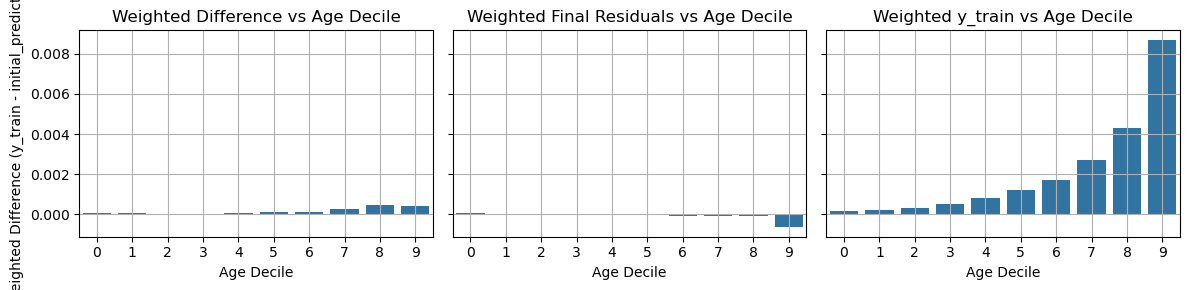

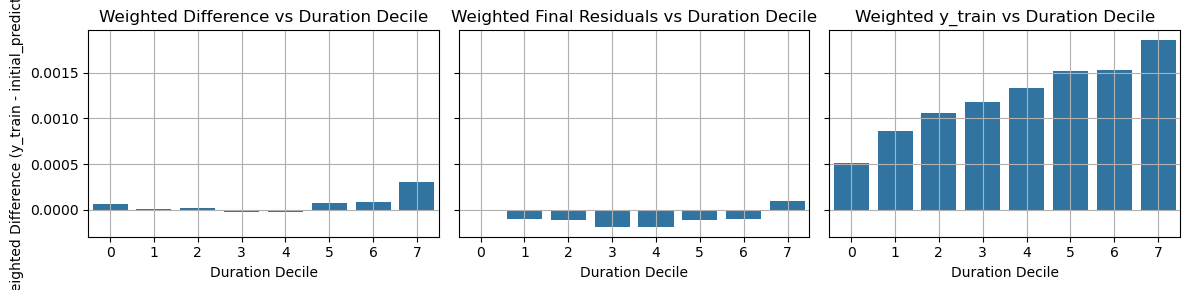

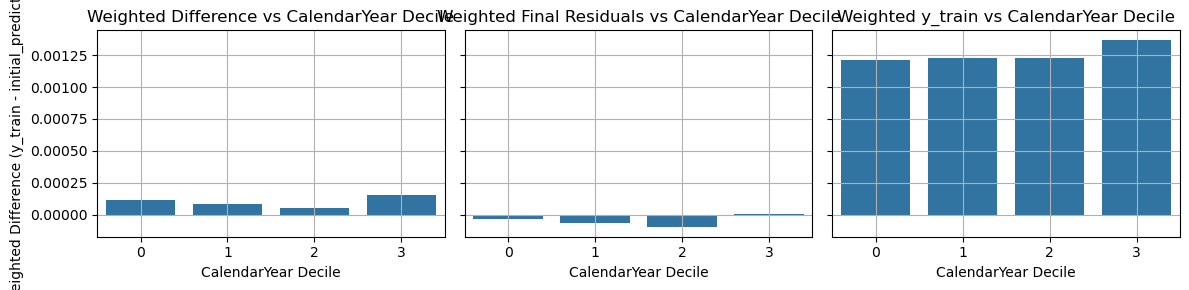

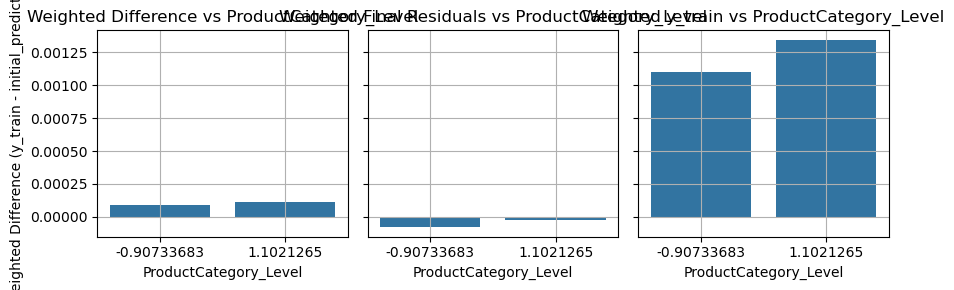

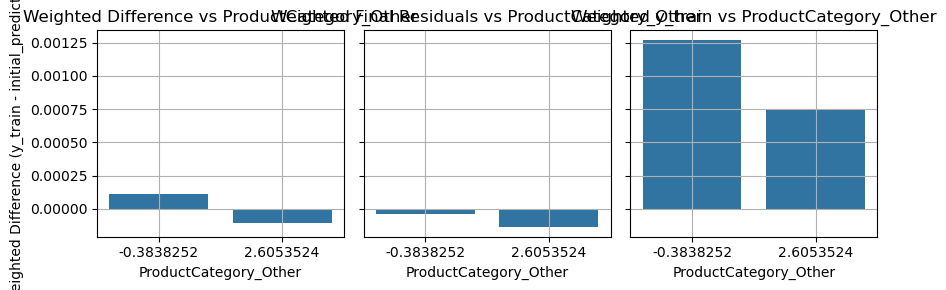

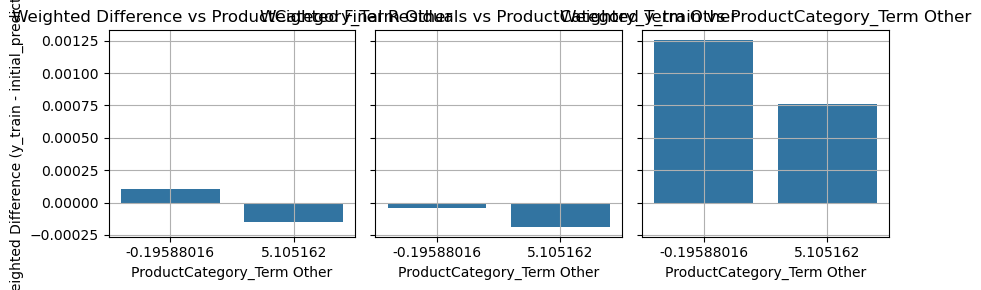

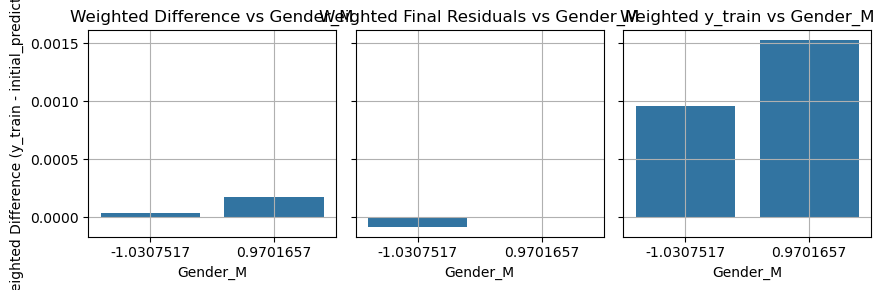

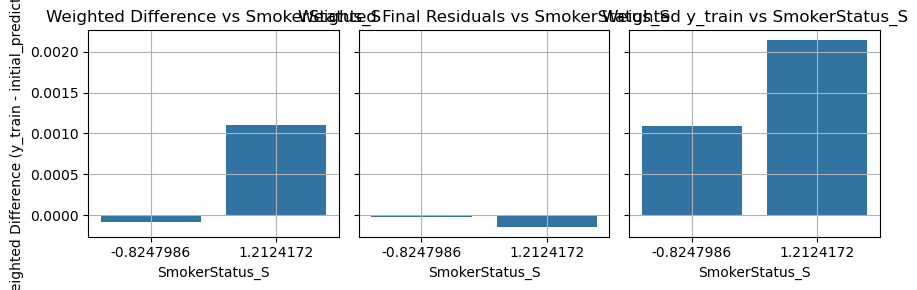

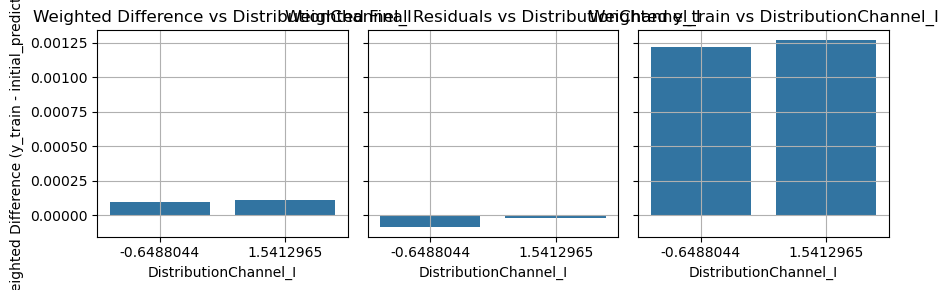

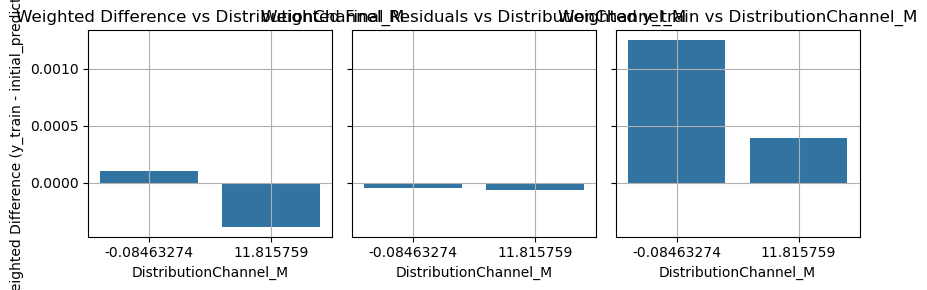

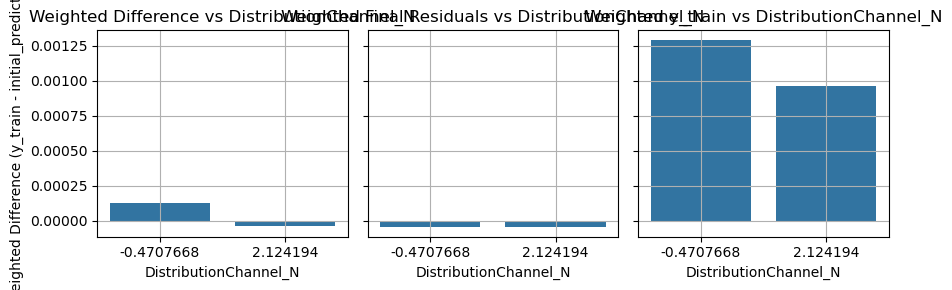

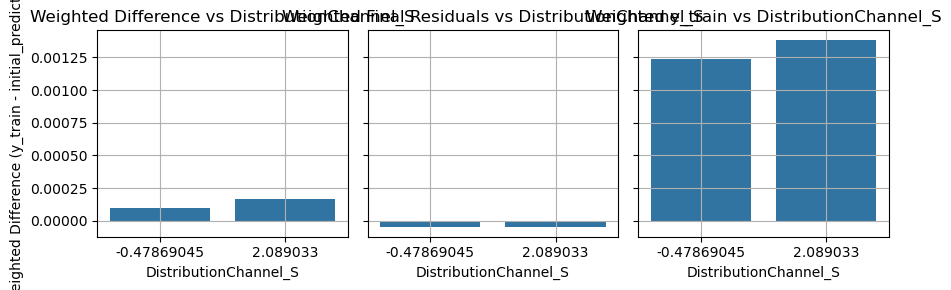

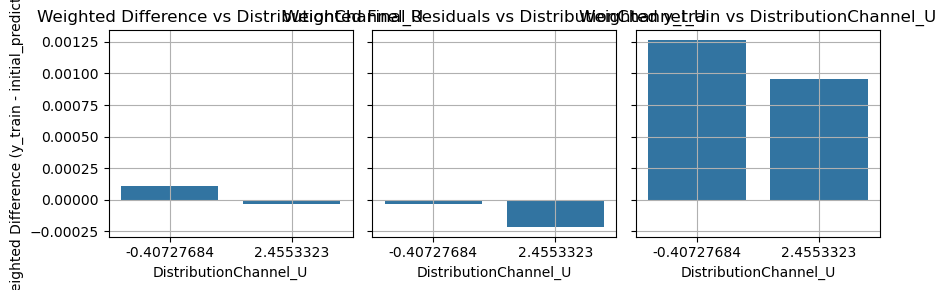

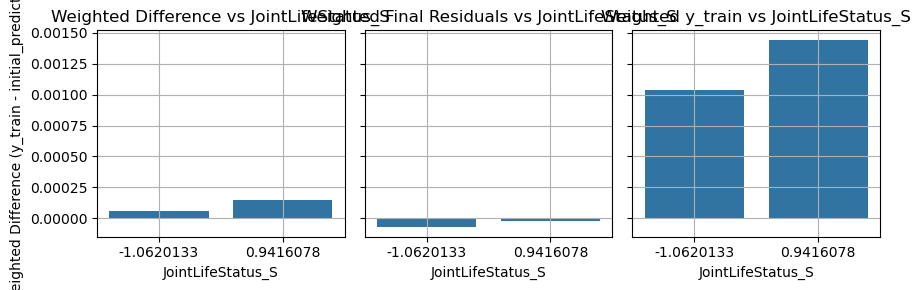

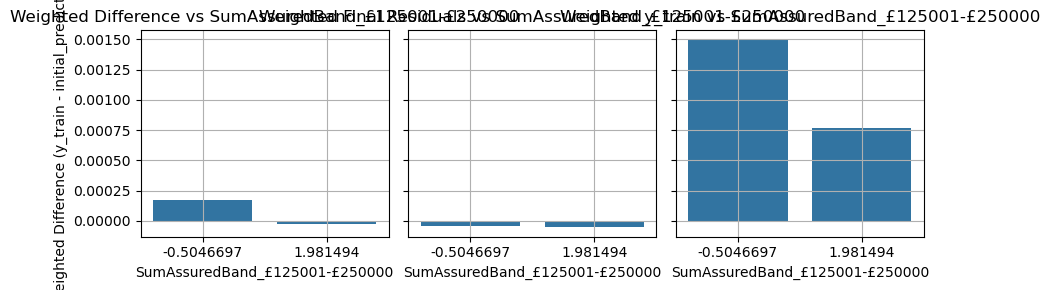

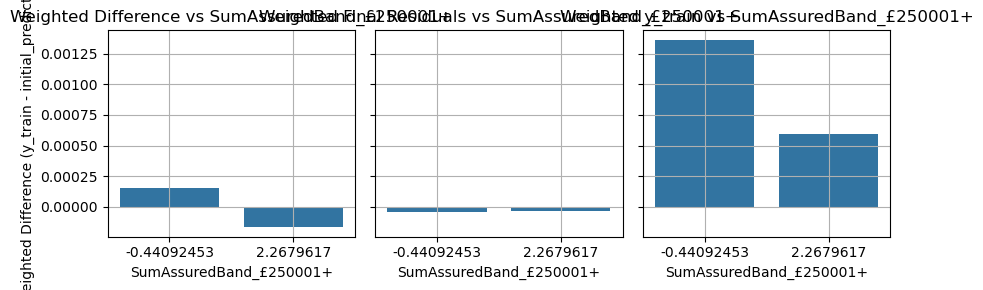

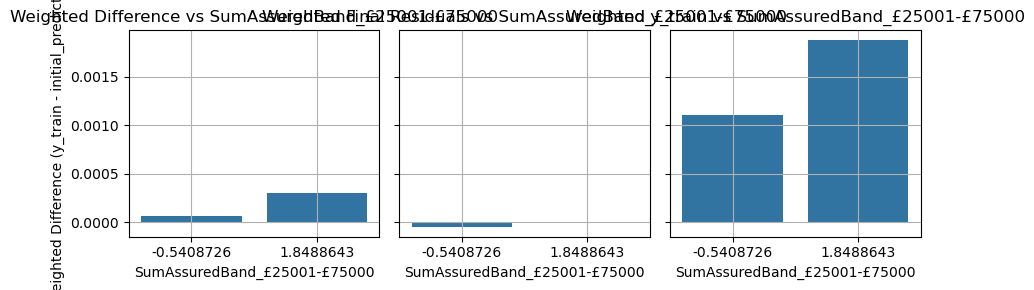

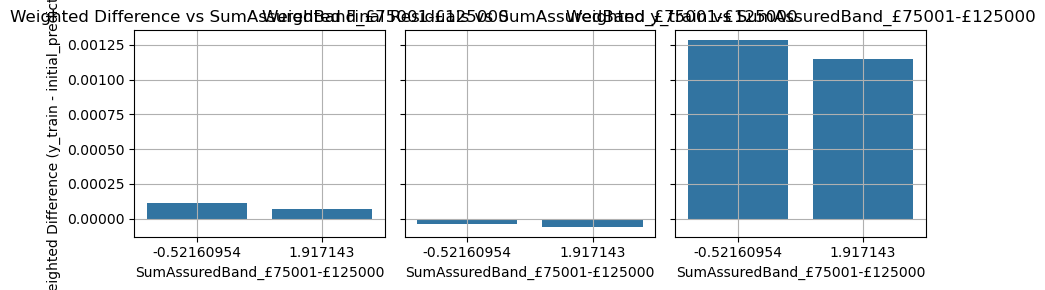

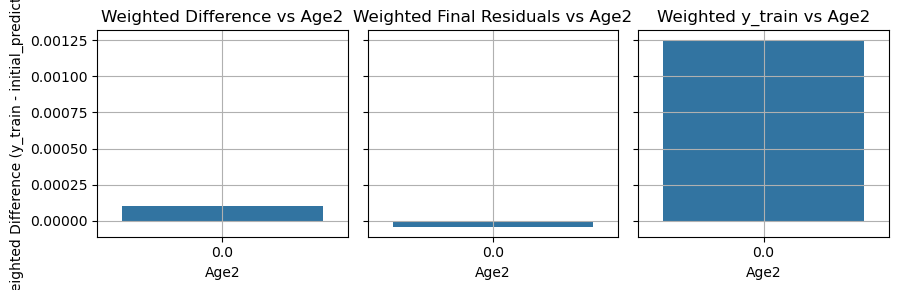

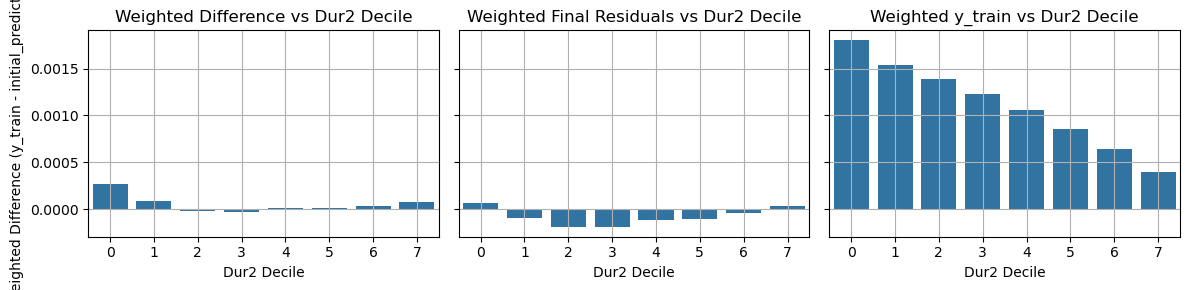

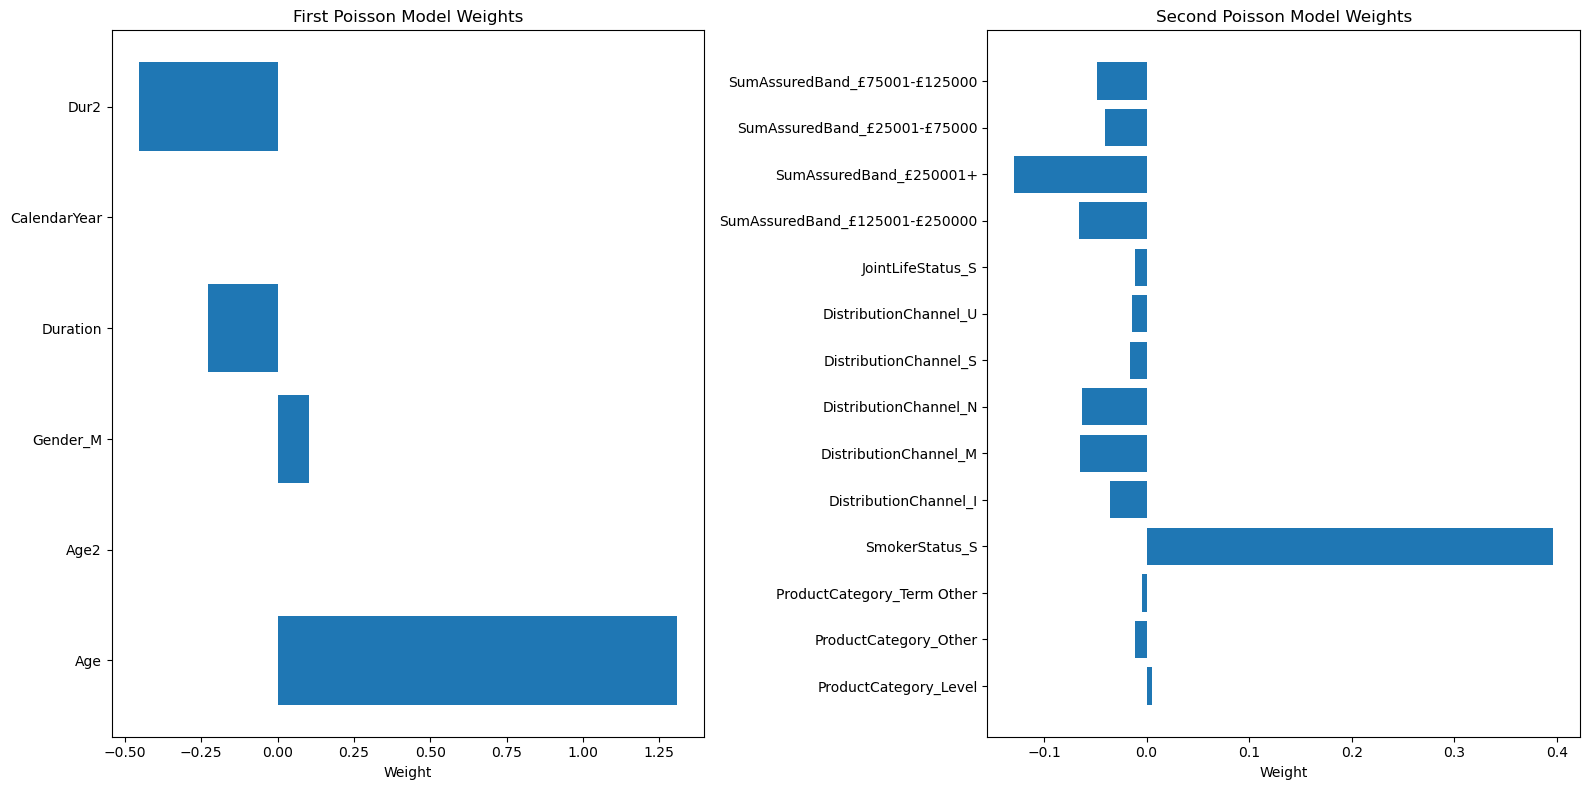

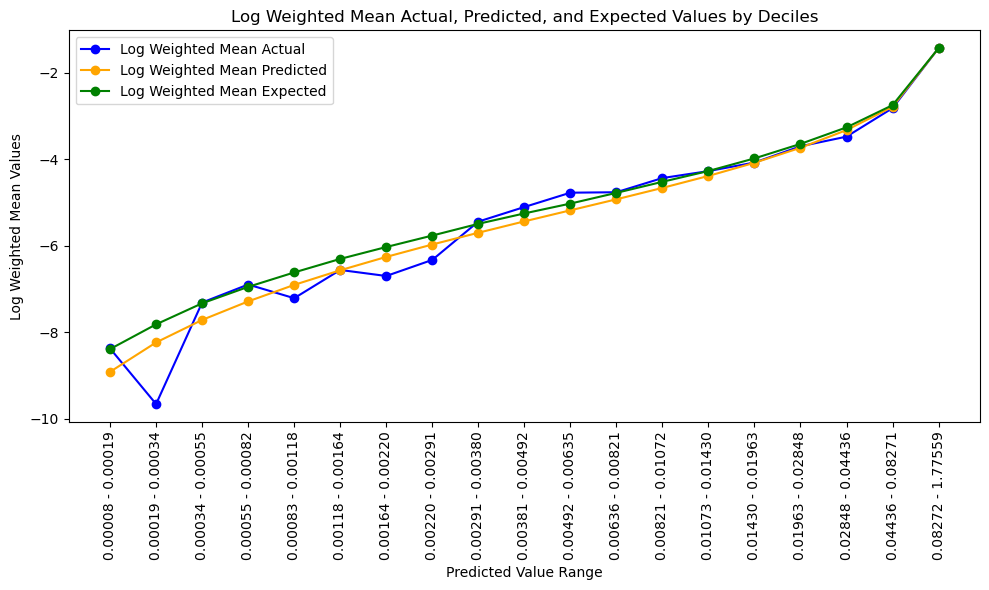

poisson deviance: 26191.124146316113  psuedo R2 =0.3468893082107085
fc2.weight: tensor([[ 1.1086e+00, -1.0396e-26,  7.9747e-02,  1.1127e-01, -2.9903e-03,
          2.6611e-27,  1.4158e-27,  1.5772e-02]])
fc2.bias: tensor([-6.8308])
fc_zero_inflation.weight: tensor([[ 7.6523e-01,  4.7647e-27,  1.2512e-01,  2.2974e-01,  1.8413e-02,
          1.4376e-26, -9.3783e-27,  7.6526e-02]])
fc_zero_inflation.bias: tensor([-2.4271])
fc.weight: tensor([[ 0.0053, -0.0114, -0.0044,  0.3962, -0.0358, -0.0652, -0.0628, -0.0157,
         -0.0143, -0.0111, -0.0664, -0.1289, -0.0410, -0.0482]])
fc.bias: tensor([0.2647])


In [63]:
other_best_params = {'lr': 0.3026063071642011, 'weight_decay': 6.576812842536885e-06, 'num_epochs': 1316, 'lambda_l1': 0.0010042726424270001, 'age_cut': 58, 'age_power': 4.065978965764992, 'age_multiplier': 0, 'duration_power': -0.4488155250040655, 'duration_multiplier': 1, 'saturated_r2': 0.28533536195755005}
def weighted_poisson_loss(poisson_output, y_true, exposure):
    poisson_log_likelihood = (
        y_true * torch.log(poisson_output + 1e-8)
        - poisson_output
        - torch.lgamma(y_true + 1)
    )
    weighted_poisson_log_likelihood = poisson_log_likelihood * exposure
    neg_weighted_poisson_log_likelihood = -torch.mean(weighted_poisson_log_likelihood)
    return neg_weighted_poisson_log_likelihood

# Define the Poisson model
class PoissonModel(nn.Module):
    def __init__(self, input_size):
        super(PoissonModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x, exposure):
        linear_output = self.fc(x)
        offset_output = linear_output + torch.log(exposure)
        poisson_output = torch.exp(offset_output)
        return poisson_output

# Define the second Poisson model with offset
class SecondPoissonModel(nn.Module):
    def __init__(self, input_size):
        super(SecondPoissonModel, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x, exposure, initial_predictions):
        linear_output = self.fc(x)
        offset_output = linear_output + torch.log(initial_predictions)
        poisson_output = torch.exp(offset_output)
        return poisson_output


age_cut = other_best_params["age_cut"]
age_power = other_best_params["age_power"]
weight_decay = other_best_params["weight_decay"]
num_epochs = other_best_params["num_epochs"]
lambda_l1 = other_best_params["lambda_l1"]
lr = other_best_params["lr"]
age_multiplier = other_best_params["age_multiplier"]
duration_power = other_best_params["duration_power"]
duration_multiplier = other_best_params["duration_multiplier"]

# Prepare the data
df = combined_df_encoded.copy()
exclude_features = []
df = df.drop(columns=exclude_features)
df["Age2"] = age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
df["Dur2"] = duration_multiplier * np.maximum(df["Duration"]+1, 0) ** duration_power
df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)

train_df = df[df["holdout"] == 0]
test_df = df[df["holdout"] == 1]

train_lives_exposure = train_df["LivesExposure"]
test_lives_exposure = test_df["LivesExposure"]

X_train = train_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_train = train_df["IncurredClaims"]
X_test = test_df.drop(
    [
        "IncurredClaims",
        "LivesExposure",
        "Actual_deaths_lives",
        "Expected_deaths_lives",
        "ExpectedClaims",
        "Expected_deaths",
        "holdout",
        "random_fold",
        "CommencementYear",
    ],
    axis=1,
)
y_test = test_df["IncurredClaims"]

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
lives_exposure_train_tensor = torch.tensor(
    train_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    test_lives_exposure.values.reshape(-1, 1), dtype=torch.float32
)
X_train_initial = X_train_scaled[
    ["Age", "Age2", "Gender_M", "Duration", "CalendarYear","Dur2"]
]
X_test_initial = X_test_scaled[["Age", "Age2", "Gender_M", "Duration", "CalendarYear","Dur2"]]

# Convert to tensors
X_train_initial_tensor = torch.tensor(X_train_initial.values, dtype=torch.float32)
X_test_initial_tensor = torch.tensor(X_test_initial.values, dtype=torch.float32)


# Initialize and train the Poisson model
poisson_model = PoissonModel(len(X_train_initial.columns))
optimizer_poisson = optim.Adam(
    poisson_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(num_epochs):
    optimizer_poisson.zero_grad()
    poisson_outputs = poisson_model(X_train_initial_tensor, lives_exposure_train_tensor)
    poisson_loss = weighted_poisson_loss(
        poisson_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    poisson_loss.backward()
    optimizer_poisson.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Poisson Model Loss: {poisson_loss.item()}")

# Get predictions from the Poisson model
with torch.no_grad():
    poisson_outputs_train = poisson_model(
        X_train_initial_tensor, lives_exposure_train_tensor
    )
    initial_predictions = poisson_outputs_train.detach()


# Prepare features for the second model
features_except_age_sex = [
    f
    for f in X_train_scaled.columns
    if f not in ["Age", "Age2", "Gender_M", "Duration", "CalendarYear","Dur2"]
]
X_train_second = X_train_scaled[features_except_age_sex]
X_test_second = X_test_scaled[features_except_age_sex]

X_train_second_tensor = torch.tensor(X_train_second.values, dtype=torch.float32)
X_test_second_tensor = torch.tensor(X_test_second.values, dtype=torch.float32)

# Initialize and train the second model
second_model = SecondPoissonModel(len(X_train_second.columns))
optimizer_second = optim.Adam(
    second_model.parameters(), lr=lr, weight_decay=weight_decay
)

for epoch in range(num_epochs):
    optimizer_second.zero_grad()
    second_outputs = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_train_tensor, lives_exposure_train_tensor
    )
    second_loss.backward()
    optimizer_second.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Second Model Loss: {second_loss.item()}")

# Evaluation
second_model.eval()
with torch.no_grad():
    poisson_outputs_test = poisson_model(
        X_test_initial_tensor, lives_exposure_test_tensor
    )
    initial_predictions_test = poisson_outputs_test.detach()
    second_outputs = second_model(
        X_test_second_tensor, lives_exposure_test_tensor, initial_predictions_test
    )
    second_loss = weighted_poisson_loss(
        second_outputs, y_test_tensor, lives_exposure_test_tensor
    )

    y_pred = second_outputs
    y_test_tensor = y_test_tensor + 1e-25
    weighted_mean_target = torch.sum(
        y_test_tensor * lives_exposure_test_tensor
    ) / torch.sum(lives_exposure_test_tensor)
    null_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (
            y_test_tensor * torch.log(y_test_tensor / weighted_mean_target)
            - (y_test_tensor - weighted_mean_target)
        )
    )
    model_deviance = 2 * torch.sum(
        lives_exposure_test_tensor
        * (y_test_tensor * torch.log(y_test_tensor / y_pred) - (y_test_tensor - y_pred))
    )
    pseudo_r2 = 1 - (model_deviance / null_deviance)
    print(f"Pseudo R2: {pseudo_r2.item()}")

difference_init = (y_train_tensor - initial_predictions) / lives_exposure_train_tensor
second_model.eval()
with torch.no_grad():
    second_outputs_train = second_model(
        X_train_second_tensor, lives_exposure_train_tensor, initial_predictions
    )
difference_final = (y_train_tensor - second_outputs_train) / lives_exposure_train_tensor
difference_np = difference_init.detach().numpy().flatten()
difference_fn = difference_final.detach().numpy().flatten()
X_train_np = X_train_tensor.numpy()

# Convert tensors to DataFrame for easier manipulation
df = pd.DataFrame(X_train_np, columns=X_train.columns)
df["difference_init"] = difference_np
df["difference_final"] = difference_fn
df["exposure"] = lives_exposure_train_tensor.numpy().flatten()
df["y_train"] = (y_train_tensor / lives_exposure_train_tensor).numpy().flatten()

# Plot the difference against each feature
for feature in X_train.columns:
    if len(np.unique(df[feature])) > 2:  # Continuous feature
        # Calculate deciles
        df["decile"] = pd.qcut(df[feature], 10, labels=False, duplicates="drop")

        # Calculate weighted average for each decile
        weighted_avg_init = df.groupby("decile").apply(
            lambda x: np.average(x["difference_init"], weights=x["exposure"])
        )
        weighted_avg_final = df.groupby("decile").apply(
            lambda x: np.average(x["difference_final"], weights=x["exposure"])
        )
        weighted_avg_y_train = df.groupby("decile").apply(
            lambda x: np.average(x["y_train"], weights=x["exposure"])
        )

        fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

        sns.barplot(x=weighted_avg_init.index, y=weighted_avg_init.values, ax=axes[0])
        axes[0].set_xlabel(f"{feature} Decile")
        axes[0].set_ylabel("Weighted Difference (y_train - initial_predictions)")
        axes[0].set_title(f"Weighted Difference vs {feature} Decile")
        axes[0].grid(True)

        sns.barplot(x=weighted_avg_final.index, y=weighted_avg_final.values, ax=axes[1])
        axes[1].set_xlabel(f"{feature} Decile")
        axes[1].set_ylabel("Weighted Final Residuals")
        axes[1].set_title(f"Weighted Final Residuals vs {feature} Decile")
        axes[1].grid(True)

        sns.barplot(
            x=weighted_avg_y_train.index, y=weighted_avg_y_train.values, ax=axes[2]
        )
        axes[2].set_xlabel(f"{feature} Decile")
        axes[2].set_ylabel("Weighted y_train")
        axes[2].set_title(f"Weighted y_train vs {feature} Decile")
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()

    else:  # Categorical feature
        categories = np.unique(df[feature])

        # Calculate weighted average for each category
        weighted_avg_init = df.groupby(feature).apply(
            lambda x: np.average(x["difference_init"], weights=x["exposure"])
        )
        weighted_avg_final = df.groupby(feature).apply(
            lambda x: np.average(x["difference_final"], weights=x["exposure"])
        )
        weighted_avg_y_train = df.groupby(feature).apply(
            lambda x: np.average(x["y_train"], weights=x["exposure"])
        )

        fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

        sns.barplot(x=weighted_avg_init.index, y=weighted_avg_init.values, ax=axes[0])
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel("Weighted Difference (y_train - initial_predictions)")
        axes[0].set_title(f"Weighted Difference vs {feature}")
        axes[0].grid(True)

        sns.barplot(x=weighted_avg_final.index, y=weighted_avg_final.values, ax=axes[1])
        axes[1].set_xlabel(feature)
        axes[1].set_ylabel("Weighted Final Residuals")
        axes[1].set_title(f"Weighted Final Residuals vs {feature}")
        axes[1].grid(True)

        sns.barplot(
            x=weighted_avg_y_train.index, y=weighted_avg_y_train.values, ax=axes[2]
        )
        axes[2].set_xlabel(feature)
        axes[2].set_ylabel("Weighted y_train")
        axes[2].set_title(f"Weighted y_train vs {feature}")
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()


feature_names_initial = list(X_train_initial.columns)
feature_names_second = list(X_train_second.columns)

# Extract weights
poisson_weights = poisson_model.fc.weight.detach().cpu().numpy().flatten()
second_weights = second_model.fc.weight.detach().cpu().numpy().flatten()

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)

axes[0].barh(feature_names_initial, poisson_weights)
axes[0].set_title("First Poisson Model Weights")
axes[0].set_xlabel("Weight")

axes[1].barh(feature_names_second, second_weights)
axes[1].set_title("Second Poisson Model Weights")
axes[1].set_xlabel("Weight")

plt.tight_layout()
plt.show()

# --- Add  lift analysis and plot log values ---


actual = y_test_tensor.numpy().flatten()
y_pred=y_pred.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()

# Add ExpectedClaims from test_df if available
expected_claims = test_df["ExpectedClaims"].values.flatten() if "ExpectedClaims" in test_df.columns else np.zeros_like(actual)

# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({
    "actual": actual,
    "predicted": predicted,
    "expected": expected_claims,
    "weights": weights
})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
df_lift["decile"] = pd.qcut(df_lift["predicted"], 20, labels=False)

def weighted_mean(group):
    return pd.Series({
        "weighted_actual": np.average(group["actual"], weights=group["weights"]),
        "weighted_predicted": np.average(group["predicted"], weights=group["weights"]),
        "weighted_expected": np.average(group["expected"], weights=group["weights"]),
        "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
    })

# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)
decile_summary = decile_summary.iloc[1:].reset_index(drop=True)

# Take log of actual, predicted, and expected values
decile_summary["log_weighted_actual"] = np.log(decile_summary["weighted_actual"])
decile_summary["log_weighted_predicted"] = np.log(decile_summary["weighted_predicted"])
decile_summary["log_weighted_expected"] = np.log(decile_summary["weighted_expected"])

# Plot the weighted mean actual, predicted, and expected values for each decile
plt.figure(figsize=(10, 6))
plt.plot(decile_summary["log_weighted_actual"], label="Log Weighted Mean Actual", color="blue", marker="o")
plt.plot(decile_summary["log_weighted_predicted"], label="Log Weighted Mean Predicted", color="orange", marker="o")
plt.plot(decile_summary["log_weighted_expected"], label="Log Weighted Mean Expected", color="green", marker="o")
plt.xlabel("Predicted Value Range")
plt.ylabel("Log Weighted Mean Values")
plt.title("Log Weighted Mean Actual, Predicted, and Expected Values by Deciles")
plt.xticks(ticks=range(19), labels=decile_summary["range"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

actual = actual #+ 1e-8
mean_target = np.mean(actual)
null_deviance = 2 * sum(actual * np.log(actual / mean_target) - (actual - mean_target))
model_deviance = 2 * sum(actual * np.log(actual / y_pred) - (actual - y_pred))
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)

weights = initial_model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")

weights = second_model.state_dict()
for layer_name, weight in weights.items():
    print(f"{layer_name}: {weight}")
